<font size = 6> **Формирование рекомендаций по привлечению подписчиков в телеграмм канал Кинопоиска.**

<a id="#start"></a>
## 1 Постановка задачи и ход исследования

**Общее описание задачи**:
- Выявить наиболее эффективные и точные метрики для еженедельного/ежемесячного анализа работы.
- Сформировать список KPI для дальнейшей работы и отслеживания заказчиком совместно с маркетологами.

**Цель:**
Привлечение подписчиков в телеграмм канал Кинопоиска.


**В исследовании:**
В первой части мы произвели обработку данных и рассчитали производные (дополнительгные) данные.

В этой части мы:
- Определим зависимость популярности поста от:
  - дня месяца публикации
  - дня недели публикации
  - времени суток публикации
  - и определим в результате лучшее время для публикаций как наибольшую популярность поста
- Проведем семантический анализ комментариев к постам:
  - попытаемся выяснить, к каким действиям какие посты побуждают людей. В первую очередь нам интересна [вирусность](https://livedune.com/ru/blog/virusnyj-kontent) постов - способность контента распространяться по сети без особых усилий автора, лишь потому что он зацепил пользователей и **они сами охотно его репостят, отправляют друзьям и обсуждают.**
- Призведем анализ реакций читателей на сообщения.   
  - Определим самые популярные темы (по наибольшему количеству реакций и эмодзи - как положительных, так и отрицательных)
  - Определим минимально популярные темы (наименьшее количество реакций и эмодзи)
- Проведем Анализ эмодзи. Аналогично предыдущему пункту посчитаем количество эмодзи в зависимости от темы, типа публикаций, использованных слов, объема текста, сложностью текста.
  - При возможности установим зависимость от положительных и отрицательных эмодзи.

**Ход исследования:**
- Исследовательский анализ данных
- Выводы и заключения

<a id="library"></a>
## 2 Импорт библиотек


### 2.1. Установка дистрибутивов

In [1]:
pip install yadisk --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 kB 1.4 MB/s eta 0:00:00


In [2]:
pip install --upgrade gspread --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.2/55.2 kB 1.0 MB/s eta 0:00:00


In [3]:
pip install wordcloud pandas --quiet

In [4]:
pip install pymorphy3 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.2/53.2 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 39.1 MB/s eta 0:00:00


In [5]:
pip install pymorphy2 --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 38.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [6]:
pip install --upgrade gspread --quiet

In [7]:
pip install wordcloud pandas --quiet

In [8]:
pip install wordcloud --quiet

In [9]:
pip install emoji --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 433.8/433.8 kB 5.0 MB/s eta 0:00:00


### 2.2. Установка библиотек и модулей:



In [10]:
# 1) для анализа данных
import pandas as pd
from datetime import datetime, timedelta
import numpy as np
import math

# 2) для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# 3) для предобработки текста текста
import string
import pymorphy2
import emoji
import re
import os
from wordcloud import WordCloud

# 4) для анализа текста
import nltk
from nltk import word_tokenize # токнизатор
from nltk.corpus import stopwords # стоп-слова
from nltk.probability import FreqDist

# пакеты для языковых моделей
nltk.download('punkt')
nltk.download('stopwords')

# 5) дополнительные библиотеки
from tqdm import tqdm # декоратор для индикации
import warnings
import yadisk
import logging
import sys
import gspread
from IPython.display import display
from openpyxl import load_workbook
from openpyxl.cell.text import Font, InlineFont
from openpyxl import Workbook
from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles.numbers import BUILTIN_FORMATS


from google.colab import drive
drive.mount('/content/drive')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Mounted at /content/drive


In [11]:
# настройка отображения
#set_matplotlib_formats('pdf', 'svg')
#pd.set_option('max_columns', None)
pd.options.display.max_columns = 30

Подключимся к исходным данным

In [12]:
try:
    from google.colab import auth #аутентификация в сервисах Google в среде Colab
    auth.authenticate_user() #вызывает функцию аутентификации пользователя для доступа к его учетной записи Google.
    import gspread #импортирует модуль gspread, который позволяет работать с Google Sheets через Python.
    from google.auth import default # импортирует функцию default из модуля google.auth, предоставляющую способы получения учетных данных аутентификации.
    creds, _ = default() # - использует функцию default() для получения учетных данных аутентификации и присваивает их переменной creds

    gc = gspread.authorize(creds) #использует полученные учетные данные для авторизации в gspread, создавая объект gc, который может взаимодействовать с Google Sheets через AP
except:
    pass

## 3 Загрузка и подготовка данных к анализу



Перейдем в рабочую область

In [13]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
os.getcwd()

'/content'

In [15]:
#os.listdir()

In [16]:
os.chdir('/content/drive/MyDrive')

Введем идентификационные данные для подключения

Получим токен для доступа к Яндекс,диску

In [17]:
#from cfg import app_id, secret_id, ya_token

In [18]:
'''# получаем токен для доступа к яндекс диску

y = yadisk.YaDisk(app_id, secret_id, ya_token)

if y.check_token():
    print("Sucessfully received token!")
else:
    print("Something went wrong. Not sure how though...")
    '''

'# получаем токен для доступа к яндекс диску\n\ny = yadisk.YaDisk(app_id, secret_id, ya_token)\n\nif y.check_token():\n    print("Sucessfully received token!")\nelse:\n    print("Something went wrong. Not sure how though...")\n    '

Создадим список файлов для загрузки с Яндекс.Диска

In [19]:
'''# создаем список файлов для загрузки
list_of_files = []
for el in list(y.listdir('Мастерская_Кинопоиск/Исходники_Кинопоиск')):
    if el['path'].endswith('.csv'):
        list_of_files.append(el['path'])
print("\033[34m""\033[1m""Создан список файлов list_of_files")
list_of_files
'''

'# создаем список файлов для загрузки\nlist_of_files = []\nfor el in list(y.listdir(\'Мастерская_Кинопоиск/Исходники_Кинопоиск\')):\n    if el[\'path\'].endswith(\'.csv\'):\n        list_of_files.append(el[\'path\'])\nprint("\x1b""\x1b""Создан список файлов list_of_files")\nlist_of_files\n'

Для отслеживания работы кода создадим файл `mylog_kinopoisk.log`, куда будем сохранять логи.   

In [20]:
logging.basicConfig(
    level=logging.INFO,
    filename = "mylog_kinopoisk_research.log",
    format = "%(asctime)s - %(module)s - %(levelname)s - %(funcName)s: %(lineno)d - %(message)s",
    datefmt="%Y-%m-%d %H:%M:%S",
    filemode="w"
    )

logging.info('info')
logging.debug('debug')
logging.warning('warning_message')
logging.error("An ERROR")
logging.critical("A CRITICAL")

ERROR:root:An ERROR
CRITICAL:root:A CRITICAL


### 3.1 Создание функций
Создадим функции, который нам потребуются в исследовании

Создадим функцию `load_files` для загрузки данных

In [21]:
def load_files(file_name):
    '''
    Функция загрузки данных в дадфруймы и проверки основных паарметров
    '''
    df= pd.read_csv(file_name, sep = ',')
    print("\033[34m""\033[1m""Первые строки датафрейма")
    display(df.head(5))
    print("\033[34m""\033[1m""Информация о типах данных")
    print()
    display(df.info())
    print("\033[34m""\033[1m""Доля пропущенных значений ")
    display(round(df.isna().mean() * 100).astype(int))
    print("\033[34m""\033[1m""Количество явных дубликатов ")
    display(df.duplicated().sum())
    return(df)

Для обработки текста, в том числе при сощдании облака слов

In [22]:
# функция для удаления заданного набора символов
def remove_chars_from_text(text, chars):
    return "".join([ch for ch in text if ch not in chars])

# добавили к знакам препинания другие символы, которые хотим удалить
spec_chars = string.punctuation + '\n«»\t—…'

# загрузили список русских стоп-слов
russian_stopwords = set(stopwords.words("russian"))

# расширили список стоп слов
russian_stopwords.update(['это', 'ещё', 'ты','год', 'самый', 'наш', '1', '10', 'который', "свой", "день", "время",
                         "второй", "почему", "есть", "очень", "кинопоиск", "хороший", "стать"])

# создали объект для работы с морфологией
morph = pymorphy2.MorphAnalyzer()

# функция для обработки текста
def prepare_text(text):
    # привели все слова к нижнему регистру
    text = text.lower()
    # удалили знаки препинания и другие символы
    text = remove_chars_from_text(text, spec_chars)
    # разбили текст на токены
    text_tokens = word_tokenize(text)

    # удалили стоп-слова из текста
    text_tokens = [word for word in text_tokens if word.lower() not in russian_stopwords]

    # лемматизировали каждый токен
    filtered_text_tokens = [morph.parse(token)[0].normal_form for token in text_tokens]
    return filtered_text_tokens

### 3.2. Загрузка файлов в рабочую папку

Создадим в рабочей области папку для загрузки файлов с Яндекс.Диска и перейдем в нее

In [23]:
# создаем папку загрузки
load_path = 'Мастерская_Кинопоиск'
#if not os.path.exists(load_path):
#    os.mkdir(load_path)
os.chdir(load_path)

Загрузим (скопируем) файлы с Яндекс.Диска в созданную папку в рабочей области

In [24]:
'''
# загружаем файлы с яндекс диска
for file in tqdm(list_of_files):
    y.download(file.split(':')[1], file.split('/')[-1])
    #y.download()
print("\033[34m""Файлы загружены в папку в рабочей области""\033[1m"" kinopoisk""\033[0m")
'''

'\n# загружаем файлы с яндекс диска\nfor file in tqdm(list_of_files):\n    y.download(file.split(\':\')[1], file.split(\'/\')[-1])\n    #y.download()\nprint("\x1b""Файлы загружены в папку в рабочей области""\x1b"" kinopoisk""\x1b")\n'

Вернемся в рабочую область

In [25]:
#os.chdir('/content')

In [26]:
os.getcwd ()

'/content/drive/MyDrive/Мастерская_Кинопоиск'

In [27]:
os.listdir ()

['cfg.py',
 'Копия "Хакатон_Кинопоиск_15022024 (1).ipynb"',
 'cfg.py.gdoc',
 'Хакатон_Кинопоиск_22022024.ipynb',
 'processed_posts_2022_2024.csv',
 'Хакатон_Кинопоиск_ОБЩИЙ_23_фев.ipynb',
 'processed_posts.csv',
 'от_Бориса_1_posts_topic_marking.ipynb',
 'Копия modeling_results_easy.csv',
 'Хакатон_Кинопоиск_Часть_2_Исследование_23_фев.ipynb',
 'Копия Хакатон_Кинопоиск_Часть_1_Обработка_24_фев.ipynb',
 'Копия processed_posts_2016_2024.csv',
 'models',
 'data_source',
 'foot_word_cloud.png',
 'posts_cci.xlsx',
 'Копия Хакатон_Кинопоиск_Часть_2_Исследование_24_фев.ipynb',
 'notebooks',
 'РЕВЬЮ_Data_loading_preprocessing.ipynb',
 'comments_kinopisk_2023_01_18.csv',
 'kinopisk_reposts_and_mentions_2023_19_01.csv',
 'kinopisk_subscribers_detailed_2024-01-18.csv',
 'kinopoisk_channel_posts_2023-01-21.csv',
 'kinopoisk_subscribers_general_2024_18_01.csv',
 'word_cloud.png',
 'Кинопоиск_Обработка_Темы_по_старому_21022024.ipynb',
 'Хакатон_Кинопоиск_Часть_1_ТЕМЫ_ПО_СТАРОМУ.ipynb',
 'processed_

<a id="prepare"></a>
### 3.3. Загрузка датафреймов и изучение данных

#### 3.3.1. Сведения о постах в телеграм канале Кинопоиска - `kinopoisk_channel_posts_2023-01-21.csv`   
Заказчик сообщил нам структуру файла

|Название столбца |Что означает | |
|:-----|:----|----:|
Channel | название канала (неинформативная колонка)
Id | идентификатор поста. Соответствует post_id в файле с комментариями к постам
Date | дата и время публикации поста в формате CTE (+2 часа для получения московского времени)
Text | текст поста
Views | количество просмотров поста
Reactions | словарь с реакциями (эмоджи/смайлы) на пост. Дает информацию о типе смайла и его количестве
With media | дает представление о прикрепленном к посту документе. Как правило:
    - MessageMediaPhoto | фото
    - MessageMediaDocument | видео
    - MessageMediaWebPage | ссылка
Forwarded | сколько раз пересылался пост
Replies | словарь с количеством комментариев к посту
Reactions_count | количество реакций/эмоджи на пост. Столбец получен из столбца `reactions` путем суммирование количества всех реакций
Comments | количество комментариев к посту. Столбец получен на основе `Replies`
Type attachement | вид прикрепленного к посту документа. Получен из словаря в столбце `With media`

In [28]:
'''try:
    for file in os.listdir():
        if 'processed_posts_2016_2024' in file:
            posts = load_files(file)
except:
    print("\033[1m""\033[31m""Файл не загружен!!!")
    '''

'try:\n    for file in os.listdir():\n        if \'processed_posts_2016_2024\' in file:\n            posts = load_files(file)\nexcept:\n    print("\x1b""\x1b""Файл не загружен!!!")\n    '

Ознакомимся с рядом качественных показателей

<a id="5"></a>
## 4 Исследовательский анализ

Загрузим данные

In [29]:
posts = pd.read_csv('models/processed_posts_2016_2024.csv')

In [30]:
posts = posts.drop(columns=['Unnamed: 0'])

In [31]:
posts.sample(2)

id                       date  \
12912  14003  2020-10-19 08:45:01+00:00   
22825    601  2017-06-08 22:55:53+00:00   

                                                    text    views  \
12912  Джон Макклейн из «Крепкого орешка» [вернулся н...  17372.0   
22825  ▶️ На Кинотавре мы ведем свой документальный д...   5098.0   

                                               reactions  forwarded  \
12912                                                NaN       29.0   
22825  {'_': 'MessageReactions', 'results': [], 'min'...        1.0   

       reactions_count  comments type_attachment  lenght  cong_coef  \
12912                0         6  пост с ссылкой      20   0.811158   
22825                0         0  пост с ссылкой      16   0.848077   

                            post_topic  comp_score complexity  negative  ...  \
12912                    Анонс новинок         1.4     легкий       0.0  ...   
22825  Ретроспектива, сюжеты, интервью         2.2    обычный       0.0  ...   

       avg_word_len  punct_marks  marks_per_text  popular_word_percent  year  \
12912           5.9          1.0            40.0                   2.5  2020   
22825           4.5          4.0             9.0                   0.0  2017   

       month  weekday weekday_name hour  times_of_day  days_cnt  \
12912     10        0       Monday    8          утро       NaN   
22825      6        3     Thursday   22         вечер       NaN   

       comments_per_views  reactions_per_views  engagement_rate    cci  
12912               0.035                  0.0           0.0315  0.167  
22825               0.000                  0.0           0.0000  0.020  

[2 rows x 42 columns]

Нам предоставлены данные, начиная с конца 2016 года.  
Предварительно знакомство с данными показывает, что:
- основной поток реакций и комментриев приходится на 2022 и 2023 годы.  
- при рассмотрении с 2016 года существует единственная зависимость популярности потов - и это зависимость от года публикации.

Учтем, что:
- вкусы и настроения аудитории склонны меняться. Меняется и сама аудитория.
- зависимость от года публикации не позволяет нам анализировать зависимости от иных параметров.
- количество просмотров, комментариев, реакций и репостов растет год от года. к примеру, среднее количестов просмотров за 2022-2023 годы составило 46710, а если начиная с 2023 года - то 62506. Аналогично, если сопоставим по количеству реакций: 363 и 537 соответственно. Удержимся от соблазна анализировать только данные за 2023-2024 годы.

Примем, что данные ранее 2022 года не могут отражать настроения текущей аудитории и искажают текущую ситуацию и для дальнейшего анализа ограничимся данными начиная с 2022 года включительно.  
Для анализа останется 7267 записей - чуть более 30% от записей в датафрейме


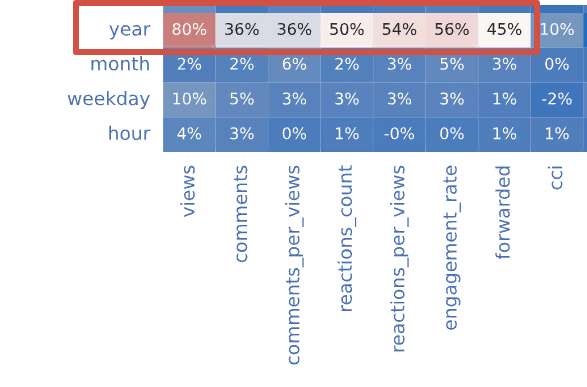

Поэтому, предварительный анализ будет проводить для части данных - постов, опубликованных в канале с 2022 года

In [32]:
posts = posts.query('year >= 2022')

In [33]:
len(posts)

7267

### 4.1 Аномальные значения
Выявим и при необходимости избавимся от аномальных значений (выбросов)
Но сначала познакомимся с диапазоном принимаемых значений


Применим метод `describe()`  и посмотрим разброс значений в столбцах
`views`, `reactions_count`,	`comments`, `forwarded`

In [34]:
round(posts[['views', 'reactions_count', 'comments', 'forwarded']].describe())

views  reactions_count  comments  forwarded
count    7267.0           7267.0    7267.0     7267.0
mean    46710.0            363.0      24.0      158.0
std     17845.0            408.0      48.0      181.0
min     12744.0              0.0       0.0        0.0
25%     34492.0            161.0       4.0       56.0
50%     42400.0            259.0      13.0      106.0
75%     55018.0            424.0      28.0      192.0
max    279115.0           8012.0    1010.0     3212.0

### 4.2 Распределение комментриев и реакций

Построим гистограмму распределения значений рассматриваемых параметров.  
Создадим небольшую функцию `orders_distr` для построения распределения по количеству тех или иных событий в разрезе групп

In [35]:
def orders_distr(measure, ax):

    ax =  posts.plot(y=measure
                    , kind = 'hist'
                    , figsize=(15,5)
                    ,  bins=20
                    , ax=ax
                    ,grid=True, )
    plt.title('Распределение по \n{}\n  '.format(measure), fontsize=12, color = "b")
    plt.xlabel("Диапазон значений ", fontsize = 10, color = "b")
    plt.ylabel("Количество событий", fontsize = 10, color = "b")
    #add horizontal line at mean value of y
    plt.axhline (y=np.nanmean (posts[measure]))
    plt.tight_layout()
    return

Зададим функцию `drow_hist` и совместим три диаграммы на одном графике.     
Вызовем функцию и построим графики распределения по событиям Относительное Количество комментриев, Относительное количество реакций, Индекс цитирования

In [36]:
def drow_hist(mark_1, mark_2, mark_3):
    # задаём размер сетки для графиков
    plt.figure(figsize=(30, 5))
    # в первой ячейке строим распределение по группе А
    ax1 = plt.subplot(1, 3, 1)
    # вызываем функцию
    orders_distr(mark_1, ax1)
    # во второй ячейке строим распределение по группе В
    ax2 = plt.subplot(1, 3, 2)
    # вызываем функцию
    orders_distr(mark_2, ax2)
    # в третьей ячейке строим распределение по группе С
    ax3 = plt.subplot(1, 3, 3)
    # вызываем функцию
    orders_distr(mark_3, ax3)

    return

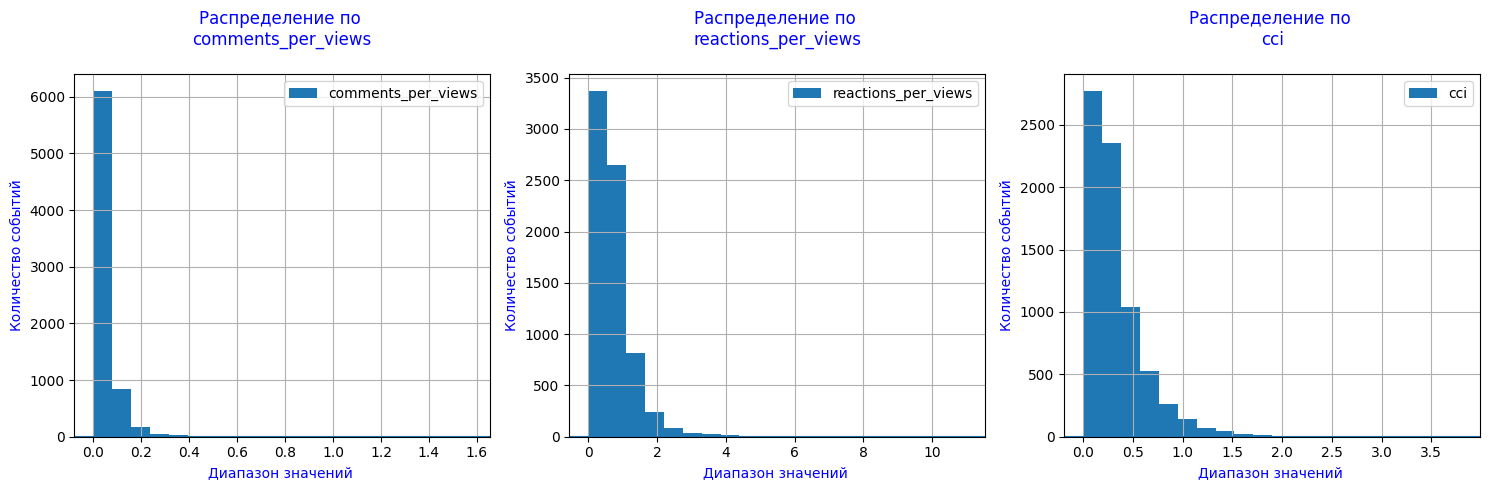

In [37]:
drow_hist('comments_per_views', 'reactions_per_views', 'cci')

<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
    
- обычно число комментариев составляет до 0,25% от просмотров   
    
- количество реакций ощутимо больше - до 2.5% от просмотров. Но все-же наиболее часто встречающаяся величина - это 1% от просмотров.
- индекс цитирования - отношение количества репостов к количеству просмотров - составляет обычно 1 - 1,5% и его частота сравнима с частотой реакций.
    

<div style="border-radius: 45px; border:solid blue 7px; padding: 40px">
Проявим любопытство и используем возможность сравнить получаемые данные с данными исследования популярности телеграмм-канала города Иннополис (открытые данные). Не примем во внимание, что деятельность команий не совпадает.

Итак, для канала Иннополиса:
- обычно число комментариев составляет от 0,1 до 0,5% от просмотров   
    
- количество реакций ощутимо больше - до 3% от просмотров. Но все-же наиболее часто встречающаяся величина - это 0,5% от просмотров.
    

### 4.3 Частоты распределения значений комментриев и реакций

Построим гистограмму распределения значений рассматриваемых параметров.  
Создадим небольшую функцию `orders_distr` для построения распределения по количеству тех или иных событий в разрезе групп

In [38]:
def orders_distr_box(measure, ax):

    ax =  posts.plot(y=measure
                    , kind = 'box'
                    , figsize=(15,5)
                    , ax=ax
                    ,grid=True, )
    plt.title('{}\n  '.format(measure), fontsize=12, color = "b")
    #add horizontal line at mean value of y
    plt.axhline (y=np.nanmean (posts[measure]))
    plt.tight_layout()
    return

Зададим функцию `drow_hist` и совместим диаграммы на одном графике.     
Вызовем функцию и построим графики распределения по событиям Относительное Количество комментриев и Относительное количество реакций

In [39]:
def drow_box(mark_1, mark_2, mark_3, mark_4):
    # задаём размер сетки для графиков
    plt.figure(figsize=(30, 5))
    # в первой ячейке строим распределение по группе А
    ax1 = plt.subplot(1, 4, 1)
    # вызываем функцию
    orders_distr_box(mark_1, ax1)
    # во второй ячейке строим распределение по группе В
    ax2 = plt.subplot(1, 4, 2)
    # вызываем функцию
    orders_distr_box(mark_2, ax2)
    # в третьей ячейке строим распределение по группе C
    ax3 = plt.subplot(1, 4, 3)
    # вызываем функцию
    orders_distr_box(mark_3, ax3)
    # во второй ячейке строим распределение по группе D
    ax4 = plt.subplot(1, 4, 4)
    # вызываем функцию
    orders_distr_box(mark_4, ax4)
    return

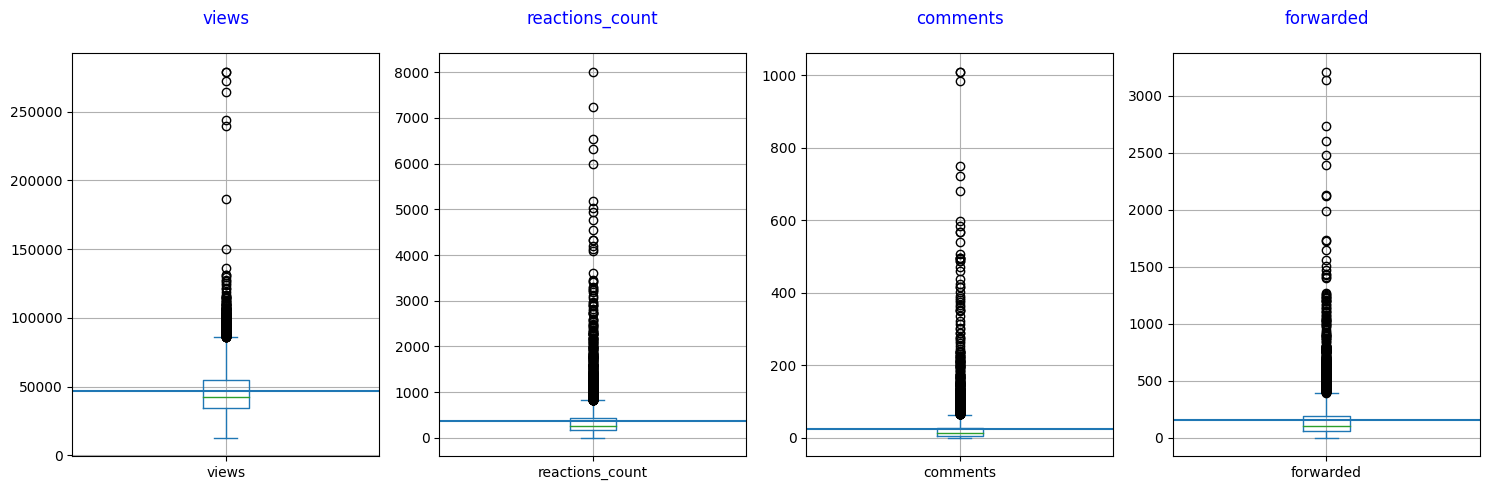

In [40]:
drow_box('views', 'reactions_count', 'comments', 'forwarded')

В среднем пост набирает более 46 тысяч просмотров, 367 реакций, 24 комментария и 158 репостов (цифры мы видели чуть раньше, выведя на экран разброс данных).   Но как видно из графиков бывают и аномальные посты, набирающие гораздо большее число реакций, комментариев и репостов.

Не откладывая на потом посмотрим, что это за публикации. Для анализа Вычислим верхнюю границу для ряда параметров

Создадим функцию `calculate_border` для определения границы нормальных значений

In [41]:
def calculate_border(mark, df_name = posts):
    # Вычисление межквартального размаха
    Q1 = df_name[mark].quantile(0.25)
    Q3 = df_name[mark].quantile(0.75)
    IQR = Q3 - Q1
    #print('Q1', Q1)
    #print('Q3', Q3)
    #print('IQR', IQR)

    # Определение границ для выявления выбросов
    lower_bound = round(Q1 - 1.5 * IQR)
    upper_bound = round(Q3 + 1.5 * IQR)
    if lower_bound > 0:
        print('Для {} нижняя граница нормальных значений равна '.format(mark), lower_bound)
    print('Для {} верхняя граница нормальных значений равна '.format(mark), upper_bound)

Вычислим верхнюю границу для ряда критериев

In [42]:
culc_list = ['simbols_in_text',	'words_in_text',	'avg_word_len',	'marks_per_text']
for i in culc_list:
    calculate_border(i)

Для simbols_in_text верхняя граница нормальных значений равна  797
Для words_in_text верхняя граница нормальных значений равна  171
Для avg_word_len нижняя граница нормальных значений равна  2
Для avg_word_len верхняя граница нормальных значений равна  7
Для marks_per_text верхняя граница нормальных значений равна  30


Выведем на экран для 5 постов, набравших наибольшее количество просмотров, имеющиеся метрики измерения текста

In [43]:
culc_list.append('post_topic')
culc_list.append('type_attachment')
posts.nlargest(5, 'views')[culc_list]

simbols_in_text  words_in_text  avg_word_len  marks_per_text  \
6534            755.0          168.0           4.5            34.0   
536             700.0          137.0           5.1             8.0   
429             352.0           80.0           4.4            16.0   
6462            822.0          164.0           5.0             6.0   
2343            241.0           52.0           4.6            26.0   

                           post_topic type_attachment  
6534                    Анонс новинок    только текст  
536   Ретроспектива, сюжеты, интервью  пост с ссылкой  
429               Новости кинопроката     пост с фото  
6462                           Другое     пост с фото  
2343               Дайджесты сериалов  пост с ссылкой

In [44]:
print('\033[92m''Содержание выбранных публикаций')
posts.nlargest(5, 'views')['text'].tolist()

Содержание выбранных публикаций


['Стали [известны](https://www.bafta.org/film/awards/2022-nominations-winners) лауреаты британской кинопремии BAFTA.\n\n**Лучший фильм** — «Власть пса»\n**Лучший режиссер** — Джейн Кэмпион («Власть пса»)\n**Лучшая женская роль** — Джоэнна Скэнлэн («После любви»)\n**Лучшая мужская роль** — Уилл Смит («Король Ричард»)\n**Лучшая женская роль второго плана** — Ариана ДеБос («Вестсайдская история»)\n**Лучшая мужская роль второго плана** — Трой Коцур («CODA: Ребенок глухих родителей»)\n**Лучший оригинальный сценарий** — Пол Томас Андерсон («Лакричная пицца»)\n**Лучший адаптированный сценарий** — Сиан Хедер («CODA: Ребенок глухих родителей»)\n**Лучший британский фильм** — «Белфаст»\n**Лучший фильм на иностранном языке** — «Сядь за руль моей машины»\n**Лучший анимационный фильм** — «Энканто»\n**Лучшая операторская работа** — «Дюна» (Грег Фрейзер)\n**Лучшие костюмы** — «Круэлла» \n**Лучший звук** — «Дюна»\n**Лучшие визуальные эффекты** — «Дюна»',
 '💯 100. Великих. Фильмов. XXI века\n\nПредставл

- Темы постов - первый, третий и пятый посты объединяет то, что они о новинках и представляют собой обзоры.  
- Количество слов и cимволов в тексте, знаков препинания, средняя длина слова - в пределах нормальных значений или незначительно превосходит верхнюю границу нормальных значений.

Таким образом, столь большое количество просмотров является следствием удачно построенного поста и не вызывает необходимости удаления как аномального значения



Выведем на экран для 5 постов, набравших наибольшее количество реакций, имеющиеся метрики измерения текста

In [45]:
posts.nlargest(5, 'reactions_count')[culc_list]

simbols_in_text  words_in_text  avg_word_len  marks_per_text  \
1785             59.0           18.0           3.3            18.0   
4520            150.0           41.0           3.7             8.0   
1643             90.0           18.0           5.0             6.0   
232             671.0          155.0           4.3             6.0   
51              663.0          135.0           4.9             5.0   

                           post_topic type_attachment  
1785               Дайджесты сериалов     пост с фото  
4520               Дайджесты сериалов     пост с фото  
1643  Ретроспектива, сюжеты, интервью     пост с фото  
232               Новости кинопроката     пост с фото  
51                Новости кинопроката     пост с фото

In [46]:
print('\033[92m''Содержание выбранных публикаций')
posts.nlargest(5, 'reactions_count')['text'].tolist()

Содержание выбранных публикаций


['5\xa0тысяч сердечек на\xa0этом посте и\xa0мы\xa0ставим Кена-Гослинга на\xa0аватарку канала 💖',
 'Привет! Этот текст пишет Антон из SMM команды Кинопоиска. Сейчас я уже отдыхаю, все хорошо. Главное, что посты про дарконов выложил. Спасибо за ваше внимание, много приятных комментариев. \n\nЗавтра у меня, конечно же, выходной ❤️',
 'Ушла эпоха!\n\n__Будете __[__скучать__](https://t.me/kinopoisk_Industry/1936)__ по привычному дубляжу Леонардо__ __ДиКаприо?\n__❤️__ - да__ \n👎__ - нет__',
 'Гэри Олдман благодарит судьбу за «Гарри Поттера» и «Темного рыцаря». Актер [признался,](https://www.indiewire.com/news/general-news/gary-oldman-harry-potter-and-batman-movies-saved-me-1234936398/) что блокбастеры спасли его и позволили проводить время с детьми после развода с женой. \n\n«В 42 года я проснулся разведенным и получил опеку над сыновьями, — рассказал Олдман. — Это было сложно, потому что в индустрии произошел сдвиг, и многие съемки велись в Венгрии, Будапеште, Праге, Австралии… Мне пришлось

- Темы постов - вновь это новости и обзоры
- Два поста - короткие, количество символов менее 100, количество слов менее 20 и это первый квартиль
- Количество знаков препинания в публикации (кроме точки) - маленькое - 5-8. то есть это простой для чтения текст  

Что в содержании постов?
- все посты - это фотографии. Два из них рактически без текста.
- Пост 1785 призывает поставить лайки, чтобы фотография актера была поставлена на аватарку канала
- **Пост 232 и 51 призывают ставить лайки при голосовании**
- пост 4520 собрал реакции в ответ на появление долго не выходившего в эфир одного из авторов канала


Таким образом, столь большое количество реакций является следствием призыва автора поста ставить лайки, не обусловлена прикреплением фотографии и не вызывает необходимости удаления как аномального значения.



Выведем на экран для 5 постов, набравших наибольшее количество комментриев,
имеющиеся метрики измерения текста

In [47]:
posts.nlargest(5, 'comments')[culc_list]

simbols_in_text  words_in_text  avg_word_len  marks_per_text  \
1603             51.0           20.0           2.6             inf   
1802             51.0           20.0           2.6             inf   
1838            164.0           28.0           5.9             7.0   
1828            147.0           22.0           6.7             6.0   
2277             25.0            8.0           3.1             inf   

               post_topic type_attachment  
1603             Болталка     пост с фото  
1802             Болталка     пост с фото  
1838               Постер     пост с фото  
1828  Новости кинопроката     пост с фото  
2277           Everything     пост с фото

In [48]:
print('\033[92m''Содержание выбранных публикаций')
posts.nlargest(5, 'comments')['text'].tolist()

Содержание выбранных публикаций


['Ждем ваши ответы в комментах 👀',
 'Ждем ваши ответы в комментах 👀',
 'Флешмоб! \n\nВыложите постер фильма, который вышел (или выйдет) в год вашего совершеннолетия. \n\nУ нас, Кинопоиска, это [«Гнев человеческий»](https://www.kinopoisk.ru/film/1318972/?utm_source=telegram&utm_medium=social) Гая Ричи 🙃',
 'Покажите сцену из\xa0фильма, во\xa0время которой вы\xa0всегда плачете. \n\nУ\xa0нас это [«Зеленая миля» ](https://hd.kinopoisk.ru/film/42e511a460839b298d96effd8de60c68?from_block=kp-button-online&watch=)с\xa0Томом Хэнксом 😢',
 'Ждем ответы в комментариях 🙌']

Здесь сразу бросается в глаза, что все посты призывают либо написать комментрии, либо приложить в ответ какой-либо снимок/видео
Темы постов - вновь присутствуют новости и обзоры
Все посты - суперкороткие, количество символов менее 170, количество слов менее 30 и это первый квартиль
Количество знаков препинания в публикации (кроме точки) - маленькое - 5-8. то есть это простой для чтения текст



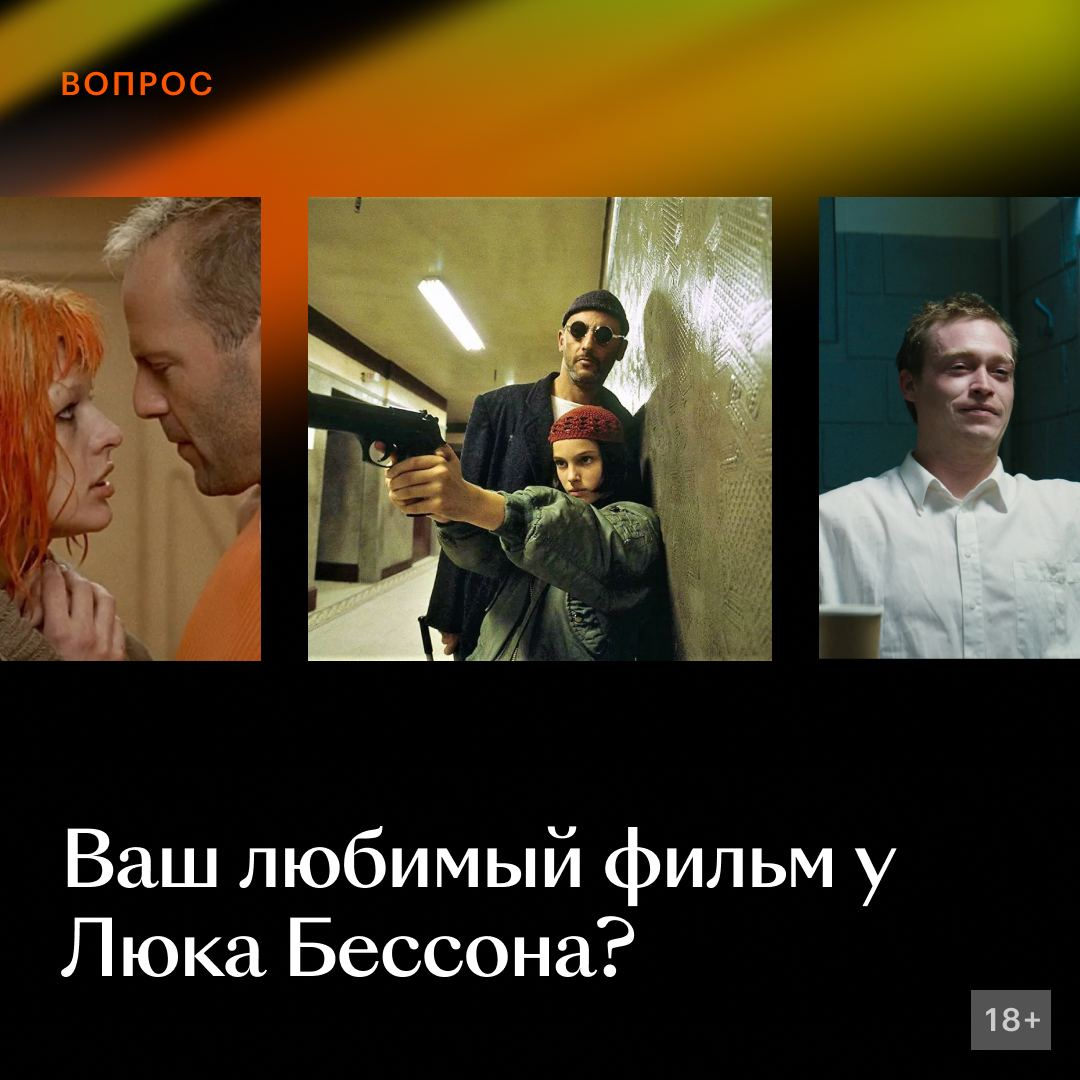



<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
    Таким образом, мы не выявили необходимости удаления записей с аномальными значениями

Выведем на экран для 5 постов, набравших наибольшее количество репостов, имеющиеся метрики измерения текста

In [49]:
posts.nlargest(5, 'forwarded')[culc_list]

simbols_in_text  words_in_text  avg_word_len  marks_per_text  \
1743            248.0           49.0           5.1             8.0   
4520            150.0           41.0           3.7             8.0   
826             200.0           29.0           6.9             2.0   
521             301.0           75.0           4.0             8.0   
5491            319.0           56.0           5.7             9.0   

              post_topic type_attachment  
1743             Трейлер  пост с ссылкой  
4520  Дайджесты сериалов     пост с фото  
826        Анонс новинок     пост с фото  
521   Дайджесты сериалов     пост с фото  
5491          #Дождались    пост с видео

In [50]:
print('\033[92m''Содержание выбранных публикаций')
posts.nlargest(5, 'forwarded')['text'].tolist()

Содержание выбранных публикаций


['⚡Трейлер [второй](https://www.youtube.com/watch?v=Way9Dexny3w) «Дюны» прибыл!\n\nТимоти Шаламе и Зендея на месте, к ним присоединились Флоренс Пью, Остин Батлер, Леа Сейду и Кристофер Уокен.\n\nСиквел фильма Дени Вильнёва выйдет 3 ноября.\n\n__Подписывайтесь на __[__Telegram-канал__](https://t.me/kinopoisk)__ Кинопоиска!__',
 'Привет! Этот текст пишет Антон из SMM команды Кинопоиска. Сейчас я уже отдыхаю, все хорошо. Главное, что посты про дарконов выложил. Спасибо за ваше внимание, много приятных комментариев. \n\nЗавтра у меня, конечно же, выходной ❤️',
 'Палочки вверх 🪄\n\n[Умер](https://www.theguardian.com/stage/2023/sep/28/michael-gambon-star-of-harry-potter-and-the-singing-detective-dies-aged-82) британский и ирландский актер Майкл Гэмбон, известный по роли Альбуса Дамблдора.\n\nЕму было 82 года.',
 'День рождения у Кинопоиска, а подарки —\xa0вам ❤️❤️❤️\n\nДелимся крышесносным ботом, который сделает вам стикерпак, а из вас... персонажей фильма! Да-да, мы собрали лучшие киномемы

- Все посты - короткие - первый или второй квартили по всем метрикам
- все посты так или иначе - обзоры и новости
- один - о смерти актера
- один - упомянутый ранее пост от долго не появлявшегося автора
- и, конечно, пост с предложением создать стикеры со своим лицом

Таким образом, нет оснований для удаления как аномального значения.



### 4.4 Зависимость популярности поста от времени его публикации.
Определим зависимость популярности публикации от месяца, день недели и время суток публикации (утро, день, вечер, ночь).  
Популярность примет значения:
- `comments_per_views` (отношение количества комментариев к количеству просмотров поста)
- `reactions_per_views` (отношение количества комментариев к количеству просмотров поста)

Ранее, при рассмотрении аномальных значений, мы установили, что аномальные значения являются обычно следствием того, что посты носят новостной или обзорный характер и аномальная популярность не является в строгом смысле закономерностью. По этой причине для исключения зависимости от аномальных значений при построении диаграммы и анализе мы будем рассматривать медианные значения.


#### 4.4.1 Матрица корреляции

Литература предлагает нам несколько вариантов корреляций: Пирсона, Спирмана и Кендалла.

Сайт [investments.academic.ru](investments.academic.ru): Когда использовать корреляцию Пирсона?
Если распределение переменных нормальное или несущественно отличается от нормального, применяют коэффициент корреляции Пирсона. Для порядковых (ранговых) переменных или переменных, чье распределение существенно отличается от нормального, используется коэффициент корреляции Спирмана или Кендалла.

Сайт [stats.stackexchange.com](stats.stackexchange.com): Чем корреляция Спирмена отличается от корреляции Пирсона?
Разница между корреляцией Пирсона и корреляцией Спирмена заключается в том, что Пирсон наиболее подходит для измерений, проведенных по интервальной шкале, в то время как Спирмен более подходит для измерений, проведенных по порядковым шкалам.
Примеры интервальных шкал включают "температуру в градусах Фаренгейта" и "длину в дюймах", в которых отдельные единицы измерения (1 град F, 1 дюйм) имеют смысл.

[Сайт psyjournals.ru](psyjournals.ru): Чем отличаются корреляции Кендалла и Спирмена?
Принципиальных отличий между этими критериями не существует, но принято считать, что коэффициент Кендалла является более «содержательным», так как он более полно и детально анализирует связи между переменными, перебирая все возможные соответствия между парами значений. Коэффициент Спирмена более точно учитывает именно количественную степень связи между переменными.

Зависимость популярности мы будем искать от относительных величин, которые изменяются в диапазоне от 0 до 100% и поэтому могут считаться измеряемыми по порядковой шкале.
кроме того мы построили гистограммы распределения коэффициентов реакций и просмотров и увидели, что распределение не является нормальным.
Поэтому мы не будем использовать корреляцию Пирсона.
в выборе между Сприманом и Кендаллом сделаем выбор в пользу первого по причине простоты использования.

Для начала рассмотрим значения коэффициентов корреляции.  
Создадим функцию `coef_corr`, которая построит нам матрицу корреляции

In [51]:
from scipy.stats import spearmanr
'''
#calculate Spearman Rank correlation and corresponding p-value
rho, p = spearmanr(df['math'], df['science'])

#напечатать ранговая корреляция Спирмена и p-значение
print(rho)

# -0.41818181818181815

print(p)

# 0.22911284098281892
'''

"\n#calculate Spearman Rank correlation and corresponding p-value\nrho, p = spearmanr(df['math'], df['science'])\n\n#напечатать ранговая корреляция Спирмена и p-значение\nprint(rho)\n\n# -0.41818181818181815\n\nprint(p)\n\n# 0.22911284098281892\n"

In [52]:
from scipy.stats import spearmanr

Создадим список `catalog_by_time`, в который поместим наименования интересующих нас столбцов

In [53]:
#Зависимость реакций и времени жизни  от времени публикации
catalog_by_time = [
'views',
 'comments',
 'comments_per_views',
 'reactions_count',
 'reactions_per_views',
 'engagement_rate',
 'forwarded', 'cci',
 'days_cnt',
 'simbols_in_text', 'words_in_text',
 'avg_word_len', 'punct_marks',

  'year',
 'month',
 'weekday',
 'hour',
 'times_of_day'
]

In [54]:
def coef_corr(list_name):
    # зададим матрицу корреляции
    # возьмем только столбцы с числовыми значениями:
    df_corr = posts[list_name].corr()

    # построим матрицу
    fig, ax = plt.subplots(figsize=(15,8))
    sns.heatmap(df_corr, fmt='.0%', annot = True, cmap="vlag")
    plt.title('Матрица корреляции\n', color = 'b', fontsize = 12)
    plt.xticks(rotation=90, fontsize=10, color = "b")
    plt.yticks(rotation=0, fontsize=10, color = "b")

Построим матрицу корреляции по Пирсону

<ipython-input-54-710a514caf31>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr = posts[list_name].corr()


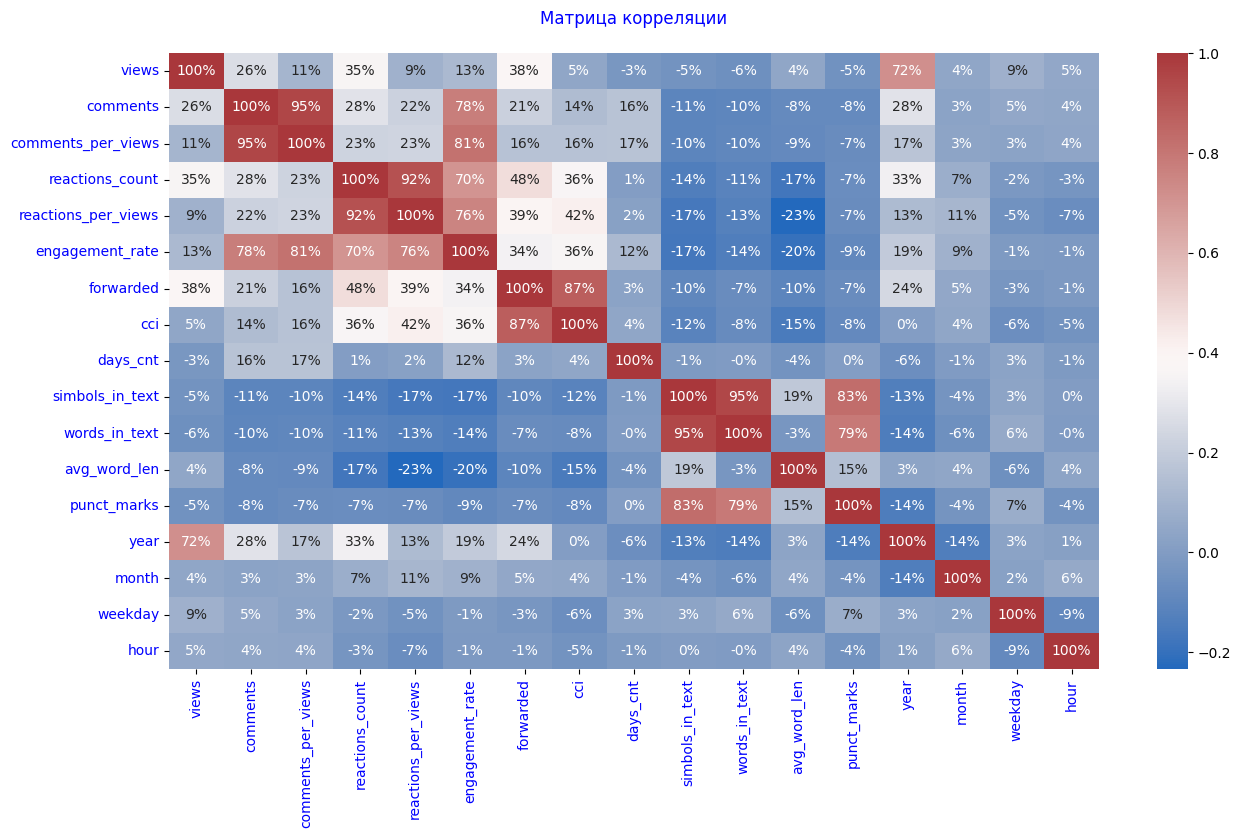

In [55]:
coef_corr(catalog_by_time)

Мы не видим в матрице Пирсона сколь-либо значимых зависимостей популярности постов от дня недели или времени суток публикации. Но есть небольшая зависимость от месяца публикации.
И видна (обратная) средней силы зависимость от от метрик, оцифровывающих текст.

Видна незначительная прямая зависимость между временем жизни поста и индексом вовлеченности читателей


Создадим список `catalog_popular`, в который поместим наименования интересующих нас столбцов для построения корреляции методом Спирмана

In [56]:
#Зависимость реакций и времени жизни  от времени публикации
catalog_popular = [
'views',
 'comments',
 'comments_per_views',
 'reactions_count',
 'reactions_per_views',
 'engagement_rate',
 'forwarded', 'cci'
 ]

catalog_base = [
 'simbols_in_text', 'words_in_text',
 'avg_word_len', 'punct_marks',
  'year',
 'month',
 'weekday',
 'hour',
 'times_of_day'
]

Рассчитаем корреляции по Спирману

In [57]:
for i in catalog_popular:
  for j in catalog_base:
    if abs(spearmanr(posts[i], posts[j])[0]) >0.1:
      print(i,j,round(spearmanr(posts[i], posts[j])[0],3))

views year 0.772
comments simbols_in_text -0.144
comments words_in_text -0.133
comments year 0.48
comments month 0.175
comments_per_views simbols_in_text -0.143
comments_per_views words_in_text -0.125
comments_per_views year 0.293
comments_per_views month 0.156
reactions_count simbols_in_text -0.192
reactions_count words_in_text -0.133
reactions_count avg_word_len -0.267
reactions_count year 0.421
reactions_count month 0.161
reactions_per_views simbols_in_text -0.2
reactions_per_views words_in_text -0.124
reactions_per_views avg_word_len -0.34
reactions_per_views punct_marks -0.106
reactions_per_views month 0.157
engagement_rate simbols_in_text -0.214
engagement_rate words_in_text -0.155
engagement_rate avg_word_len -0.268
engagement_rate punct_marks -0.122
engagement_rate year 0.201
engagement_rate month 0.158
forwarded simbols_in_text -0.113
forwarded avg_word_len -0.162
forwarded year 0.262
cci simbols_in_text -0.11
cci avg_word_len -0.206


Корреляции Спирмана не показывает зависимость популярности и цитируемости постов от дня недели или времени суток публикации. Но есть небольшая зависимость от месяца публикации.
И также видна (обратная) средней силы зависимость от от метрик, оцифровывающих текст.




Учитывая единую корреляцию для параметров реакций, комментариев и коэффициента вовлеченности для дальнейшего анализа будеи использовать один из них - а именно свродный параметр - коэффициент вовлеченности - `engagement_rate`.  
Второй параметр для анализа будем использовать `cci` - индекс цитирования

 #### 4.4.2 Подготовим инструменты и данные
 Создадим функции:
 - `event_in_time_plot` - для построения линейного графика. Для сглаживания шумов применим скользящее среднее
 - `event_in_time_bar`- для построения столбчатой диаграммы
 - `event_in_time_bar_year` - для построения столбчатой диаграммы с учетом в продажах года

In [58]:
# строим график, отражающий количество событий в зависимости от времени
# для сглаживания шумов применим скользящее среднее в размере 90 (дней)
def event_in_time_plot(data_name, eventname, time_interval):
    t1 = data_name.groupby(time_interval).agg({eventname:'median'}).sort_values(time_interval)

    ax1 = t1.rolling(90).mean().plot(grid=True
        , figsize=(15,8)
        ,  color='b')

    plt.title('Количество событий {} \nв зависимости от времени {}\n'.format(eventname, time_interval), fontsize=12, color = "b")
    plt.legend(fontsize=12, bbox_to_anchor=(0.5, 1))
    plt.xticks(rotation=90, fontsize=10, color = "b")
    plt.yticks(rotation=0, fontsize=10, color = "b")
    plt.xlabel('Дата', fontsize=10, color = "b")
    plt.ylabel(f"Количество событий {eventname}", fontsize=10, color = "b")
    #plt.show()
    return

In [59]:
# строим столбчатую диаграмму, отражающую количество событий в зависимости от времени
def event_in_time_bar_year(data_name, eventname, time_interval, operation):
    t1 = data_name.groupby(['year', time_interval]).agg({eventname:operation})#.sort_values(time_interval)

    ax = t1.plot(figsize=(15,8),
    kind ='bar',
    y = eventname,
    linewidth=5,
    alpha=0.7,
    label='Временной отрезок: '+ time_interval,
                 color = 'green'
    )

    plt.title('Количество событий {} \nв зависимости от времени {}\n'.format(eventname, time_interval), fontsize=12, color = "b")
    plt.legend(fontsize=12, loc='upper left')
    plt.xticks(rotation=90, fontsize=10, color = "b")
    plt.yticks(rotation=0, fontsize=10, color = "b")
    plt.xlabel('Дата', fontsize=10, color = "b")
    plt.ylabel(f"Количество событий {eventname}", fontsize=10, color = "b")

    return

In [60]:
# строим столбчатую диаграмму, отражающую количество событий в зависимости от времени
def event_in_time_bar(data_name, eventname, time_interval, operation, ax):
    t1 = data_name.groupby(time_interval).agg({eventname:operation})#.sort_values(time_interval)

    ax = t1.plot(figsize=(15,8),
    kind ='bar',
    y = eventname,
    linewidth=5,
    alpha=0.7,
    label='Временной отрезок: '+ time_interval,
                 color = 'blue',
    ax=ax
    )

    plt.title('Количество событий {} \nв зависимости от времени {}\n'.format(eventname, time_interval), fontsize=12, color = "b")
    plt.legend(fontsize=12,  loc='lower left' ) # ,bbox_to_anchor=(0.8, 1))
    plt.xticks(rotation=0, fontsize=10, color = "b")
    plt.yticks(rotation=0, fontsize=10, color = "b")
    plt.xlabel(f'{time_interval}', fontsize=16, color = "b")
    plt.ylabel(f"Количество событий {eventname}", fontsize=10, color = "b")

    return

#### 4.4.3 Распределение коэффициента вовлеченности по месяцам на всем временном промежутке



Построим столбчатую диаграмму распределения 'engagement_rate' и 'cci' на временном промежутке, предоставленном в датафрейме.  


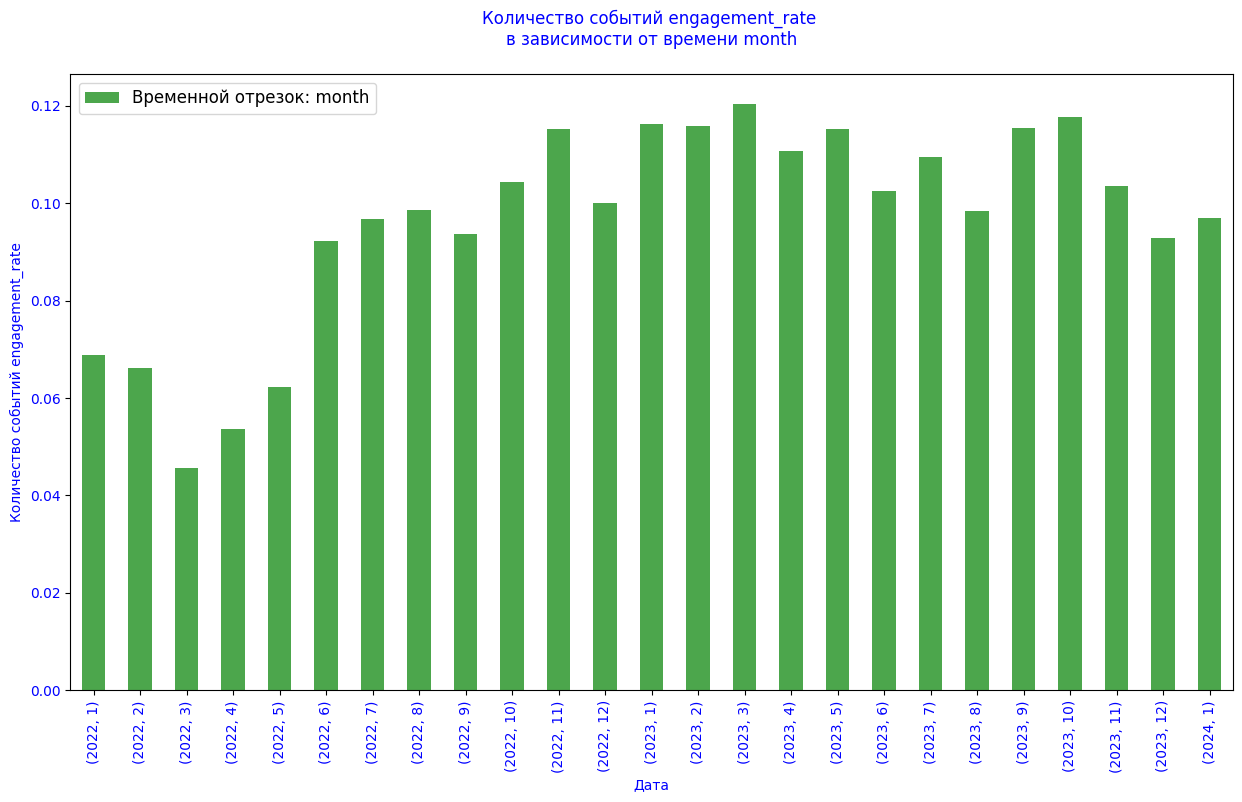

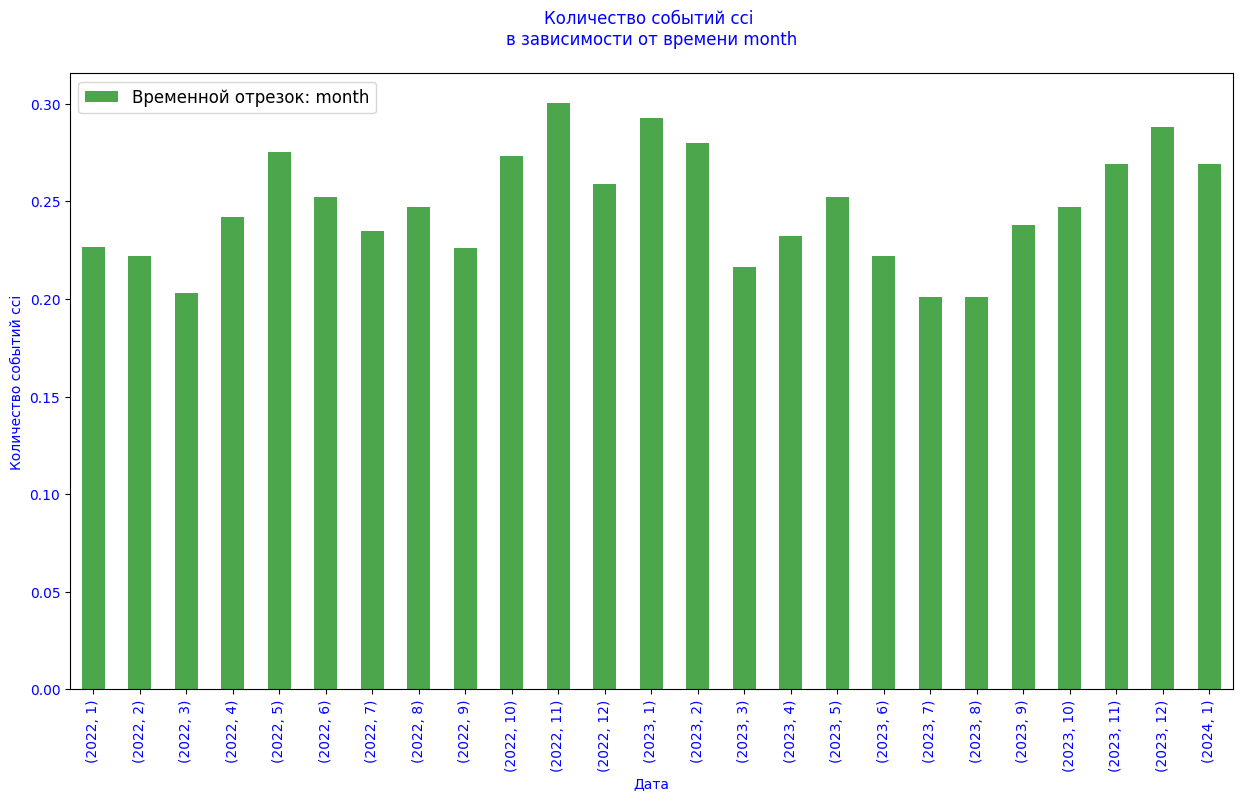

In [61]:
drow_bar_list = ['engagement_rate', 'cci']

for i in drow_bar_list:
    event_in_time_bar_year(posts, i, 'month', 'median')

По предварительному знакомству с данными (**здесь не визуализировано**) можно заметить, что:
- комментарии к постам возникли с октября 2020 года
- реакции к постам возникли с января 2022 года
- репосты возникли с декабря 2014 года, получили взлет с октября 2018 года и их количество относительно просмотров  снизилось с апреля 2020 года, после чего держалось на примерно одном уровне

В анализируемом промежутке времени (2022-2024 гг) не заявляется зависимость (сезонность) от коэффициента вовлеченности от времени года.   
Индекс цитирования cci имеет тенденцию к росту с летних месяцев до новогодних праздников и от марта к маю в оба рассматриваемых года

#### 4.4.4 Динамика аудитории и ее реакций от года к году и от месяца к месяцу

Соберем переменную `final_v`:  
сформируем в отдельные переменные просмотря, показатели вовлеченности и цитируемости.  
Два последних умножим но 100000 для удобства воприятия при визуализации

In [62]:
v1 = posts[['id', 'year','month', 'views']]
v2 = posts[['id', 'year','month', 'engagement_rate']]
v2['engagement_rate'] = v2['engagement_rate'] *100000
v3 = posts[['id', 'year','month', 'cci']]
v3['cci'] = v3['cci'] * 100000

<ipython-input-62-84dc2cbab4ef>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2['engagement_rate'] = v2['engagement_rate'] *100000
<ipython-input-62-84dc2cbab4ef>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v3['cci'] = v3['cci'] * 100000


In [63]:
v1['mark'] = 'views'
v2['mark'] = 'engagement_rate'
v3['mark'] = 'cci'

<ipython-input-63-93ac5b722a4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v1['mark'] = 'views'
<ipython-input-63-93ac5b722a4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  v2['mark'] = 'engagement_rate'
<ipython-input-63-93ac5b722a4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

In [64]:
v1.columns = ['id', 'year','month','count', 'mark']
v2.columns = ['id', 'year','month','count', 'mark']
v3.columns = ['id', 'year','month','count', 'mark']

In [65]:
final_v = pd.concat([v1, v2, v3]).reset_index(drop=True)

In [66]:
final_v.query('year == 2023 and mark == "views"')['count'].sum()

156026282.0

In [67]:
# строим групповую столбчатую диаграмму
def year_to_year(time_period):
    sns.set(rc={"figure.figsize":(15, 8)})
    sns.barplot(x=(time_period), y='count', hue='mark',  data=final_v)
    plt.title('Количество событий \n в зависимости от времени\n в разрезе групп'.format('date'), fontsize=12, color = "b")
    plt.legend(fontsize=12, loc='upper center')
    plt.xticks(rotation=90, fontsize=10, color = "b")
    plt.yticks(rotation=0, fontsize=10, color = "b")
    plt.xlabel('Дата', fontsize=10, color = "b")
    plt.ylabel("Количество событий \n", fontsize=10, color = "b")
    plt.grid(which='major', axis='y')

    #plt.show()

Для удобства восприятия значения коэффициентов умноножены на 100000.

Выведем данные за 2022 и 2023 годы

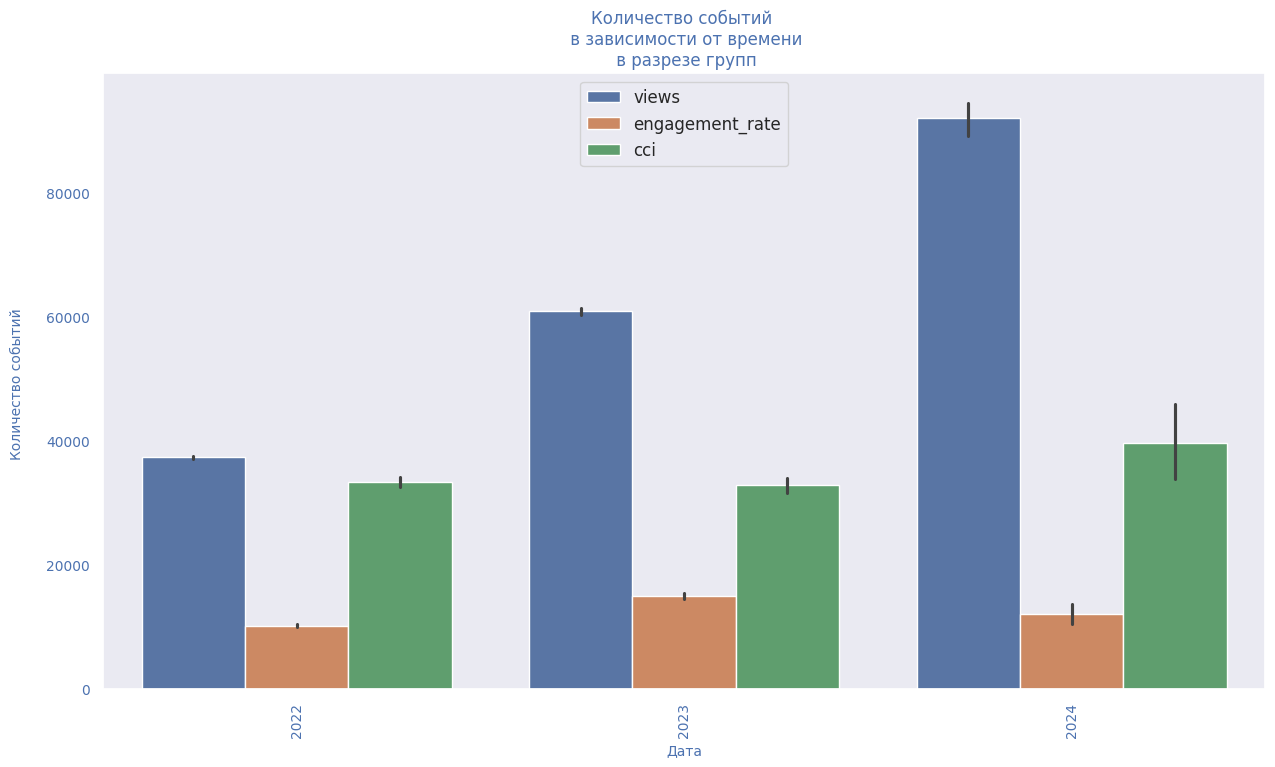

In [68]:
year_to_year('year')

Выведем данные за 2023 год в разрезе месяцев

In [69]:
final_v = final_v.query('year == 2023')

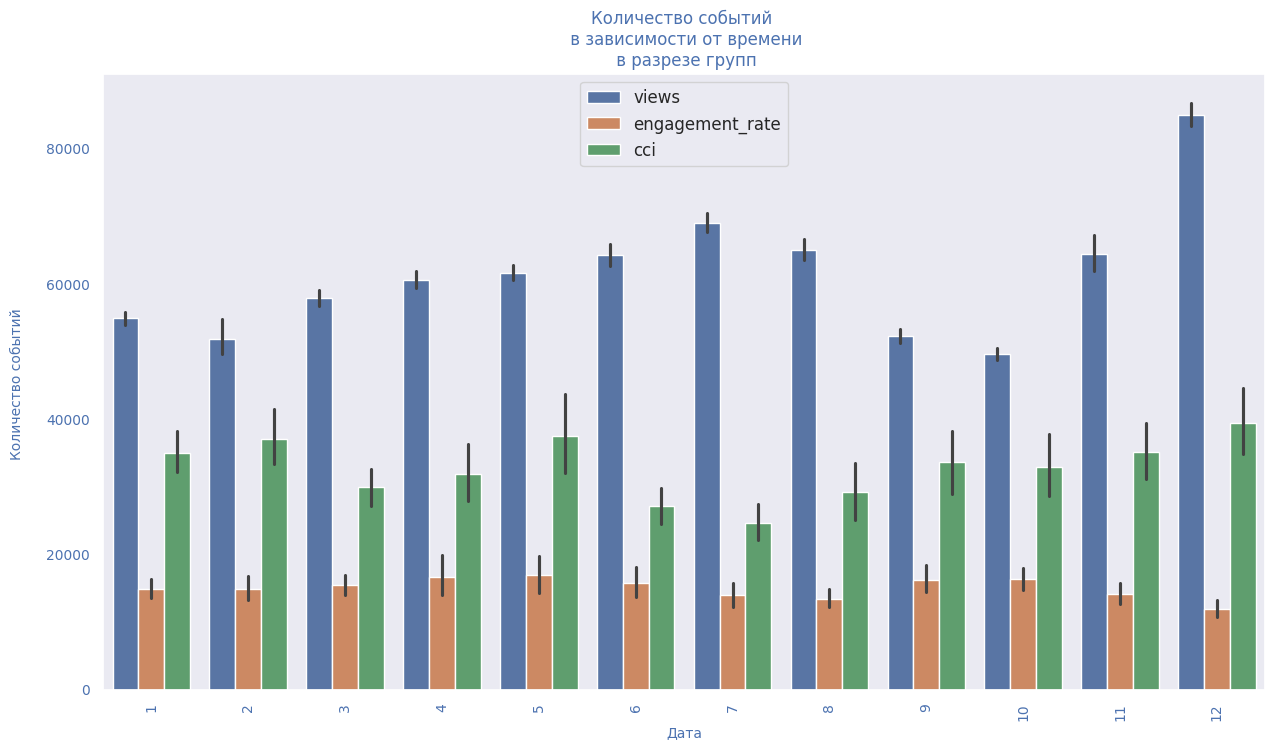

In [70]:
year_to_year('month')

<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
    
- Мы можем сказать, что:
    
- в 2023 году количество просмотров имеет две зоны роста и две зоны падения.  
    
- изменение коэффициента цитирруемости повторяет динамику изменения количества просмотров.  
    
- а динамика коэффициента вовлеченности отличается от динамики цитируемости и падает к концу 2023 года

#### 4.4.5 Распределение популярности постов по времени суток и по дням недели
Создадим небольшую функцию `dist_in_time`, которая построит нам графики в зависимости от дня недели или времени суток

In [71]:
def dist_in_time(value, step):
# задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

# в первой ячейке строим распределение по группе количеству заказов
    ax1 = plt.subplot(1, 2, 1)
# вызываем функцию
    event_in_time_bar(posts, 'engagement_rate', value, step, ax1)

# во второй ячейке строим распределение по количеству покупателей
    ax2 = plt.subplot(1, 2, 2)
# вызываем функцию
    event_in_time_bar(posts, 'cci', value, step, ax2)


    return

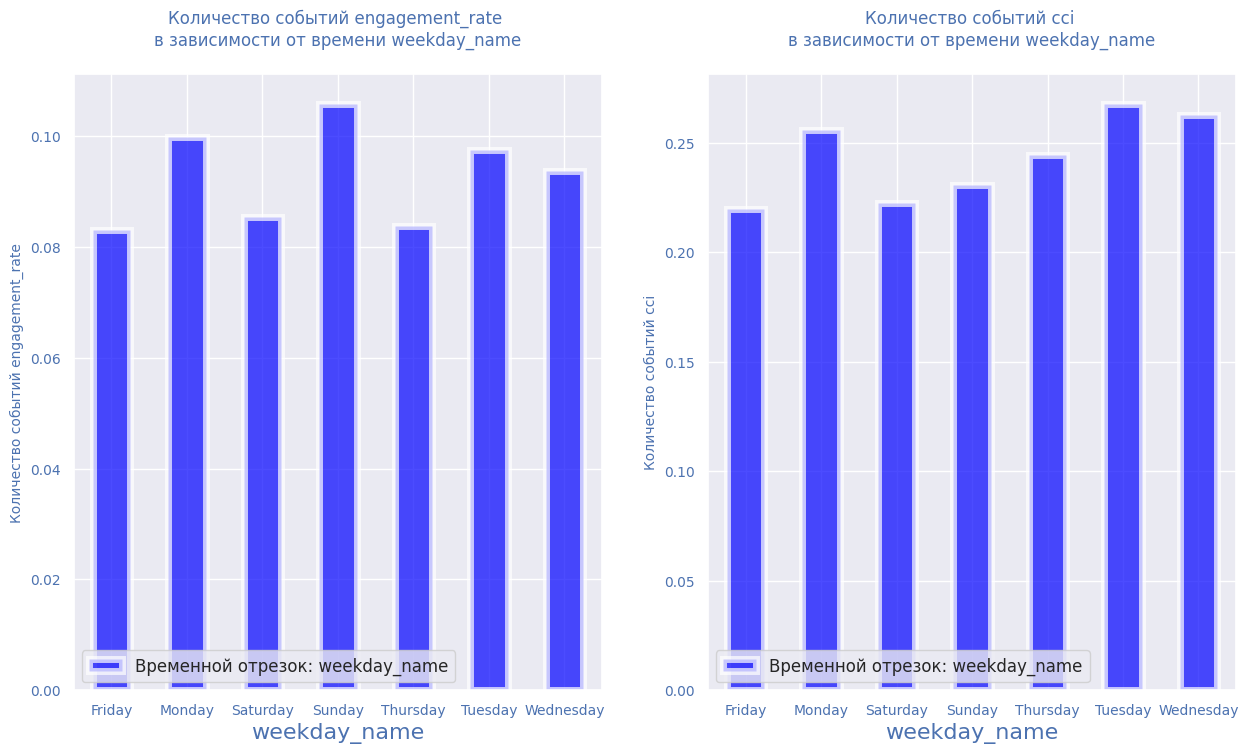

In [72]:
dist_in_time('weekday_name', 'median')

<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
    
- Читатели наиболее активно реагируют на посты, вышедшие в воскресенье и понедельник
    
- наибольшее количество репостов приходится на посты, опубликованные с понедельника по четверг
    
  
    Напомним, что даты здесь - это даты выхода поста (а не дата простановки комментария или реакции)

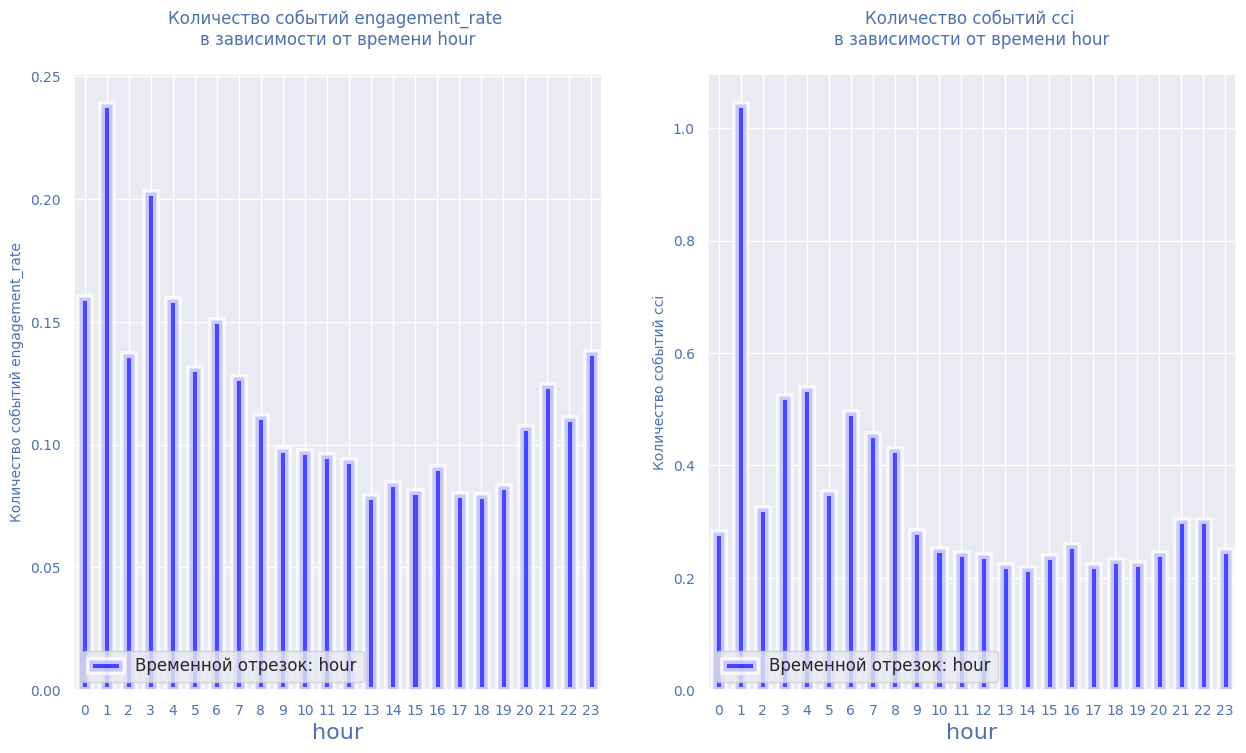

In [73]:
dist_in_time('hour', 'median')

<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
    
- Читатели наиболее активны в реакциях и в репостах на публикации, вышедшие заполночь - с часу ночи и до 8 утра.
**помним, что время здесь - это время выхода поста (а не дата простановки комментария или реакции). Вероятно, читатели утром и в течение дня просматривают посты, накопившиеся за ночь и в один присест - сразу - реагируют на них**

### 4.5 Зависимость популярности поста от сложности публикуемого текста.

Определим зависимость популярности публикации от:
- количества слов в публикации - столбец	 `words_in_text`
- количества символов в публикации: буквы, цифры, пробелы и символы - столбец `simbols_in_text`
- средней длины слова в каждом посте (количество символов, разделенное на количество слов)- столбец	 `avg_word_len`
- количества слов, которые в каждой публикации приходится на один знак препинания - столбец	 `marks_per_text`

Популярность примет значения:
- `comments_per_views` (отношение количества комментариев к количеству просмотров поста)
- `reactions_per_views` (отношение количества комментариев к количеству просмотров поста)



In [74]:
posts.sample(1)

id                       date  \
3420  29764  2022-11-02 18:01:10+00:00   

                                                   text    views  \
3420  Наш [спецпроект](https://www.kinopoisk.ru/spec...  31997.0   

                                              reactions  forwarded  \
3420  {'_': 'MessageReactions', 'results': [{'_': 'R...      184.0   

      reactions_count  comments type_attachment  lenght  cong_coef  \
3420              220         7  пост с ссылкой      80    0.76548   

                           post_topic  comp_score complexity  negative  ...  \
3420  Ретроспектива, сюжеты, интервью         2.0    обычный       0.0  ...   

      avg_word_len  punct_marks  marks_per_text  popular_word_percent  year  \
3420           6.4         20.0             9.0                  1.68  2022   

      month  weekday weekday_name hour  times_of_day  days_cnt  \
3420     11        2    Wednesday   18         вечер       2.0   

      comments_per_views  reactions_per_views  engagement_rate    cci  
3420               0.022                0.688           0.0886  0.575  

[1 rows x 42 columns]

In [75]:
posts[['simbols_in_text', 'words_in_text', 'avg_word_len', 'marks_per_text']].describe()

simbols_in_text  words_in_text  avg_word_len  marks_per_text
count      7267.000000    7267.000000   7267.000000          7267.0
mean        362.619100      73.850007      4.941062             inf
std         336.311258      65.779058      1.210570             NaN
min           3.000000       2.000000      0.800000             1.0
25%         182.000000      36.000000      4.200000             8.0
50%         277.000000      56.000000      4.800000            11.0
75%         428.000000      90.000000      5.500000            17.0
max        3977.000000     844.000000     22.800000             inf

~Для корректного построения диарамм приравняем к 140 единицам значение бесконечности (inf), принимаемое параметром `marks_per_text`~

In [76]:
posts.loc[(posts['marks_per_text'] == posts.marks_per_text.max()), 'marks_per_text'] = 140

#### 4.5.1 Гистограмма распределения  значений рассматриваемых параметров
Построим гистограмму распределения  значений рассматриваемых параметров
Создадим небольшую функцию для построения распределения по количеству тех или иных событий в разрезе групп

In [77]:
def drow_hist_twice(mark_1, mark_2):
    # задаём размер сетки для графиков
    plt.figure(figsize=(30, 5))
    # в первой ячейке строим распределение по группе А
    ax1 = plt.subplot(1, 2, 1)
    # вызываем функцию
    orders_distr(mark_1, ax1)
    # во второй ячейке строим распределение по группе В
    ax2 = plt.subplot(1, 2, 2)
    # вызываем функцию
    orders_distr(mark_2, ax2)

    return

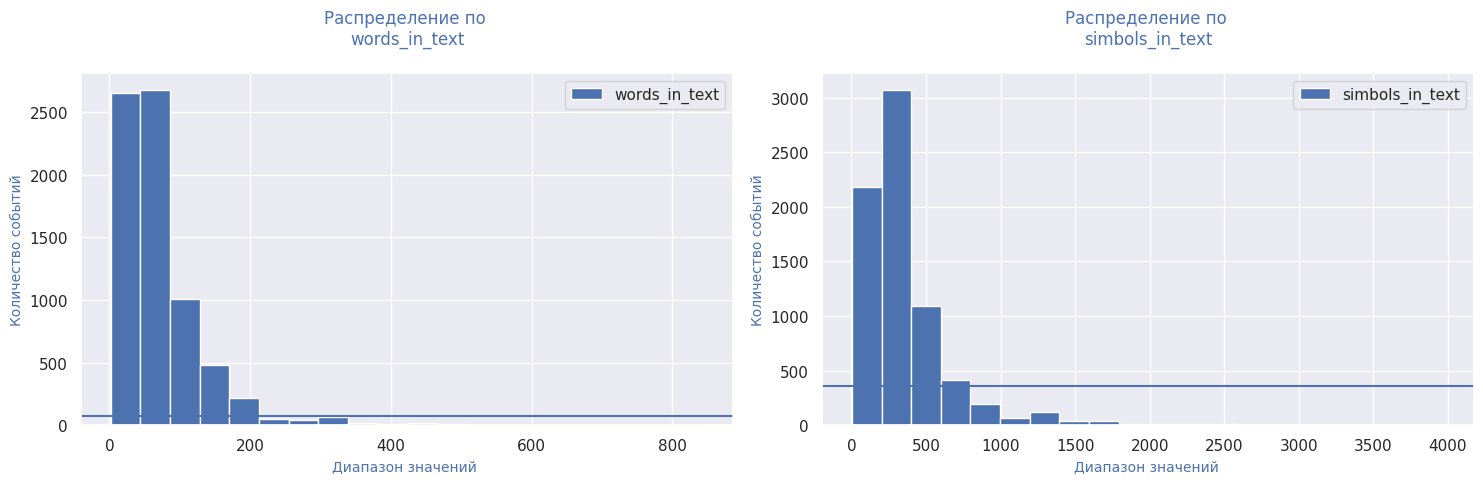

In [78]:
drow_hist_twice('words_in_text', 'simbols_in_text')

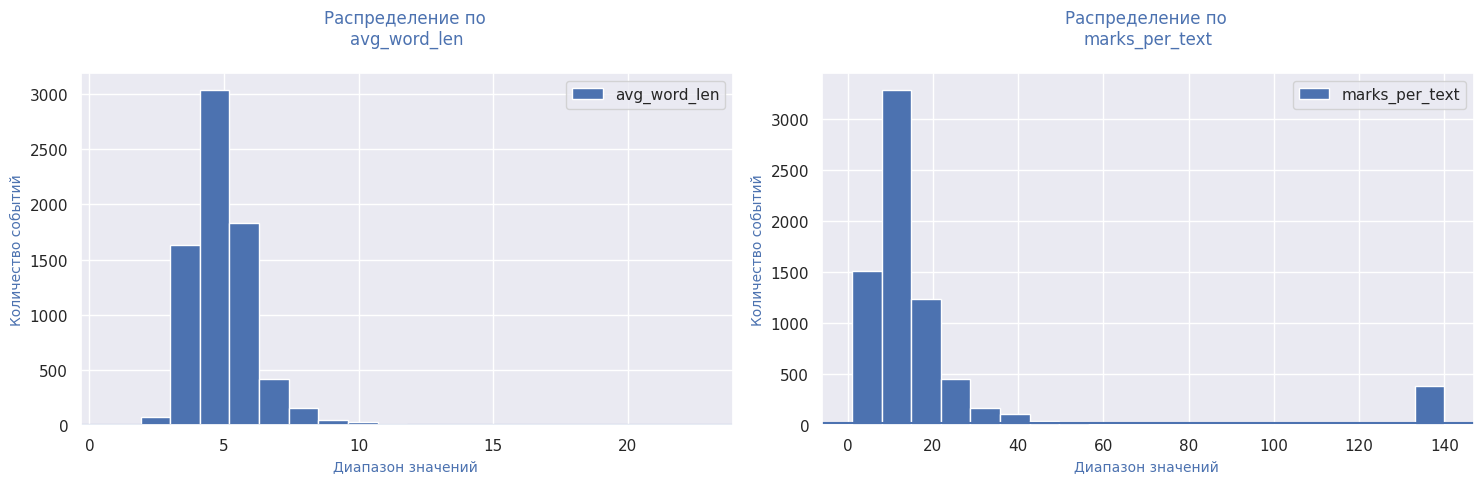

In [79]:
drow_hist_twice('avg_word_len',	'marks_per_text')

<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
Обычно в публикации:
    
- содержится до 200 слов, в среднем - 68 слов, медиана - 50 слов
   
- содержится до 1000 символов (буквы, цифры, пробелы и символы), наиболее часто до 500 символов, в среднем - 322 символа, медиана - 245 символов
    
- средняя длина слова составляет от 3 до 8 символов    
   
- один знак препинаниня приходится на чуть более, чем 25 символов

    

<div style="border-radius: 45px; border:solid green 7px; padding: 40px">

**Для сравнения - в постах канала Иннополис:**
Обычно в публикации:
    
- содержится до 120 слов, в среднем - 65 слов
   
- содержится до 1100 символов (буквы, цифры, пробелы и символы), наиболее часто до 250 символов, в среднем - 400 символов
    
- средняя длина слова составляет от 3 до 8 символов    
   
- один знак препинаниня приходится на чуть более, чем 25 символов

**То есть мы видим много близких значений критериев в обоих каналах**

    

#### 4.5.2 Диаграмма рассеяния

Построим диаграмму плотности: зависимость отоносительного количества комментариев от исследуемых параметров.  
Создадим функцию `corr_score_sales`

In [80]:
def corr_score_sales(param_x, param_y, limit_x_floor, limit_x_ceiling, limit_y):

    plt.figure(figsize=(12,6))
    plt.scatter(posts[param_x], posts[param_y])
    #plt.xlim(limit_x_floor, limit_x_ceiling)
    #plt.ylim(0, limit_y)
    plt.title(f'Зависимость \nмежду {param_x}  \nи {param_y}  \n', fontsize=20, color = "b")
    plt.xticks(rotation=0, fontsize=12, color = "b")
    plt.yticks(rotation=0, fontsize=12, color = "b")
    plt.xlabel(param_x, fontsize=14, color = "b")
    plt.ylabel(param_y, fontsize=14, color = "b")
    if param_x == 'marks_per_text':
        plt.xlim(0,130)
    plt.show()
    print("\033[34m"f'Козффициент корреляции Пирсмана между {param_x}  \nи {param_y}   =',\
      posts[param_x].corr(posts[param_y]).round(2))
    print("\033[34m"f'Козффициент корреляции Спирмана между {param_x}  \nи {param_y}   =',\
      spearmanr(posts[i], posts[j])[0].round(2))
    #if abs(spearmanr(posts[i], posts[j])[0]) >0.1:


    return

##### 4.5.2.1 Зависимость коэффициента вовлеченности

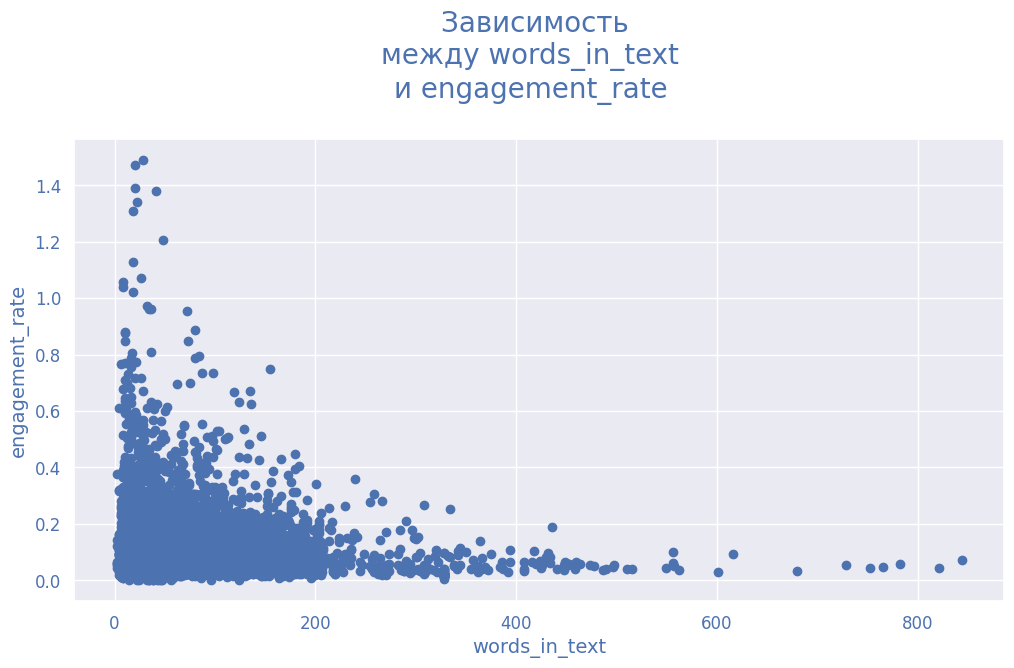

Козффициент корреляции Пирсмана между words_in_text  
и engagement_rate   = -0.14
Козффициент корреляции Спирмана между words_in_text  
и engagement_rate   = 0.05


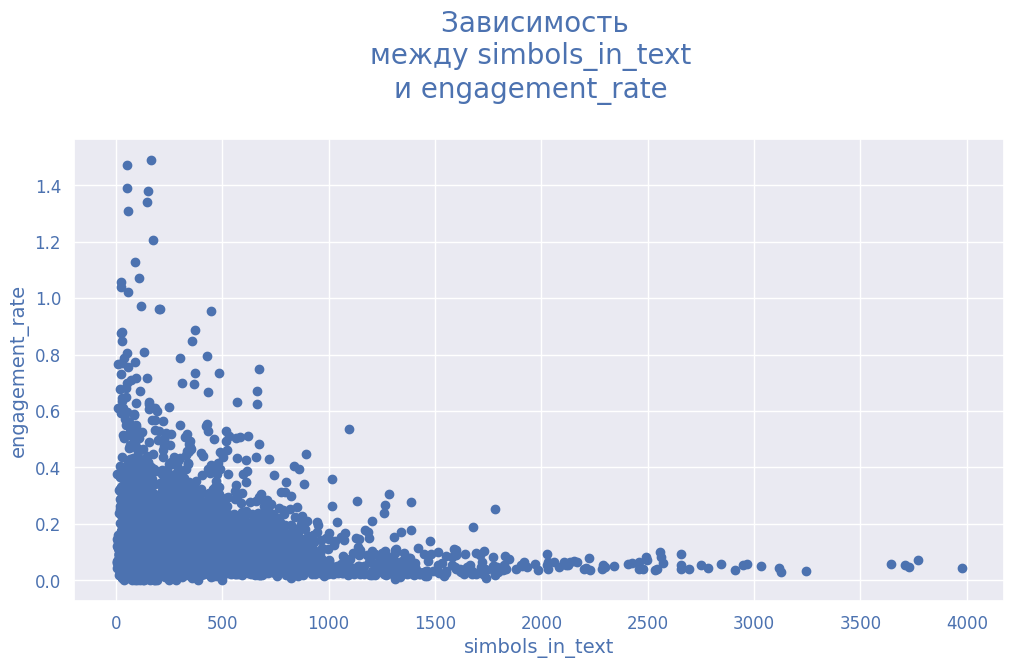

Козффициент корреляции Пирсмана между simbols_in_text  
и engagement_rate   = -0.17
Козффициент корреляции Спирмана между simbols_in_text  
и engagement_rate   = 0.04


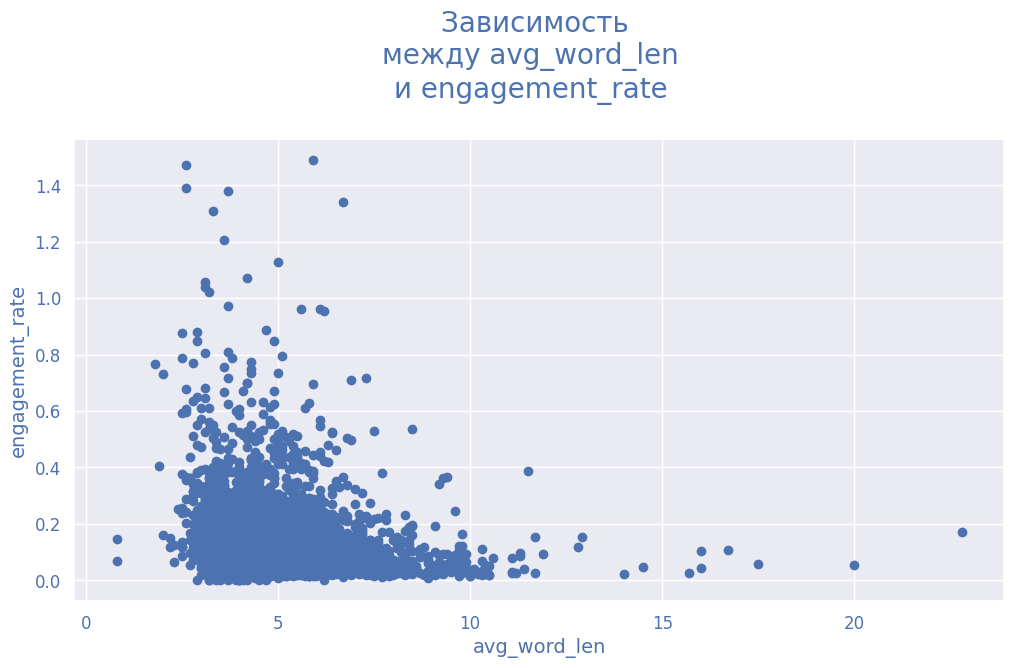

Козффициент корреляции Пирсмана между avg_word_len  
и engagement_rate   = -0.2
Козффициент корреляции Спирмана между avg_word_len  
и engagement_rate   = -0.06


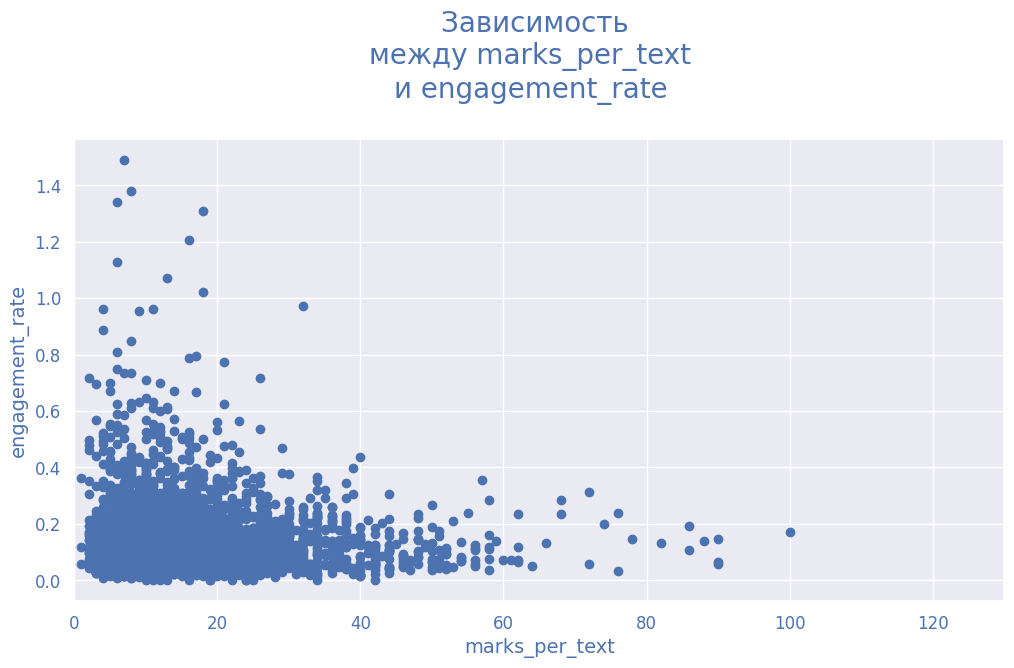

Козффициент корреляции Пирсмана между marks_per_text  
и engagement_rate   = 0.12
Козффициент корреляции Спирмана между marks_per_text  
и engagement_rate   = -0.06


In [81]:
for i in ['words_in_text','simbols_in_text',  'avg_word_len', 'marks_per_text']:
    corr_score_sales(i, 'engagement_rate', 0, 150, 0.4)


<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
наиболее часто встречаемое значение и наибольшее принимаемое значение коэффициента вовлеченности:
    
- при количестве слов в публикации - до примерно 80 слов. Козффициент корреляци имеет низкую величину.
   
- при количестве символов в публикации - до 500 символов. Козффициент корреляци имеет низкую величину.
    
- при средней длине слова - от 3 до 7 символов. Козффициент корреляци имеет низкую величину.
  
-  если количество знаков препинания приходится на не более, чем 20 слов. Козффициент корреляци имеет низкую величину.

    

##### 4.5.2.2 Зависимость индекса цитируемости

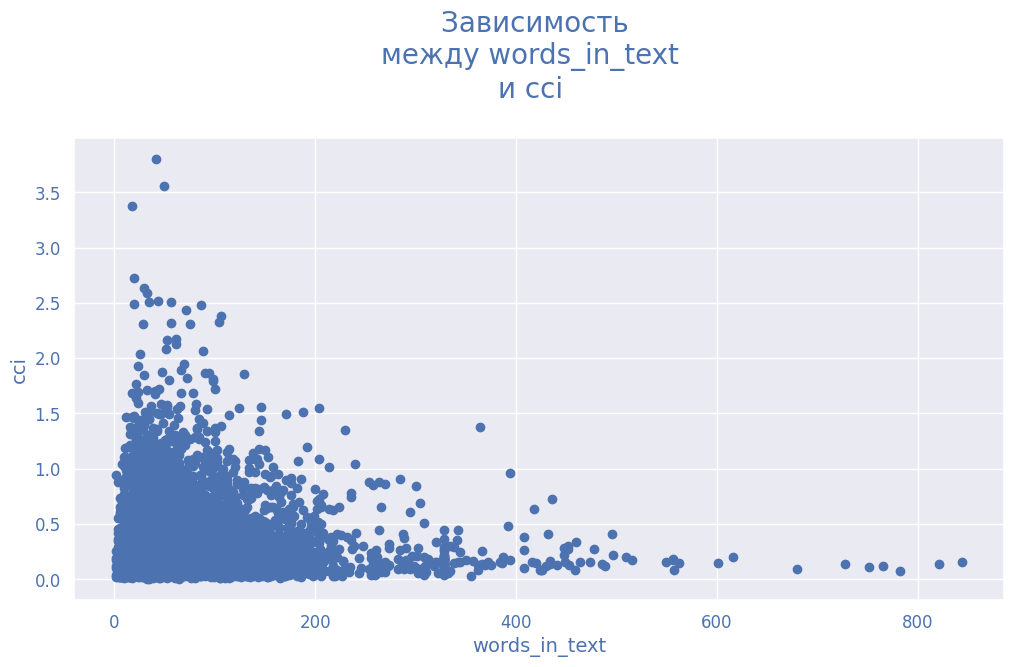

Козффициент корреляции Пирсмана между words_in_text  
и cci   = -0.08
Козффициент корреляции Спирмана между words_in_text  
и cci   = 0.05


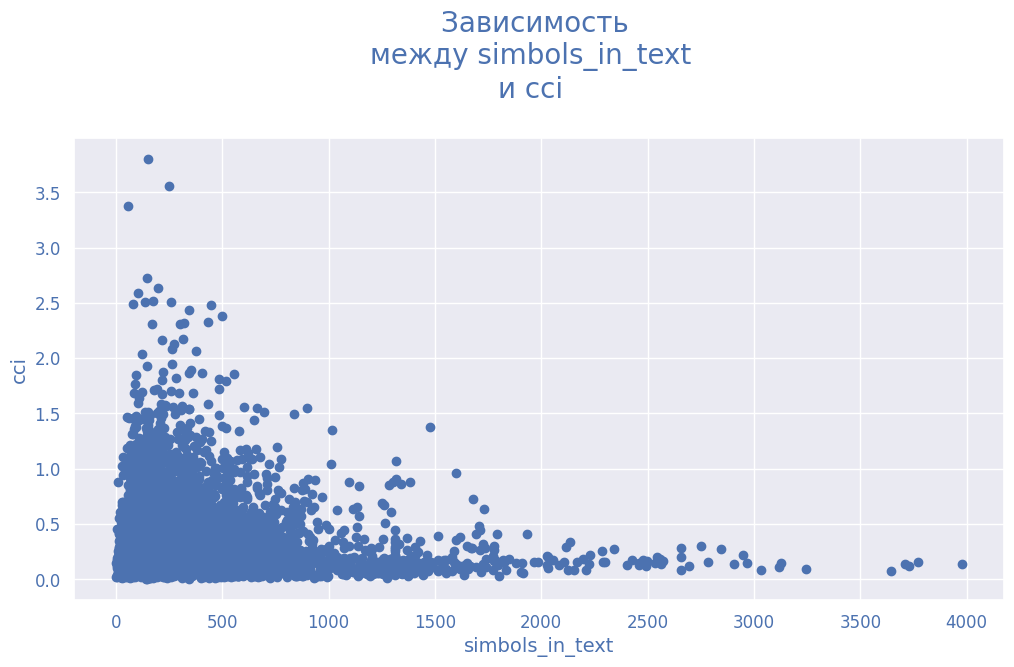

Козффициент корреляции Пирсмана между simbols_in_text  
и cci   = -0.12
Козффициент корреляции Спирмана между simbols_in_text  
и cci   = 0.04


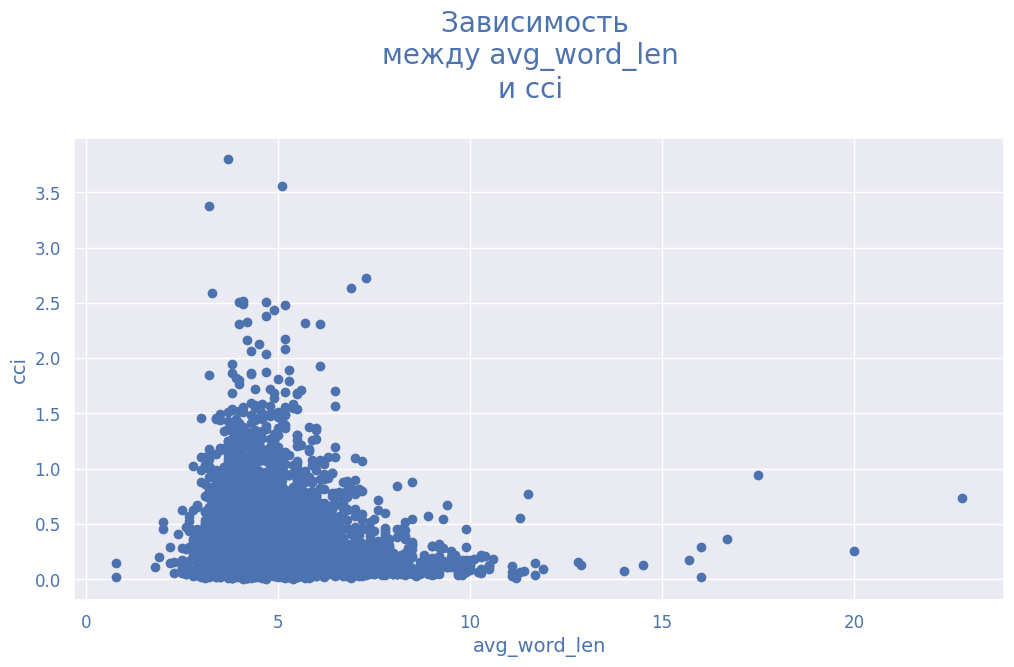

Козффициент корреляции Пирсмана между avg_word_len  
и cci   = -0.15
Козффициент корреляции Спирмана между avg_word_len  
и cci   = -0.06


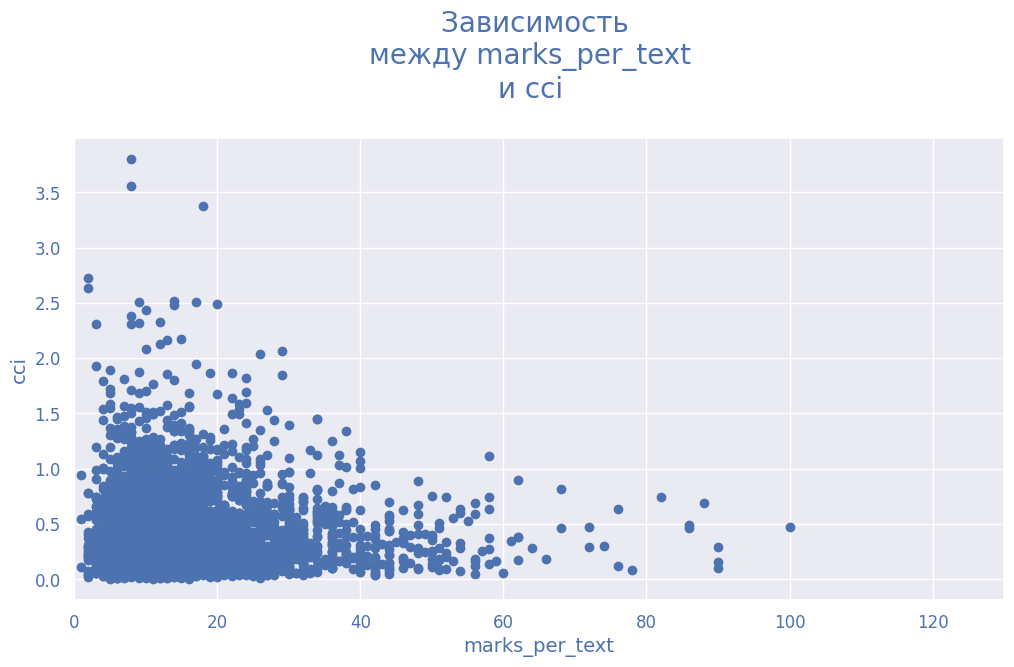

Козффициент корреляции Пирсмана между marks_per_text  
и cci   = 0.01
Козффициент корреляции Спирмана между marks_per_text  
и cci   = -0.06


In [82]:
for i in ['words_in_text','simbols_in_text',  'avg_word_len', 'marks_per_text']:
    corr_score_sales(i, 'cci', 0, 150, 4)


<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
    
Наиболее часто встречаемая величина коэффициента цитируемости:
    
- при количестве слов в публикации - до примерно 100 слов. Козффициент корреляци имеет низкую величину.
   
- при количестве символов в публикации - до 500 символов. Козффициент корреляци имеет низкую величину.
    
- при средней длине слова - от 3 до 6 символов.  Козффициент корреляци имеет низкую величину.
  
-  если количество знаков препинания приходится на не более, чем на примерно 30 слов. Козффициент корреляци имеет практически нулевую величину.

    

<div style="border-radius: 45px; border:solid green 14px; padding: 40px">

**Для сравнения анализ по постам канала Иннополис**

Наибольшую популярность набирают посты, в тексте которых:
    
- содержится до 50 слов. Чуть меньшую популярность имеют посты, содержащие от 60 до 120 слов. Чем больше слов в публикации - тем меньше популярность.
   
- содержится до 450 символов. Чуть меньшую популярность имеют посты, содержащие от 500 до 900 символов. Чем больше символов в публикации - тем меньше популярность.
    
- средняя длина слова (не считая предлогов, междометий и т.д.) - от 3 до 6 символов. Чуть меньшую популярность имеют посты, в которых средняя длина слова - от 7 до 9 символов. Чем больше средняя длина слова в публикации - тем меньше популярность.
  
-  количество знаков препинания приходится на не более, чем 7 слов. Чем на большее количество слов приходится один знак препинания, тем больше популярность.
    
    Резюмируя, чем сложнее текст, тем меньше популярность

**Таким образом, популярность канала Кинопоиска не имеет настолько сильной зависимости от метрик текста, как в канале Иннополиса.**    

    

### 4.6 Зависимость времени жизни поста от времени его публикации

#### 4.6.1 Зависимость времени жизни поста от месяца его публикации

**1) Медианное время жизни поста**

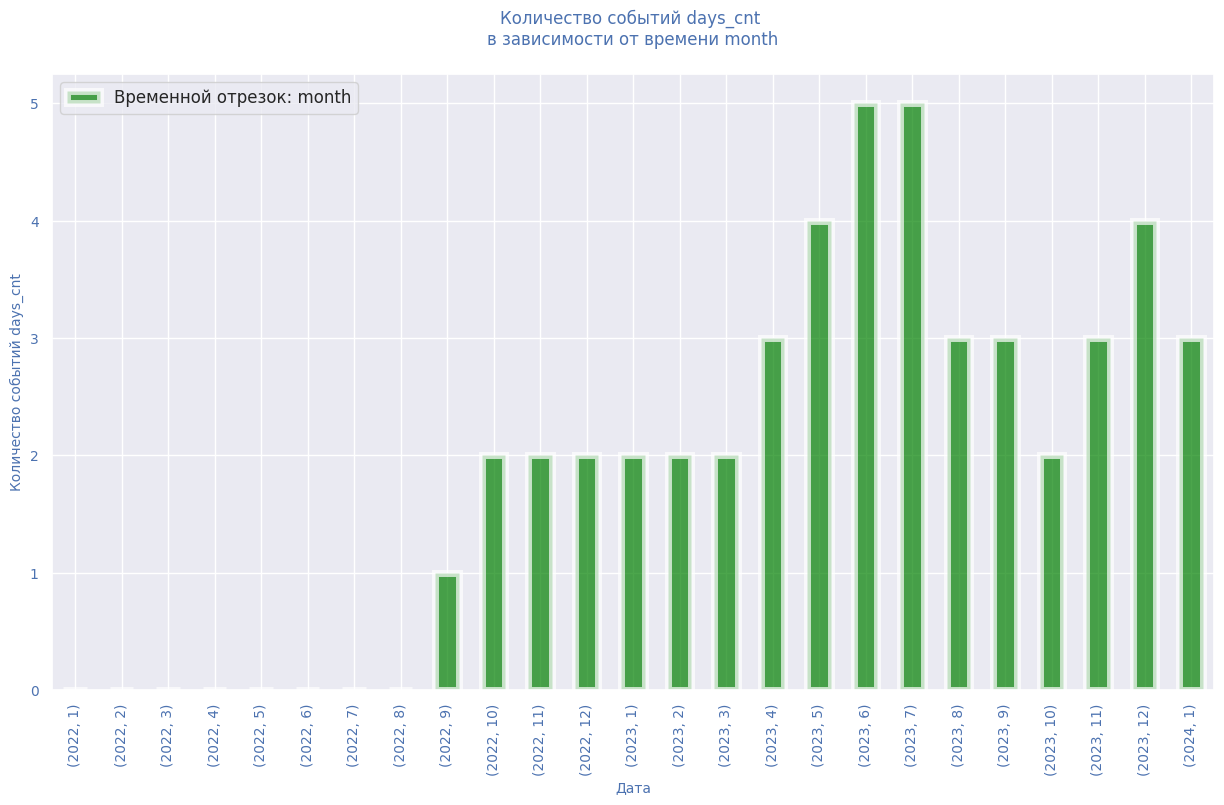

In [83]:
event_in_time_bar_year(posts, 'days_cnt', 'month', 'median')

**2) Среднее  время жизни поста**

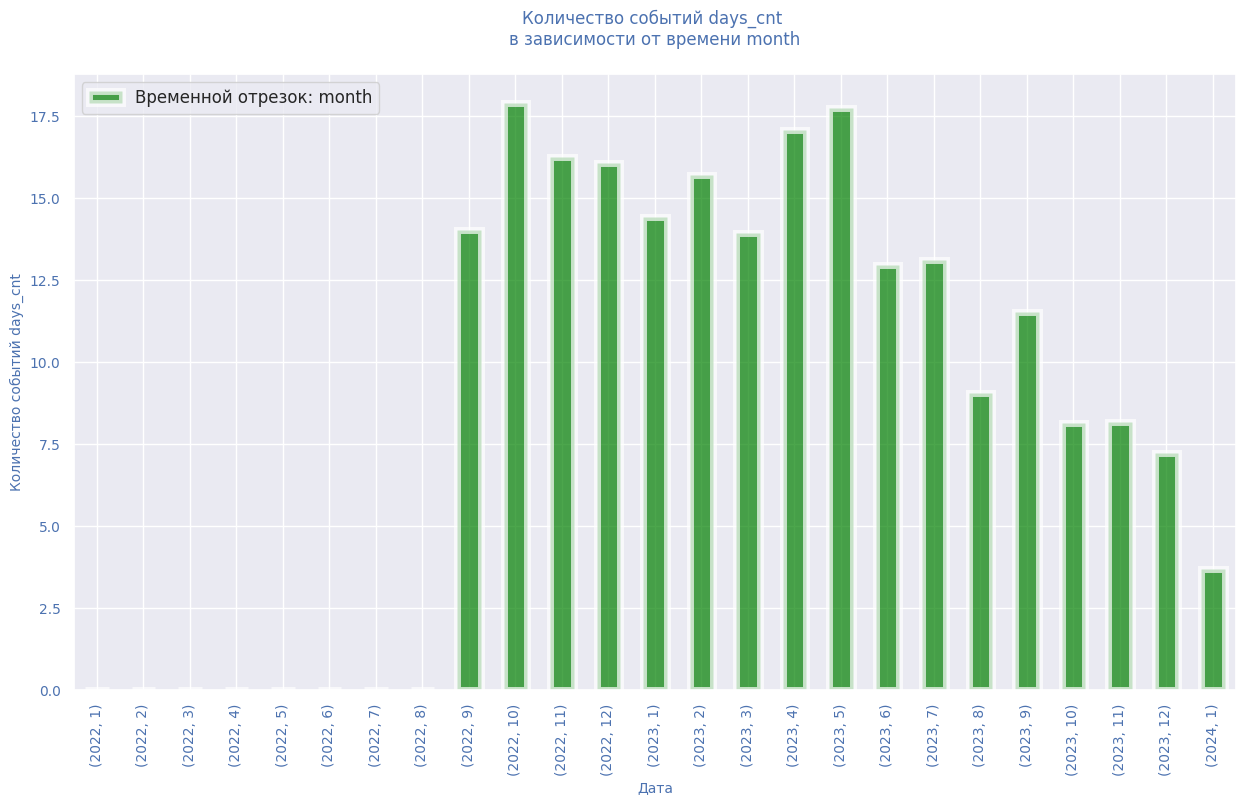

In [84]:
event_in_time_bar_year(posts, 'days_cnt', 'month', 'mean')

**3) Максимальное время жизни поста**

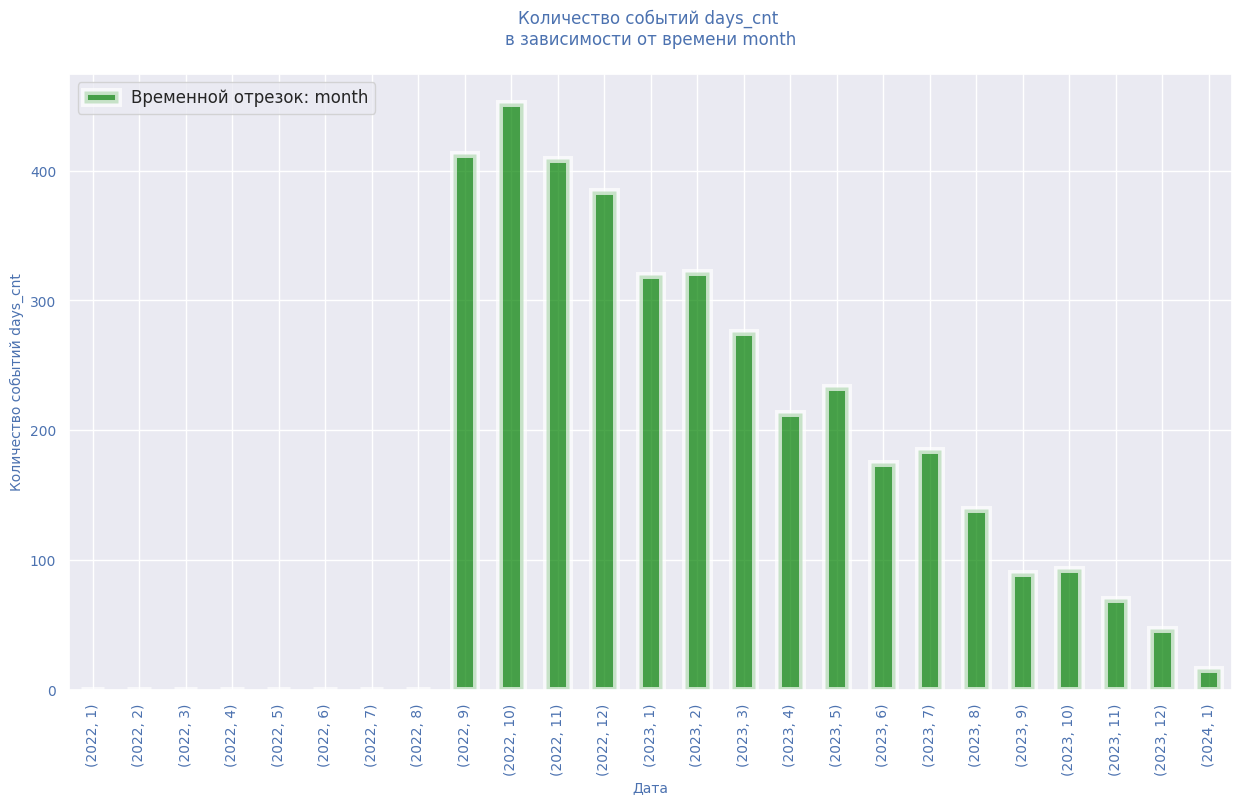

In [85]:
event_in_time_bar_year(posts, 'days_cnt', 'month', 'max')

Медианное время жизни поста - 2-5 дней.  
Максимальное время жизни поста линейно ниспадает, что яляется вполен объяснимым.  
и тем не менне посмотри, что это за посты - долгожители

In [86]:
culc_list_days_cnt = ['days_cnt']
for i in culc_list_days_cnt:
    calculate_border(i)

Для days_cnt верхняя граница нормальных значений равна  16


Выведем на экран для 5 постов, набравших наибольшее количество просмотров, имеющиеся метрики измерения текста

In [87]:
posts[['engagement_rate', 'cci']].describe()

engagement_rate          cci
count      7267.000000  7267.000000
mean          0.119432     0.333337
std           0.108675     0.303126
min           0.000000     0.000000
25%           0.056100     0.140000
50%           0.092100     0.246000
75%           0.147400     0.424500
max           1.488600     3.800000

In [88]:
culc_list_days_cnt.append('post_topic')
culc_list_days_cnt.append('type_attachment')
culc_list_days_cnt.append('engagement_rate')
culc_list_days_cnt.append('cci')
posts.nlargest(5, 'days_cnt')[culc_list_days_cnt]

days_cnt                       post_topic type_attachment  \
3865     452.0                    Анонс новинок    пост с видео   
3873     445.0  Ретроспектива, сюжеты, интервью     пост с фото   
3911     413.0                    Анонс новинок     пост с фото   
3233     409.0               Дайджесты сериалов  пост с ссылкой   
3482     405.0               Дайджесты сериалов     пост с фото   

      engagement_rate    cci  
3865           0.2241  0.878  
3873           0.0840  0.524  
3911           0.1150  0.295  
3233           0.0701  0.177  
3482           0.1016  0.302

In [89]:
print('\033[92m''Содержание выбранных публикаций')
posts.nlargest(5, 'days_cnt')['text'].tolist()

Содержание выбранных публикаций


['Невероятно, но факт: изначально Disney не верила в «Пиратов Карибского моря» и даже хотела отказаться от съемок первой части серии. Более того, студийные боссы сетовали, что Депп своими импровизациями «гробит фильм».  \n\nКак все сложилось в итоге, вы знаете сами.\n\nВ нашем новом видео вспоминаем, как создавалось незабвенное «Проклятие Черной жемчужины».',
 '[«Тела, тела, тела»](https://www.kinopoisk.ru/film/4496039/?utm_source=telegram&utm_medium=social) — новый слэшер студии А24 с Питом Дэвидсоном в главной роли. \n\nРассказываем о фильме в карточках в честь его официального цифрового релиза.',
 'Билл Скарсгард и Лили-Роуз Депп [сыграют](https://deadline.com/2022/09/bill-skarsgard-lily-rose-depp-robert-eggers-nosferatu-focus-1235131507/) в «Носферату» Роберта Эггерса.\n\nВ переосмыслении классической истории ужасов речь пойдет о молодой женщине, преследуемой призраками, и древнем трансильванском вампире.\n\nРанее Эггерс уже разрабатывал этот фильм в 2019 году. Планировалось, что г

Из ТОП-5 по времени жизни только один выбивается за пределы нормальных значений - это пост с номером 3865 и посвящен он вселенной «пиратов карибского моря». Так что время жизни тут вполне объяснимо и не дает возможностей для интерпретации

### 4.7 Зависимость популярности поста от темы

In [90]:
# строим столбчатую диаграмму, отражающую количество событий в зависимости от времени
def event_in_group(data_name, eventname, time_interval, operation, ax, x_size, y_size, x_name):
    t1 = data_name.groupby(time_interval).agg({eventname:operation}).sort_values(eventname, ascending = False)

    ax = t1.plot(figsize=(15,8),
    kind ='bar',
    y = eventname,
    linewidth=5,
    alpha=0.7,
    label='Операция при группировке: '+ operation,
    ax=ax
    )


    plt.title('Количество событий {} в зависимости от {}\n'.format(eventname, time_interval), fontsize=20, color = "b")
    plt.legend(fontsize=14, bbox_to_anchor=(0.5, 1))
    plt.xticks(rotation=15, fontsize=12, color = "b")
    plt.yticks(rotation=0, fontsize=12, color = "b")
    plt.xlabel(x_name, fontsize=12, color = "b")
    plt.ylabel(f"{operation} событий {eventname}", fontsize=12, color = "b")
    plt.subplots_adjust(top=1.5, hspace = 0.3)
    return

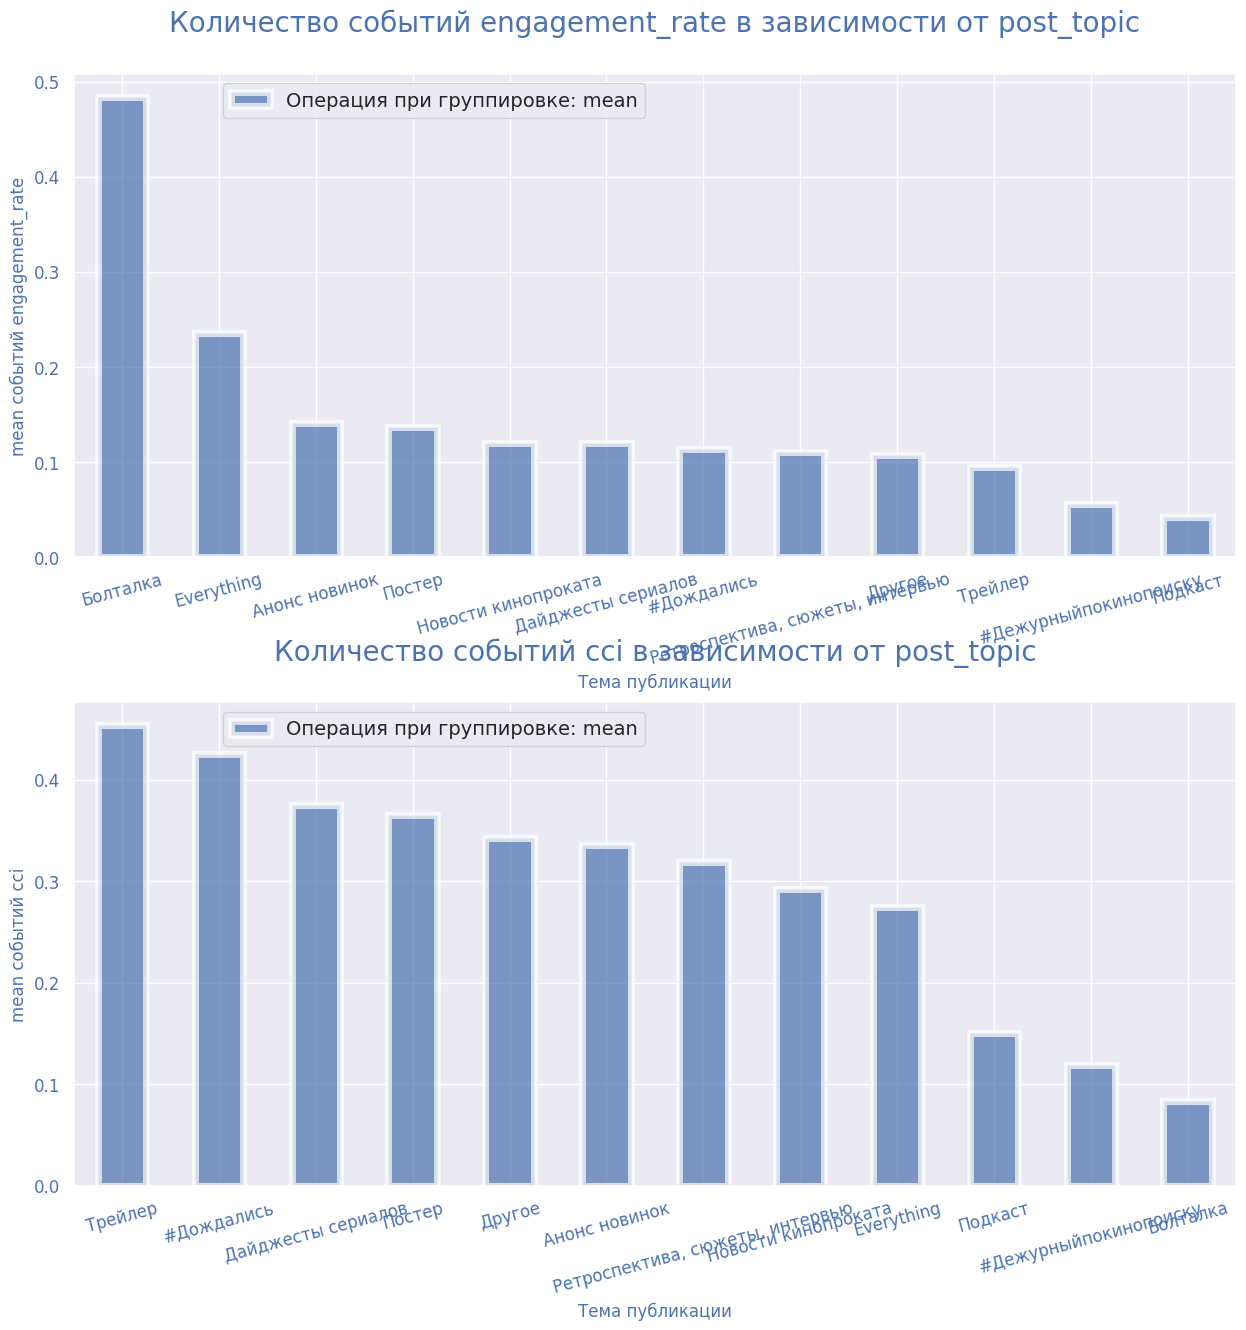

In [91]:
# задаём размер сетки для графиков
plt.figure(figsize=(30, 60))
# в первой ячейке строим зависимость ERR
ax1 = plt.subplot(2, 1, 1)
# вызываем функцию
event_in_group(posts, 'engagement_rate', 'post_topic', 'mean', ax1, 31, 33, 'Тема публикации')

# во второй ячейке строим зависимость CCI
ax2 = plt.subplot(2, 1, 2)
# вызываем функцию
event_in_group(posts, 'cci', 'post_topic', 'mean', ax2, 31, 35,'Тема публикации')



<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
Как видно из графиков, наиболее интересующими читателей темами являются События Иннополиса и Университет Иннополиса. Меньше вовлеченности в постах на темы Подборка новостных ссылок, Вакансии, Голосование. При использовании различных метрик результаты отличаются незначительно.

### 4.8 Зависимость популярности поста от типа поста

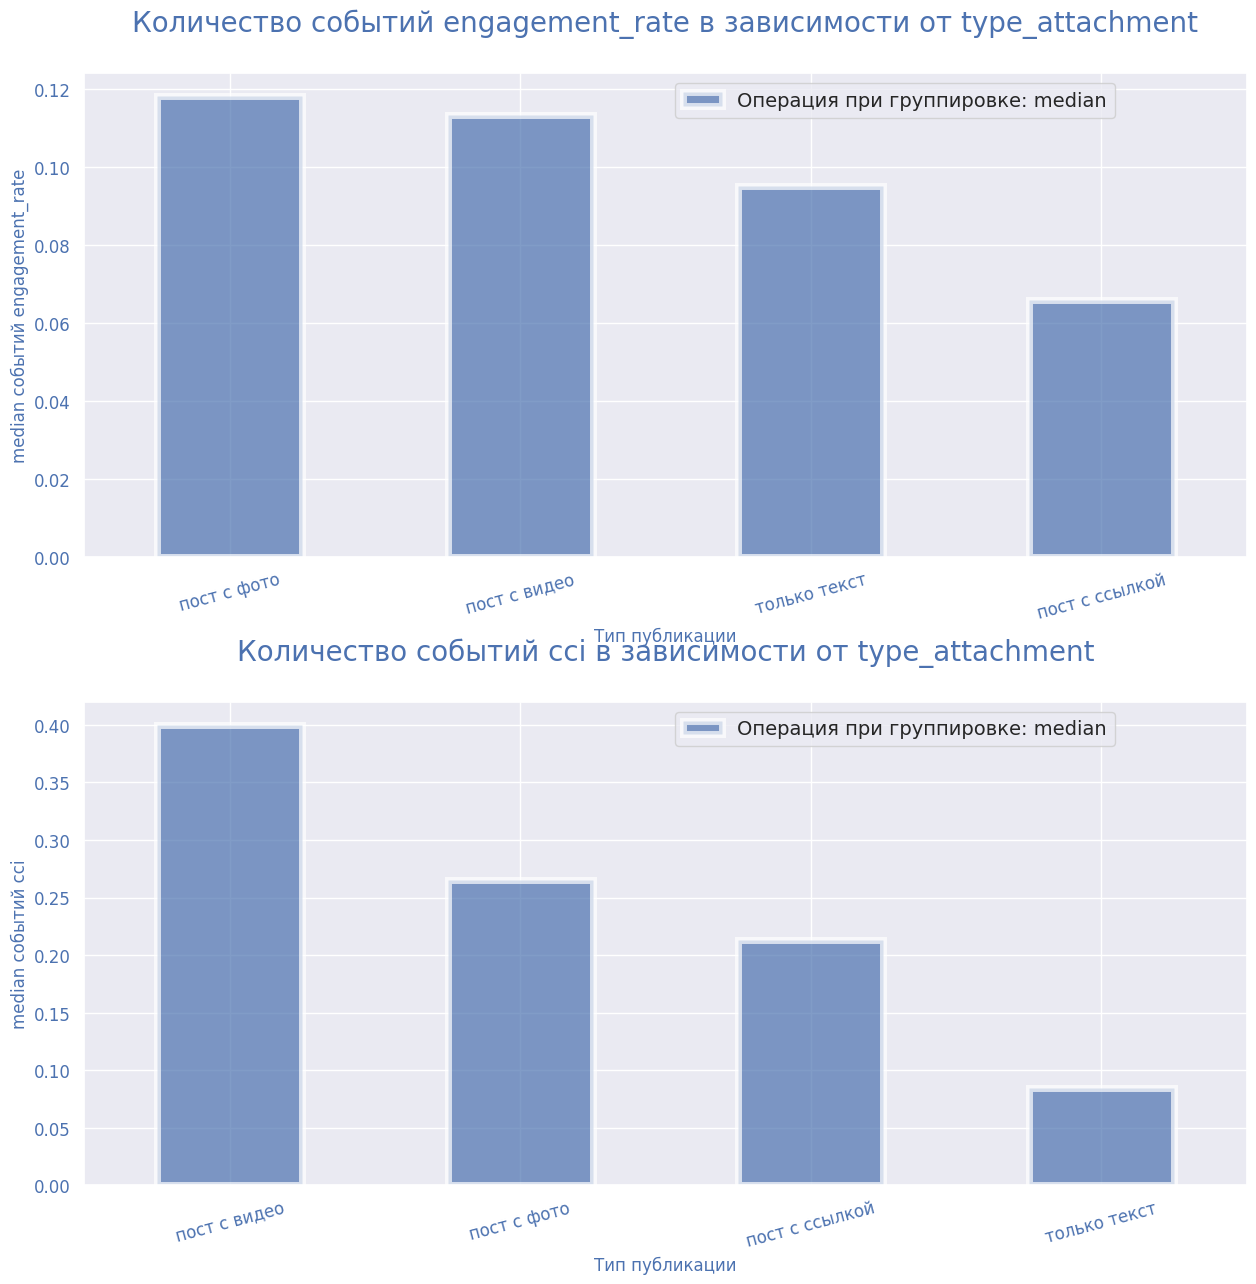

In [92]:
# задаём размер сетки для графиков
plt.figure(figsize=(30, 40))
# в первой ячейке строим распределение по ERR по комментариям
ax1 = plt.subplot(2, 1, 1)
# вызываем функцию
event_in_group(posts, 'engagement_rate', 'type_attachment', 'median', ax1, 31, 33,'Тип публикации')

# во второй ячейке строим распределение по ERR по реакциям
ax2 = plt.subplot(2, 1, 2)
# вызываем функцию
event_in_group(posts, 'cci', 'type_attachment', 'median', ax2, 31, 35,'Тип публикации')


<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
Посты с приложенным фото имеют наибольший коэффициент вовлеченности.
Посты с приложенным видео имеют наибольший коэффициент цитируемости.

Таким образом, посты с медиа эффективнее привлекают пользователей и репостятся.  

### 4.9 Зависимость популярности поста от количества популярных слов в посте

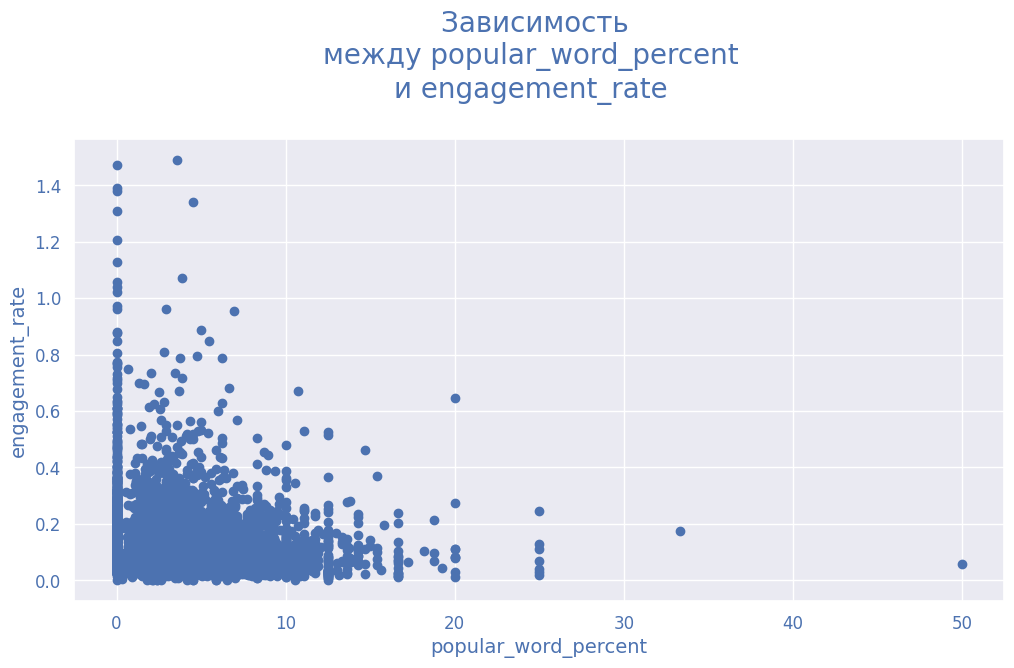

Козффициент корреляции Пирсмана между popular_word_percent  
и engagement_rate   = -0.11
Козффициент корреляции Спирмана между popular_word_percent  
и engagement_rate   = 0.02


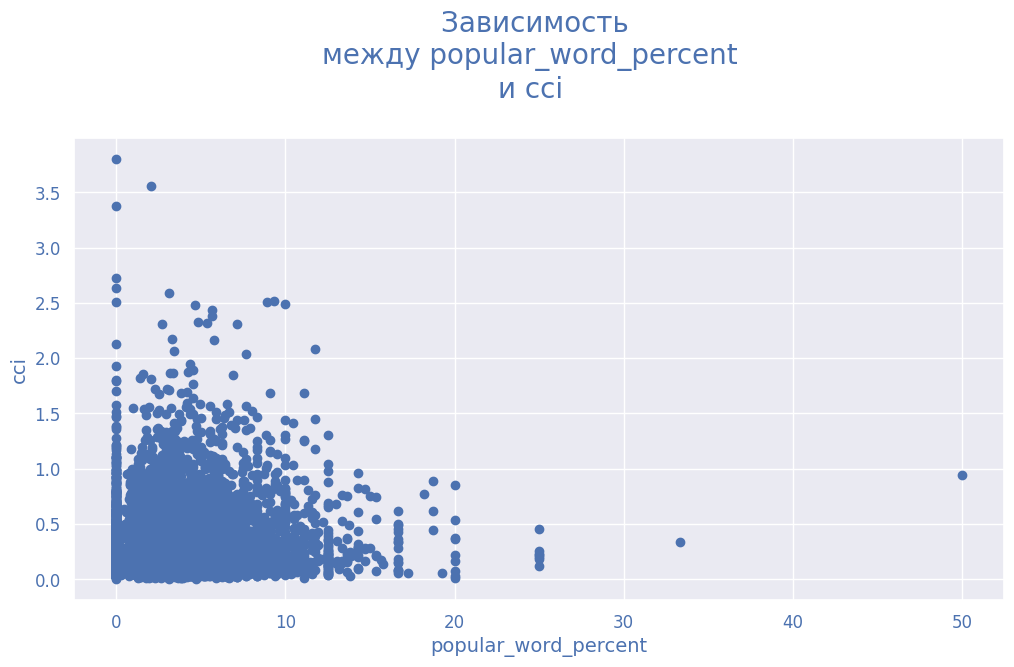

Козффициент корреляции Пирсмана между popular_word_percent  
и cci   = 0.04
Козффициент корреляции Спирмана между popular_word_percent  
и cci   = 0.03


In [93]:
for i in ['engagement_rate','cci']:
    corr_score_sales('popular_word_percent', i, 0, 150, 0.4)

<div style="border-radius: 45px; border:solid green 7px; padding: 40px">

Графики показали очень отсутствие взаимосвязь между метриками эффективности и цитируемости и количеством популярных слов в посте.  
И графики отражают выявленную ранее закономерность о зависимости популярности и цитируемости от общего количества слов в посте.  
Любопытно обратить внимание, на концентрацию показателей по четырем отдельным столбикам - при количестве популярных слов, равных нулю, 17, 20 и 25

### 4.10 Слова популярных и непопулярных публикаций.

Выберем первые 15 и последние 15 публикаций, предварительно отсортировав по агрегирующей метрике вовлеченности.

Наиболее и наименее часто употребляемые слова в ТОП-15 самых популярных постах

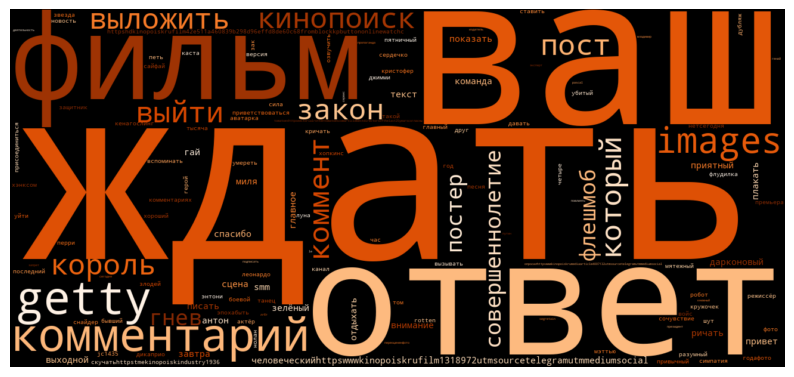

In [94]:
# выберем самые популярные посты
top_15 = posts.sort_values(by='engagement_rate', ascending=False).head(15)

# объединили посты в одну переменную
top_word_cloud = ' '.join(top_15['text'].tolist())

top_word_cloud = prepare_text(top_word_cloud)

# соберем текст
top_word_cloud_text = ' '.join(top_word_cloud)

# создание облака слов
wordcloud = WordCloud(width=1300, height=600, background_color='black', colormap='Oranges_r').generate(top_word_cloud_text)

# Отображение облака слов
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

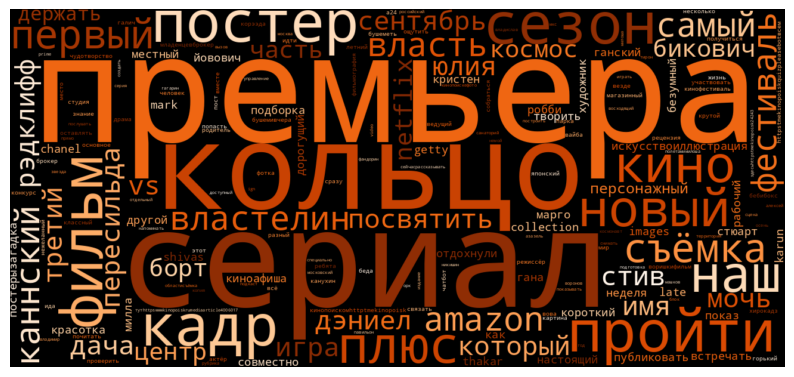

In [95]:
# выберем самые непопулярные посты
foot_15 = posts.sort_values(by='engagement_rate').head(15)

# объединили посты в одну переменную
foot_word_cloud = ' '.join(foot_15['text'].tolist())

foot_word_cloud = prepare_text(foot_word_cloud)

# соберем текст
foot_word_cloud_text = ' '.join(foot_word_cloud)

# создание облака слов
wordcloud = WordCloud(width=1300, height=600, background_color='black', colormap='Oranges_r').generate(foot_word_cloud_text)

# Отображение облака слов
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('foot_word_cloud.png')

Нпиболее и наименее часто употребляемые слова в ТОП-15 самых цитируемых постах

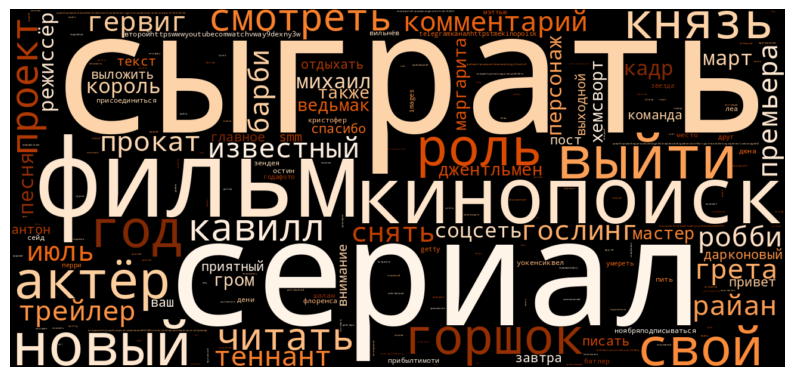

In [96]:
# выберем самые популярные посты
top_15 = posts.sort_values(by='cci', ascending=False).head(15)

# объединили посты в одну переменную
top_word_cloud = ' '.join(top_15['text'].tolist())

top_word_cloud = prepare_text(top_word_cloud)

# соберем текст
top_word_cloud_text = ' '.join(top_word_cloud)

# создание облака слов
wordcloud = WordCloud(width=1300, height=600, background_color='black', colormap='Oranges_r').generate(top_word_cloud_text)

# Отображение облака слов
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off');

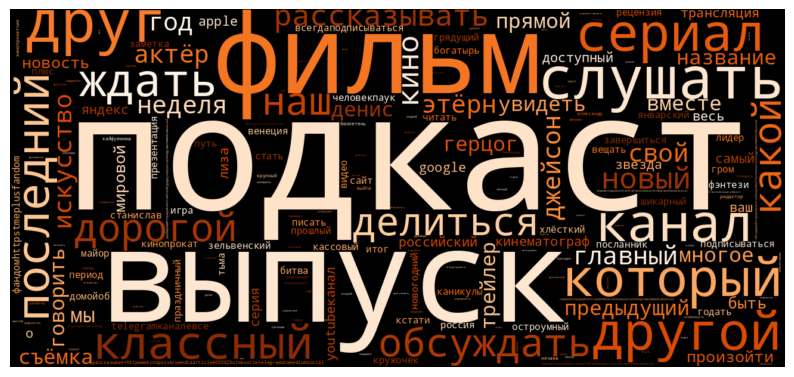

In [97]:
# выберем самые непопулярные посты
foot_15 = posts.sort_values(by='cci').head(15)

# объединили посты в одну переменную
foot_word_cloud = ' '.join(foot_15['text'].tolist())

foot_word_cloud = prepare_text(foot_word_cloud)

# соберем текст
foot_word_cloud_text = ' '.join(foot_word_cloud)

# создание облака слов
wordcloud = WordCloud(width=1300, height=600, background_color='black', colormap='Oranges_r').generate(foot_word_cloud_text)

# Отображение облака слов
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('foot_word_cloud.png')

<div style="border-radius: 45px; border:solid green 7px; padding: 40px">
На первом облаке слов указаны наиболее часто встречающиеся слова из 15-ти популярных постов. Выделяется слово "Ждать" - что подвтерждает исследование о популярности тем - (Дождались, Анонсы, Трейлеры).  

На третьем облаке слов указаны наиболее часто встречающиеся слова из 15-ти цитируемых постов. Выделяются слова "Сыграть", "Серал", "Фильм", "Новый". Это подтверждает выводы о пересылаемости постов с новинками и обзорами

<a id="6"></a>
## 4.11 Анализ эмодзи

Проведем Анализ эмодзи. Посчитаем количество эмодзи в зависимости от темы, типа публикаций, использованных слов, объема текста, сложностью текста.  
При возможности установим зависимость от положительных и отрицательных эмодзи.  

- выявим полный список эмодзи
- составим список положительных, отрицательных и нейтральных эмодзи
- посчитаем количество положительных, отрицательных и нейтральных эмодзи
- добавим в датафрейм столбцы с количеством положительных, отрицательных и нейтральных эмодзи для каждой публикации
- построим столбчатые диаграммы, отражающие распределение эмодци в разрезе:
 - темы публикации
 - типа публикации
 - использованных слов
 - времени публикации
 - объема текста


### 4.11.1 Выявим полный список эмодзи

In [98]:
df2 = posts

In [99]:
df2['reactions'][1]

"{'_': 'MessageReactions', 'results': [{'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '❤'}, 'count': 657, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '👍'}, 'count': 110, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '❤\\u200d🔥'}, 'count': 55, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '💅'}, 'count': 31, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '👎'}, 'count': 16, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '🔥'}, 'count': 9, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '🤪'}, 'count': 7, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 'emoticon': '🍌'}, 'count': 4, 'chosen_order': None}, {'_': 'ReactionCount', 'reaction': {'_': 'ReactionEmoji', 

In [100]:
df2.columns

Index(['id', 'date', 'text', 'views', 'reactions', 'forwarded',
       'reactions_count', 'comments', 'type_attachment', 'lenght', 'cong_coef',
       'post_topic', 'comp_score', 'complexity', 'negative', 'neutral',
       'positive', 'skip', 'speech', 'positive_ratio', 'negative_ratio',
       'speech_ratio', 'text_processed', 'text_lemmatized',
       'popular_word_count', 'simbols_in_text', 'words_in_text',
       'avg_word_len', 'punct_marks', 'marks_per_text', 'popular_word_percent',
       'year', 'month', 'weekday', 'weekday_name', 'hour', 'times_of_day',
       'days_cnt', 'comments_per_views', 'reactions_per_views',
       'engagement_rate', 'cci'],
      dtype='object')

In [101]:
import ast #


Библиотека ast (Abstract Syntax Trees) в Python используется для преобразования строк, содержащих литералы Python (например, строки словарей, списков, кортежей и т. д.), в соответствующие объекты Python. Она обычно применяется для безопасного преобразования строковых представлений в Python-объекты.

В вашем случае вы использовали ast.literal_eval(), который принимает строку и пытается интерпретировать её как литерал Python, возвращая соответствующий объект. В примере с обработкой CSV файла, вы использовали ast.literal_eval() для преобразования строковых представлений словарей в фактические словари Python, чтобы было возможно работать с этими данными как с объектами Python.

Создадим датафрейм `parsed_data`, в который занесем количество эмодзи для каждого поста в разрезе видов эмодзи

In [102]:
# Новая таблица для хранения распаршенных данных
parsed_data = pd.DataFrame(columns=['id', 'emodzi', 'cnt_emodzi'])

# Функция для парсинга словарей в отдельные колонки и заполнения новой таблицы
def parse_reactions(row):
    parsed_rows = []
    try:
        reactions = ast.literal_eval(row['reactions'])
        for reaction in reactions['results']:
            emoji = reaction['reaction'].get('emoticon', None)
            count = reaction['count']
            parsed_rows.append({'id': row['id'], 'emodzi': emoji, 'cnt_emodzi': count})
    except Exception as e:
        #print(f"Error: {e}")
        pass
    return parsed_rows

# Применение функции к каждой строке и заполнение новой таблицы
for index, row in df2.iterrows():
    parsed_rows = parse_reactions(row)
    parsed_data = parsed_data.append(parsed_rows, ignore_index=True)




Выходные данные были обрезаны до нескольких последних строк (5000).
<ipython-input-102-657e8957ca3d>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parsed_data = parsed_data.append(parsed_rows, ignore_index=True)
<ipython-input-102-657e8957ca3d>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parsed_data = parsed_data.append(parsed_rows, ignore_index=True)
<ipython-input-102-657e8957ca3d>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parsed_data = parsed_data.append(parsed_rows, ignore_index=True)
<ipython-input-102-657e8957ca3d>:21: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  parsed_data = parsed_data.append(parsed_rows, ign

Посмотрим, что получилось:

In [103]:
parsed_data.head(15)

id emodzi cnt_emodzi
0   37125      ❤         41
1   37125      👍          8
2   37125      🐳          4
3   37125      👎          3
4   37125    ❤‍🔥          1
5   37121      ❤        657
6   37121      👍        110
7   37121    ❤‍🔥         55
8   37121      💅         31
9   37121      👎         16
10  37121      🔥          9
11  37121      🤪          7
12  37121      🍌          4
13  37121      😱          3
14  37121      🐳          3

Посчитаем - всего у нас 60 видов уникальных эмодзи

In [104]:
parsed_data.emodzi.nunique()

60

Как они выглядят?

In [105]:
parsed_data.emodzi.unique()

array(['❤', '👍', '🐳', '👎', '❤\u200d🔥', '💅', '🔥', '🤪', '🍌', '😱', '⚡', '🏆',
       '🍾', '🤝', '🦄', '🥰', '😁', '🤩', '🍓', '💋', '👀', '💯', '🤬', '😢', '💘',
       '💔', '👻', '👏', '🕊', '😈', '😍', '🌭', '😭', '🙏', '🎉', '🎃', '🤗', '🎄',
       '😎', '😘', '🤯', '👾', '🤣', '🗿', '🙈', '🌚', '🆒', '😴', '☃', '🤔', '🥱',
       '😐', '🎅', '👌', '💩', '🤮', '🖕', '🤡', '🤨', '🥴'], dtype=object)

А вот так эмодзи выглядят в строке Телеграм:

![image.png](attachment:image.png)

### 4.11.2 Составим список положительных, отрицательных и нейтральных эмодзи

Создадим списки положительных, отрицательных и нейтральных эмодзи и категоризируем их


Вот как, с нашей точки зрения, можно распределить категории иконок:

Создадим функцию `categorize_purpose_100`

In [106]:
    positive_roll = ['❤', '👍', '🐳', '❤\u200d🔥', '🔥',  '⚡', '🏆',
       '🍾', '🤝', '🦄', '🥰', '😁', '🤩', '🍓', '💋', '💯', '💘',
       '💔', '👻', '👏', '🕊',  '😍', '🙏', '🎉', '🎃', '🤗', '🎄',
       '😎', '😘', '🤣', '🙈', '🆒',  '☃',
        '🎅', '👌', '🤡']

    negative_roll = ['👎', '🤬','😈','🤯','💩','🤮', '🖕','🥴', '🍌', '🌭', '😭', '😢']

    neutral_roll = [ None,
        '🤪', '😱', '👀', '🗿',    '😴',  '🤔', '🥱',  '😐',  '🤨','👾', '💅', '🌚']

In [107]:
def categorize_purpose_100(total_income):
    #print ('total_income = ', total_income)

    for positive in positive_roll:
        if total_income == positive:
            return 'positive'

    for negative in negative_roll:
        #print ('estate = ', estate)
        if total_income == negative:
            return 'negative'

    for neutral in neutral_roll:
        #print ('estate = ', estate)
        if total_income == neutral:
            return 'neutral'


Применим функцию и посмотрим, что получилось

In [108]:
parsed_data['purpose_category'] = parsed_data['emodzi'].apply(categorize_purpose_100)
#проверим на дубликаты
print (parsed_data['purpose_category'].isna().sum())

0


In [109]:
parsed_data

id emodzi cnt_emodzi purpose_category
0      37125      ❤         41         positive
1      37125      👍          8         positive
2      37125      🐳          4         positive
3      37125      👎          3         negative
4      37125    ❤‍🔥          1         positive
...      ...    ...        ...              ...
56339  22653      👍         49         positive
56340  22653      💩         15         negative
56341  22653      🔥         10         positive
56342  22653      😱          4          neutral
56343  22653      ❤          2         positive

[56344 rows x 4 columns]

### 4.11.3 Разобьем датафрейм и затем объединим методом `concat`.
Получим для каждого поста количество положительных, отрицательных и нейтральных оценок

Разобъем датафрейм.  
Выделим из него фреймы в разрезе реакций

In [110]:
def  emoji_types_vertical(mark):
    df = parsed_data.query('purpose_category == @mark').groupby('id').agg({'cnt_emodzi':'sum'}).reset_index()
    df['reaction_category'] = mark
    return(df)

In [111]:
df_positive_vert = emoji_types_vertical("positive")

In [112]:
df_negative_vert = emoji_types_vertical("negative")

In [113]:
df_neutral_vert = emoji_types_vertical("neutral")

In [114]:
df_negative_vert

id cnt_emodzi reaction_category
0     22653         15          negative
1     22655        224          negative
2     22656         30          negative
3     22657          7          negative
4     22658         57          negative
...     ...        ...               ...
6983  37118          5          negative
6984  37119          8          negative
6985  37120         82          negative
6986  37121         20          negative
6987  37125          3          negative

[6988 rows x 3 columns]

In [115]:
final_df_vert = pd.concat([df_positive_vert, df_negative_vert, df_neutral_vert]).reset_index(drop=True)
final_df_vert

id cnt_emodzi reaction_category
0      22653         61          positive
1      22655         44          positive
2      22656         40          positive
3      22657         61          positive
4      22658        184          positive
...      ...        ...               ...
19261  37093          3           neutral
19262  37099          3           neutral
19263  37116         23           neutral
19264  37119          3           neutral
19265  37121         41           neutral

[19266 rows x 3 columns]

### 4.11.4 Распределение эмодци в разрезе:

- темы публикации
- типа публикации
- использованных слов
- времени публикации
- объема текста

Объединим для построения зависимости от темы и типа публикации

In [116]:
print(list(posts))

['id', 'date', 'text', 'views', 'reactions', 'forwarded', 'reactions_count', 'comments', 'type_attachment', 'lenght', 'cong_coef', 'post_topic', 'comp_score', 'complexity', 'negative', 'neutral', 'positive', 'skip', 'speech', 'positive_ratio', 'negative_ratio', 'speech_ratio', 'text_processed', 'text_lemmatized', 'popular_word_count', 'simbols_in_text', 'words_in_text', 'avg_word_len', 'punct_marks', 'marks_per_text', 'popular_word_percent', 'year', 'month', 'weekday', 'weekday_name', 'hour', 'times_of_day', 'days_cnt', 'comments_per_views', 'reactions_per_views', 'engagement_rate', 'cci']


In [117]:
df_100 = posts[['id', 'type_attachment', 'post_topic', 'weekday', 'times_of_day']]\
        .merge(final_df_vert, on = 'id', how = 'outer')


Создадим функцию и построим графики

In [118]:
# строим групповую столбчатую диаграмму
def reaction_select(data_name, x_num, y_num):
    sns.set(rc={"figure.figsize":(15, 8)})
    sns.barplot(x=x_num, y=y_num, hue='reaction_category',  data=data_name)
    plt.title(f'Суммарное количество оценок \n в зависимости от Категории {x_num}\n в разрезе групп', fontsize=20, color = "b")
    plt.legend(fontsize=14, loc='upper left')
    plt.xticks(rotation=90, fontsize=12, color = "b")
    plt.yticks(rotation=0, fontsize=12, color = "b")
    plt.xlabel(f'Категория {x_num}', fontsize=12, color = "b")
    plt.ylabel("Суммарное количество оценок \n", fontsize=12, color = "b")
    plt.grid(which='major', axis='y')

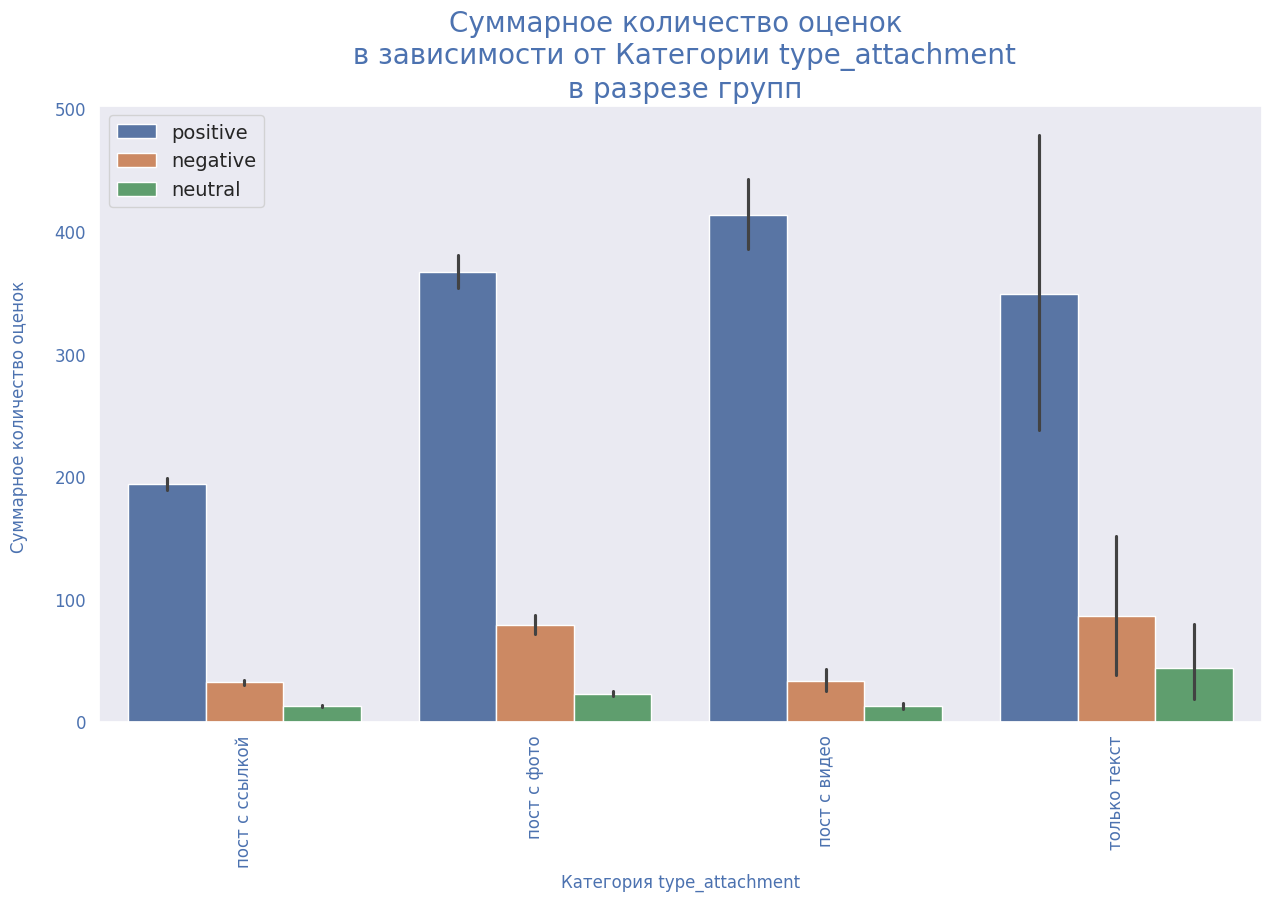

In [119]:
reaction_select(df_100, 'type_attachment', 'cnt_emodzi')

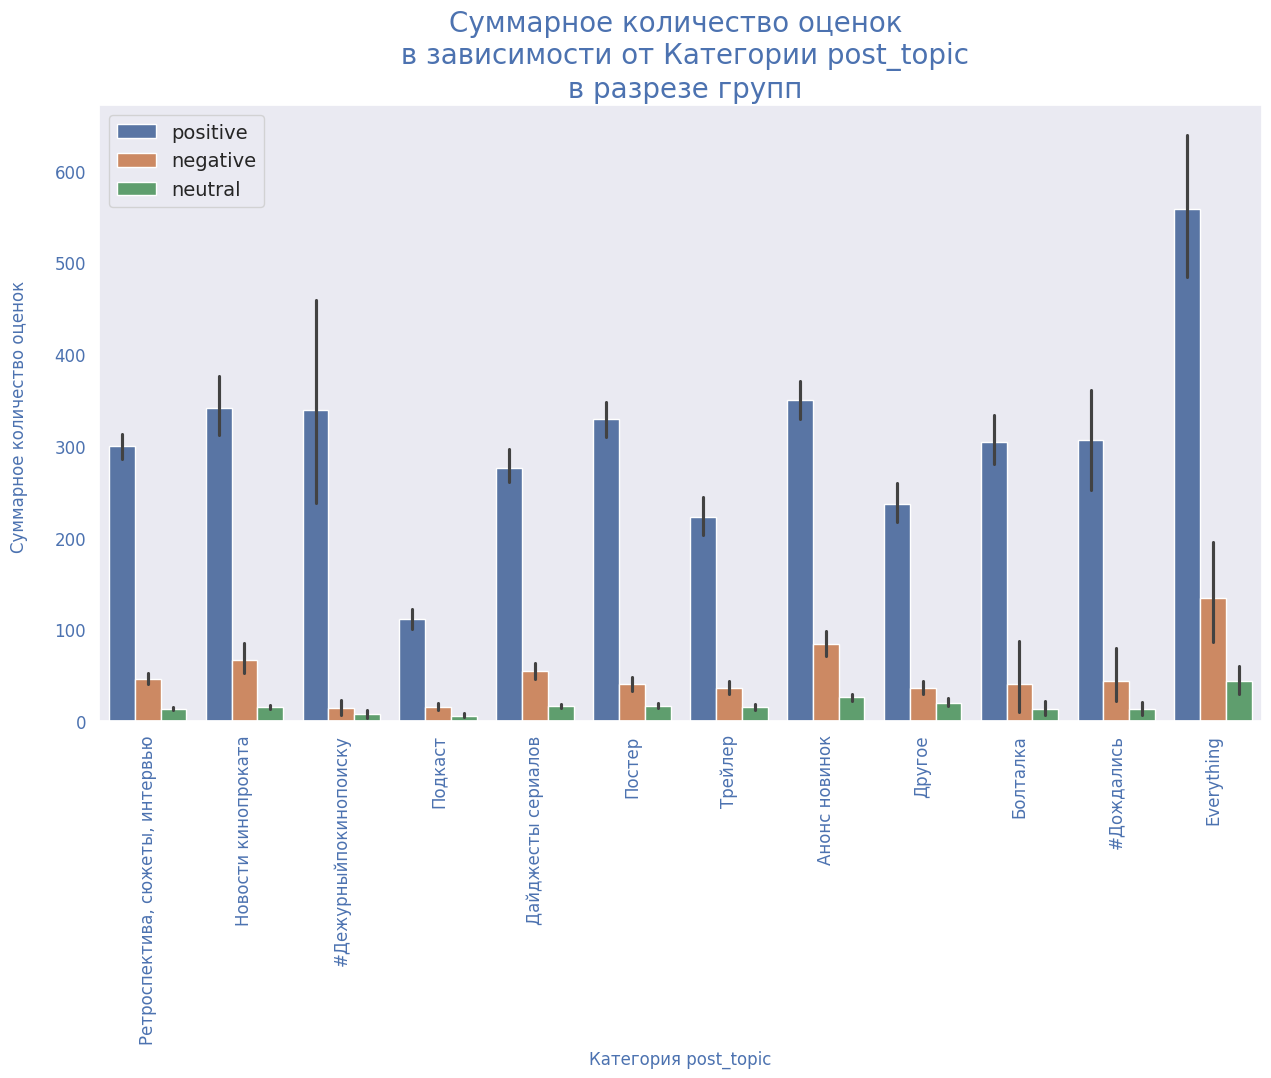

In [120]:
reaction_select(df_100, 'post_topic', 'cnt_emodzi')

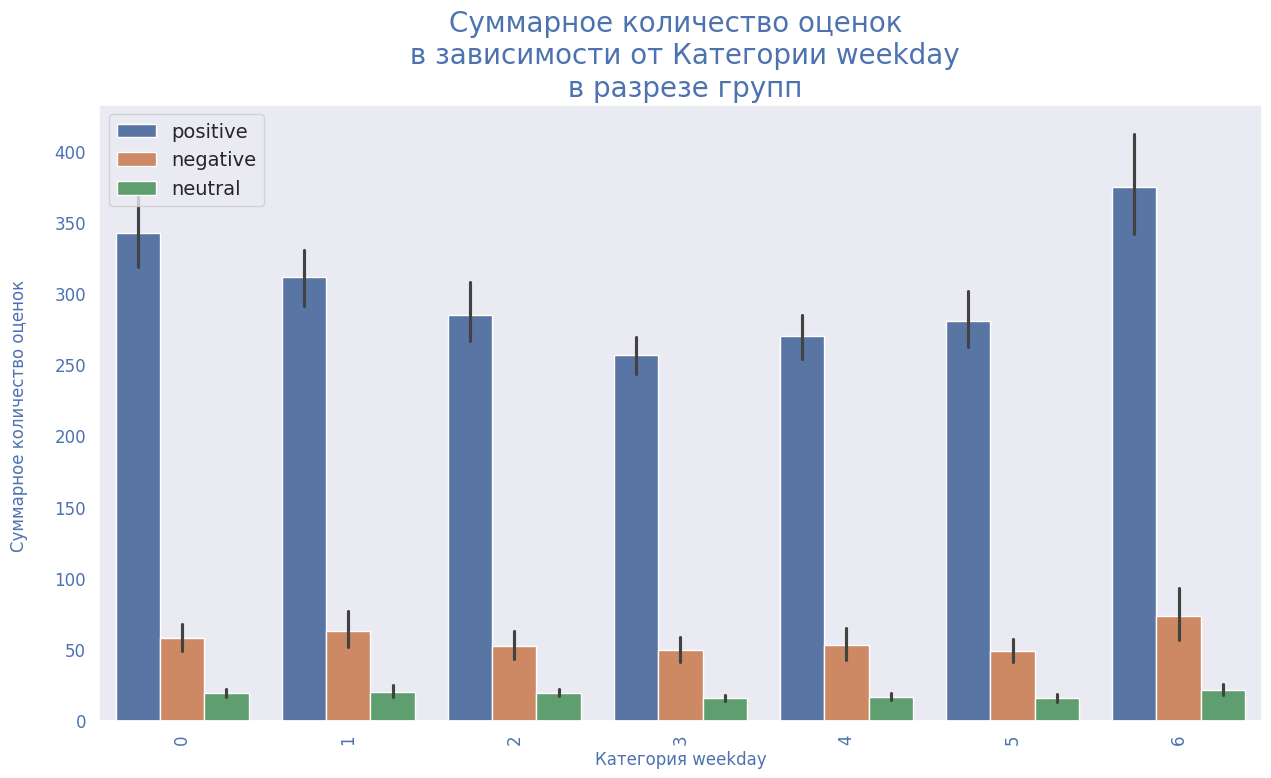

In [121]:
reaction_select(df_100, 'weekday', 'cnt_emodzi')

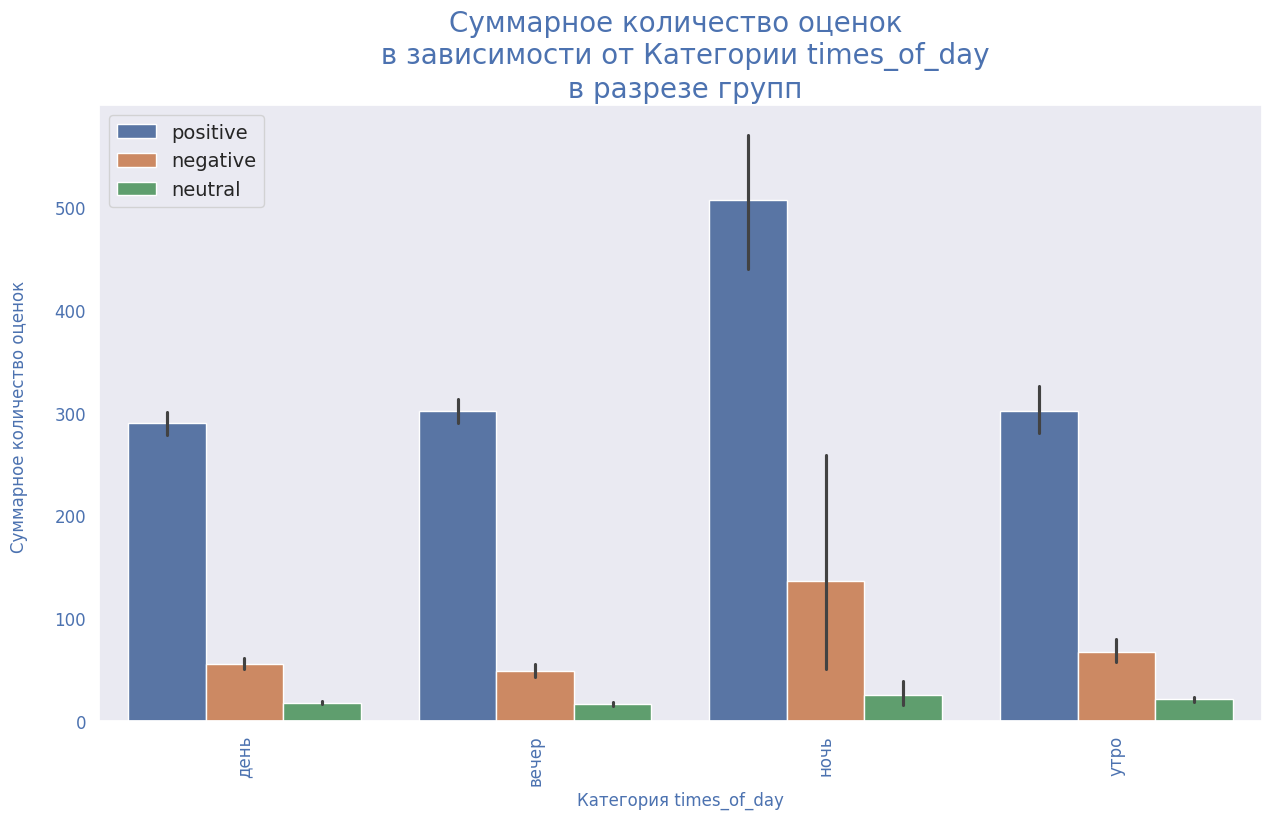

In [122]:
reaction_select(df_100, 'times_of_day', 'cnt_emodzi')

Обратим внимание, что рассматриваем мы здесь абсолютные показатели.

- Для зависимости от вида поста:
 - посты с видео имеют с своих ценках бОльшую долю положительных оценок над оценками отрицательными и нейтральными, нежели публикации с другими приложениями. А вот на последнем месте оказались восве не посты без приложений, а посты со ссылками.
- Для зависимости от темы публикации:
 - посты "Дежурный по кинопоиску" имеют с своих ценках бОльшую долю положительных оценок над оценками отрицательными и нейтральными, нежели публикации с другими приложениями
- Такую же зависимость отметим для публикаций , выпущенных в воскресенье
- И для публикаций, выпущенных в ночное время.

# 5 Дополнительный анализ всего массива постов

In [123]:
# зададим стиль визуализации для данного блока
plt.style.use('bmh')

In [124]:
# загрузим в датафрейм весь набор данных
posts_file = pd.read_csv('data_source/kinopoisk_channel_posts_2023-01-21.csv')
#topics = pd.read_csv('/content/drive/MyDrive/Хакатон Кинопоиск/models/modeling_results_easy.csv')

In [125]:
posts_file.drop('Unnamed: 0', axis=1, inplace=True)

In [126]:
#posts['post_topic'] = posts['post_topic'].replace('Everithing', 'Everything')

In [127]:
#posts.loc[posts['text'].str.contains('постер', case=False), 'post_topic'] = "Постер"

## 5.1 Добавление индекса эмоджи

### 5.1.1 Добавление оценки реакций пользователей (emoji в виде реакций)

Ниже представлен иной метод обработки данных о реакции пользователей

In [128]:
# сформируем отдельный датасет
emojis = posts_file[['id', 'reactions']].copy(deep=True)

In [129]:
def extract_emojis(row):
    '''
    Функция принимает на вход строку и преобразует строку с помощью регулярного выражения в
    список кортежей, которые содержат пару (emoji, count)
    '''

    # преобразуем объект в строку
    row_str = str(row)
    # все совпадения с регулярным выражением
    matches = re.findall(r"'emoticon': '(.*?)'}, 'count': (\d+)", row_str) # тут кортежи
    '''
    # можно использовать словарь, но далее метод explode работает некорректно
    # преобразуем совпадения в словарь
    emoticon_counts = {}
    # по каждому элементу кортежа
    for emoticon, count in matches:
        emoticon_counts[emoticon] = int(count) # сформируем пару ключ-значение
    return emoticon_counts
    '''
    return matches

In [130]:
# применим функцию
emojis['emoji'] = emojis['reactions'].apply(extract_emojis)
# удалим столбец с реакциями
emojis.drop('reactions', axis=1, inplace=True)

Далее с помощью метода pandas.explode развернем (разгруппируем, unpivot)датафрейм по столбцу emojis, таким образом, что каждому id будет соотвествовать каждый кортеж из списка

In [131]:
# развернем emojis в новый датафрейм
exploded_emojis = emojis.explode('emoji')
# создадим 2 новых столбца со значениями из каждого кортежа
exploded_emojis[['emoji_clean', 'cnt']] = exploded_emojis['emoji'].apply(lambda x: pd.Series(x))
exploded_emojis.drop('emoji', axis=1, inplace=True)
exploded_emojis = exploded_emojis.rename(columns={'emoji_clean':'emoji'})
exploded_emojis = exploded_emojis.fillna(0)
exploded_emojis

id     emoji cnt
0      37125         ❤  41
0      37125         👍   8
0      37125         🐳   4
0      37125         👎   3
0      37125  ❤\u200d🔥   1
...      ...       ...  ..
23325      8         🌚   1
23325      8         💯   1
23325      8         🍌   1
23325      8         💋   1
23325      8         🗿   1

[72778 rows x 3 columns]

In [132]:
# уникальные емоджи
exploded_emojis['emoji'].unique()

array(['❤', '👍', '🐳', '👎', '❤\\u200d🔥', '💅', '🔥', '🤪', '🍌', '😱', '⚡', '🏆',
       '🍾', '🤝', '🦄', '🥰', '😁', '🤩', '🍓', '💋', '👀', '💯', '🤬', '😢', '💘',
       '💔', '👻', '👏', '🕊', '😈', '😍', '🌭', '😭', '🙏', '🎉', '🎃', '🤗', '🎄',
       '😎', '😘', '🤯', '👾', '🤣', '🗿', '🙈', '🌚', '🆒', '😴', '☃', 0, '🤔', '🥱',
       '😐', '🎅', '👌', '💩', '🤮', '🖕', '🤡', '🤨', '🥴'], dtype=object)

In [133]:
# составим списки эмоций
positive_roll = ['❤', '👍', '🐳', '❤\\u200d🔥', '🔥',  '⚡', '🏆',
                 '🍾', '🤝', '🦄', '🥰', '😁', '🤩', '🍓', '💋', '💯', '💘',
                 '👻', '👏', '🕊',  '😍', '🙏', '🎉', '🎃', '🤗',
                 '😎', '😘', '🤣', '🙈', '🆒', '👌']

negative_roll = ['👎', '🤬','😈','🤯','💩','🤮', '🖕','🥴', '🍌', '🌭', '😭', '😢', '🤡', '💔']

neutral_roll = [ None, '🤪', '😱', '👀', '🗿', '😴',  '🤔', '🥱',  '😐',  '🤨','👾', '💅', '🌚', '🎄', '☃', '🎅' ]

In [134]:
def categorize_emoji(total_income):
    '''
    Функция произмодит замену эмоджи на балл эмоджи:
    - позитиныве эмоджи - 1 балл
    - негативные эмоджи - (-1) балл
    - нейтральные эмоджи - 0.001 балла
    '''

    for positive in positive_roll:
        if total_income == positive:
            return 1

    for negative in negative_roll:
        #print ('estate = ', estate)
        if total_income == negative:
            return -1

    for neutral in neutral_roll:
        #print ('estate = ', estate)
        if total_income == neutral:
            return 0.001


In [135]:
# применим функцию
exploded_emojis['emoji_category'] = exploded_emojis['emoji'].apply(categorize_emoji)

Умножим балл каждого емоджи на колическто эмоджи и рассчитаем сумму баллов для каждого поста

In [136]:
# расчитаем  сумму баллов каждого эмоджи в каждом посте
exploded_emojis['emoji_sum'] = exploded_emojis['cnt'].astype(float) * exploded_emojis['emoji_category']

In [137]:
# агрегируем значения баллов - получили таблицу пост - сумма реакций в баллах
emoji_for_merge = exploded_emojis.groupby('id')['emoji_sum'].sum().reset_index()

Т.о. получили некую  оценку, по которой можно опеределить общую реакицию пользователей на пост.

1) Если значение больше 0 - под постом больше позитивных рекакций, чем негативных

2) Если значение меньше 0 - под постом больше негативных рекакций, чем позитивных

Отметим также, что реакции есть не под всеми постами, это связано с тем, что подобная функция (реакции ползователей) была внедрена не сразу. Возможность ставить реакции под постами появилась примерно в ноябре 2022 года

In [138]:
 posts = posts.merge(emoji_for_merge, on='id', how='left')

### 5.1.2 Дополнительные столбцы

- балл эмоциональной окраски комментариев:
  - каждый позитивный комментарий - 1 балл
  - каждый негативный комментарий - минус 1 балл
  - комментарий призыв - 0,1 балла
  - остальные комментарии по 0,001 баллу
- столбец с годом-месяцем

Преобразуем эмоциональный окрас комментарев в некий сводный столбец

In [139]:
posts['comm_tonality'] = posts['negative'] *(-1) + posts['neutral'] * 0.001 + posts['positive'] * 1 + posts['skip'] * 0.001 + posts['speech'] * 0.2

In [140]:
#posts.drop(['negative', 'neutral', 'positive', 'skip', 'speech'], axis=1, inplace=True)

Добавим столбец со значением год-месяц в формате ГГГГ-ММ-01

In [141]:
posts['date'] = pd.to_datetime(posts['date'])
# объединение столбцов с годом и месяцем
posts['year_month'] = pd.to_datetime(posts[['year', 'month']].assign(day=1))
# удаление части датафремени с временем
posts['year_month'] = posts['year_month'].dt.strftime('%Y-%m-%d')
#df_final['year_month'] = pd.to_datetime(df_final['year_month'] )

## 5.2 Зависимость основных параметров постов от их тем

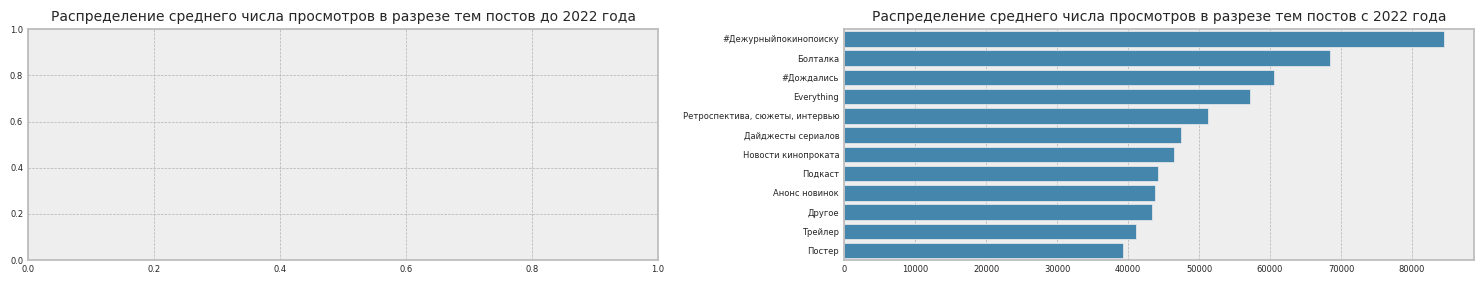

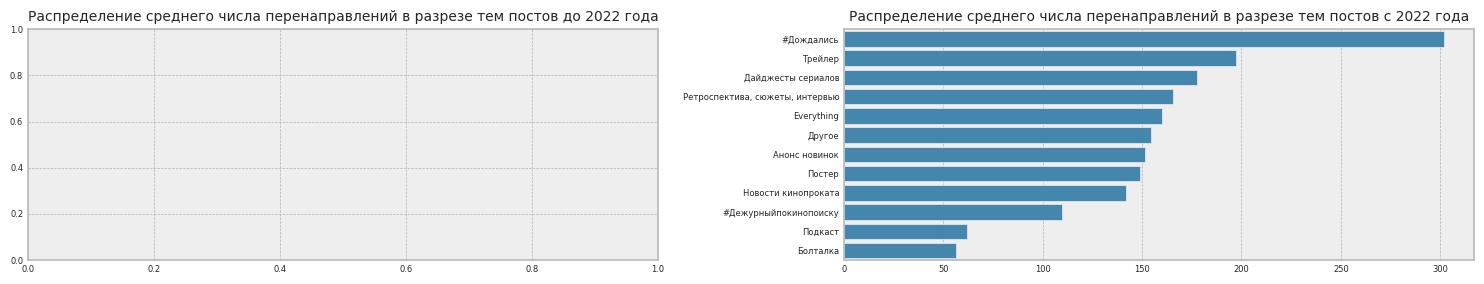

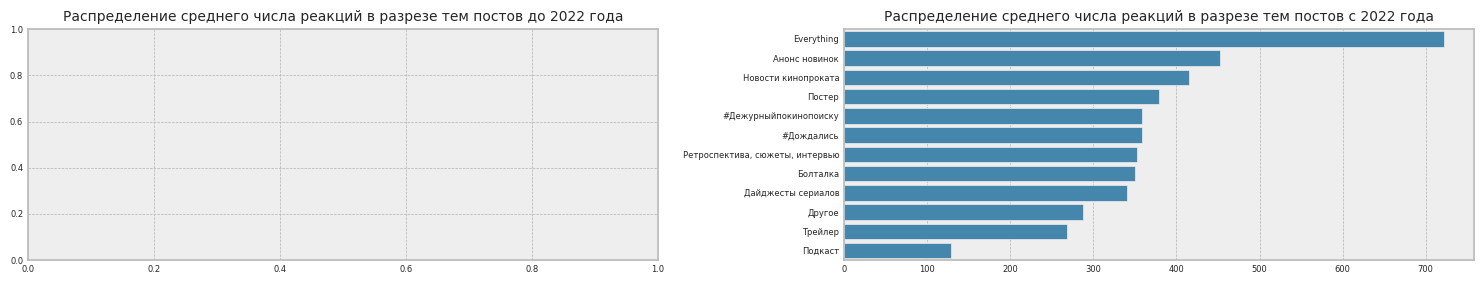

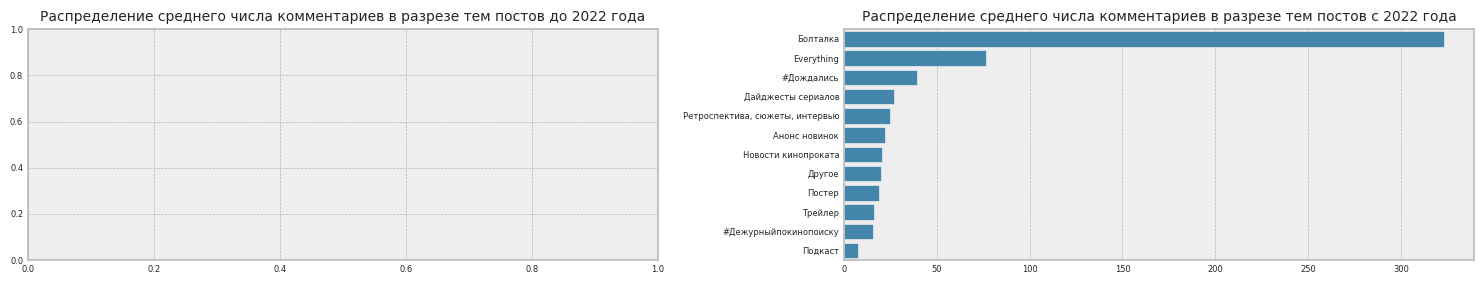

In [142]:
par = ['views', 'forwarded', 'reactions_count', 'comments']
par_title = ['просмотров', 'перенаправлений', 'реакций', 'комментариев']
for i, j in zip(par, par_title):
    plt.figure(figsize=(15,3))

    ax1 = plt.subplot(1,2,1)
    sns.barplot(posts.query('year < 2022').groupby('post_topic')[i].mean().reset_index().sort_values(by=i, ascending=False), x=i, y='post_topic')
    plt.title(f'Распределение среднего числа {j} в разрезе тем постов до 2022 года', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)

    ax2 = plt.subplot(1,2,2)
    sns.barplot(posts.query('year >= 2022').groupby('post_topic')[i].mean().reset_index().sort_values(by=i, ascending=False), x=i, y='post_topic')
    plt.title(f'Распределение среднего числа {j} в разрезе тем постов c 2022 года', fontsize=10)
    plt.xlabel('')
    plt.ylabel('')
    #ax2.axes.yaxis.set_visible(False)
    plt.xticks(fontsize=6)
    plt.yticks(fontsize=6)
    plt.tight_layout()
    plt.show()

Как видно из представленных диаграмм распределение значений общих метрик постов сильно изменились, как в количественном так и в качественном выражении - увеличилась среднее значение метрик, а также "структура" потребления контента.

Так, если до 2022 года средние просмотры постов составляли от 10 тыс. до 15 тыс.просмотров (в целом), то после 2022 года в среднем один пост просматривают от 40 тыс. до 80 тыс.пользователей. Конечно это связано с увеличением числа подписчиков канала.

Также изменилась популярность тем - до 2022 года лидерами по просмотрам были темы "Подкасты" и "Дождались", то после 2022 года - темы "Дежурный по кинопоиску", "Болталка", "Дождались", "Ретроспектива, сюжеты, интервью" с более 50 тыс .

С 2023 года примерно в 3 раза увеличилось кол-во перенаправлений постов с 50 до 150 и более, при этом топ-3 популярных по перенаправлению тем не изменился - "Дождались", "Трейлеры" и "Дайджесты сериалов". Т.е. пользователи охотно делятся контентом про новинки в виде простых постов.

Последние 2 распеределния реакций и комментариев для периоа до 2022 года не очень наглядны, т.к. в то время посты еще не набирали достаточной статистики(связано с появлением новых функциональных  в самом Телеграме). При этом  можно отметить, что в основном пользователи охотно реагируют на посты про новинки кино, а также посты, которые нельзя отнести ни к одной тематической рубрике, в данном случае это тема "Everything", содержащая в себе посты на любую тематику, в т.ч. мемы, призывы к обсуждению картинок, подравления с праздниками и пр. сообщениями на отвлеченные темы.

Очевидно, что тематическая рубрика "Болталка" набрала наибольшее кол-во комментариев по сравнению с другими темами - в среднем почти в 6 раз больше комментариев

### 5.2.1 Вовлеченность и CCI

На диаграмма ниже представлена зависимость индексов вовлеченности и цитируемости от темы поста.

Как и следовало ожидать, наибольшая вовлеченность пользователей характерна для постов по теме "Болталка" - посты с явным призывом что-то обусдить в комментариях. Остальные темы имеют гораздо меньший индекс вовлеченности

Что касается цитируемости, то лидерами являются посты на тему: **Дождались, дайджесты, трейлеры и постеры**

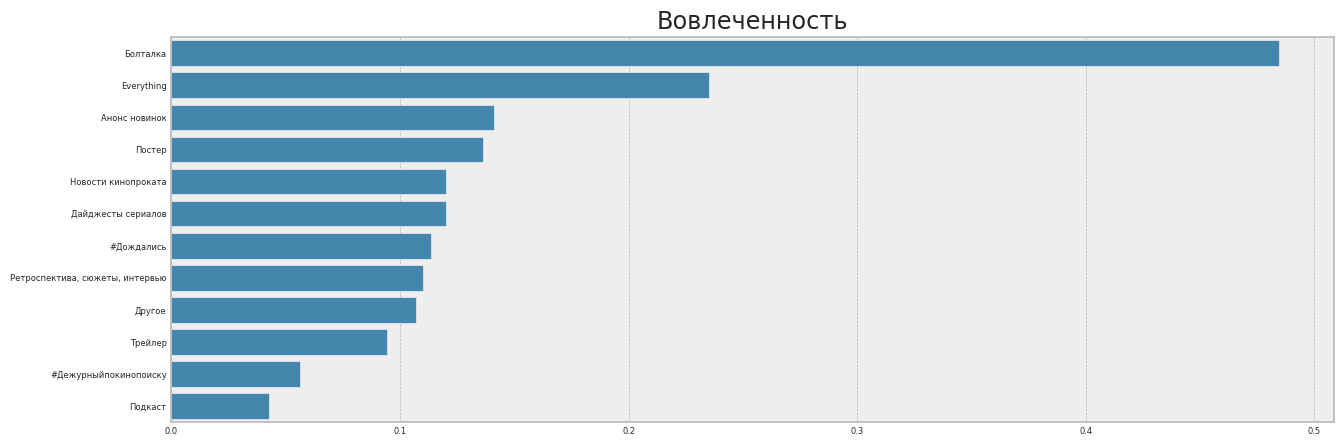

In [143]:
plt.figure(figsize=(15,5))
sns.barplot(posts.groupby(['post_topic'])['engagement_rate'].mean().reset_index().sort_values(by='engagement_rate', ascending=False),
            y='post_topic', x='engagement_rate')
plt.title('Вовлеченность')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

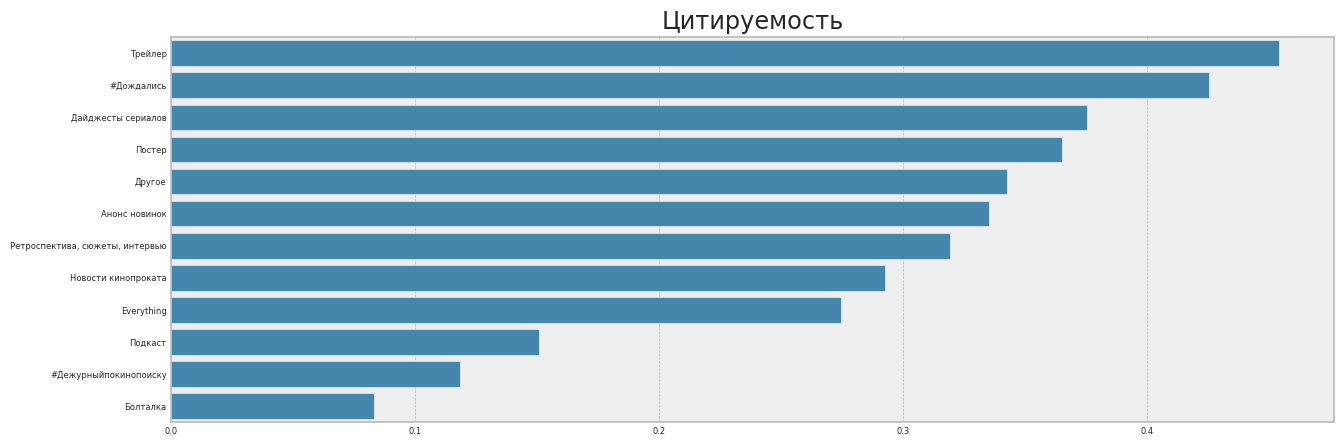

In [144]:
plt.figure(figsize=(15,5))
sns.barplot(posts.groupby(['post_topic'])['cci'].mean().reset_index().sort_values(by='cci', ascending=False),
            y='post_topic', x='cci')
plt.title('Цитируемость')
plt.xlabel('')
plt.ylabel('')
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
plt.show()

## 5.3 Тональность комментариев в зависимости от времени выхода постов

Циклом построим графики среднего коэффициента тональности под постами и среднего числа комментариев в разрезе временных промежутков.

Учтем, что первые комменатрии появились в канале после 1 августа 2022 года

Годы


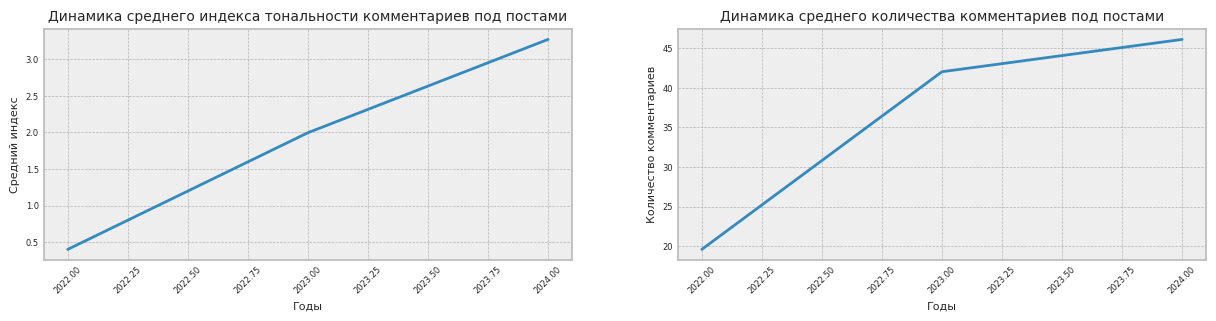

Годы-месяцы


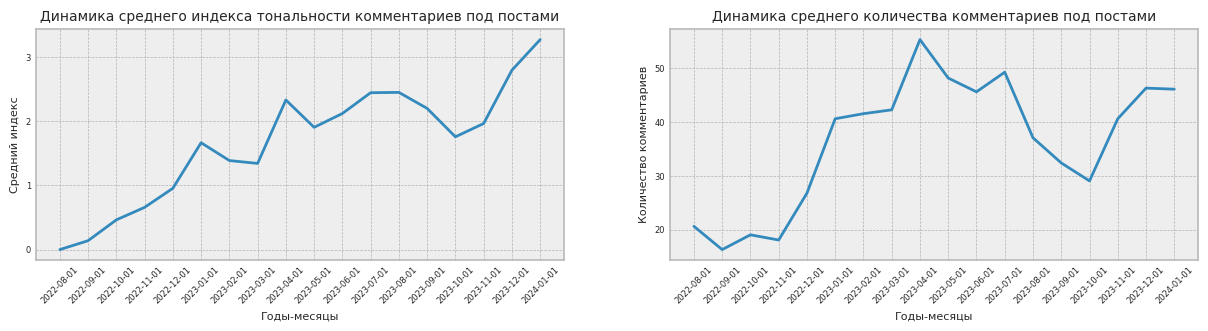

Дни недели


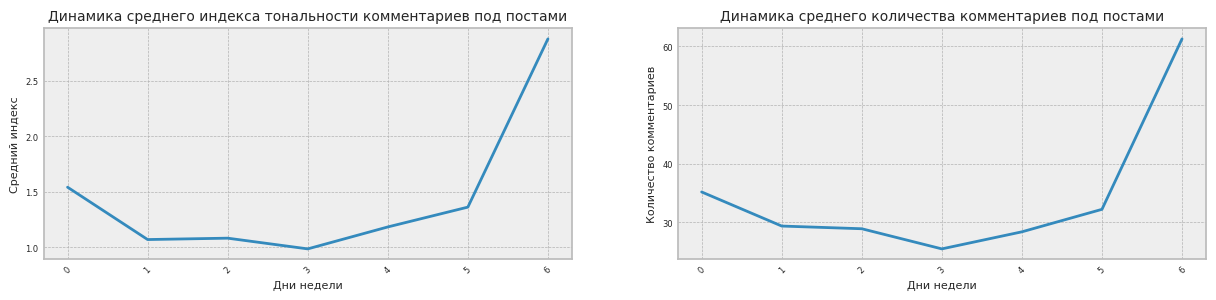

Часы дня


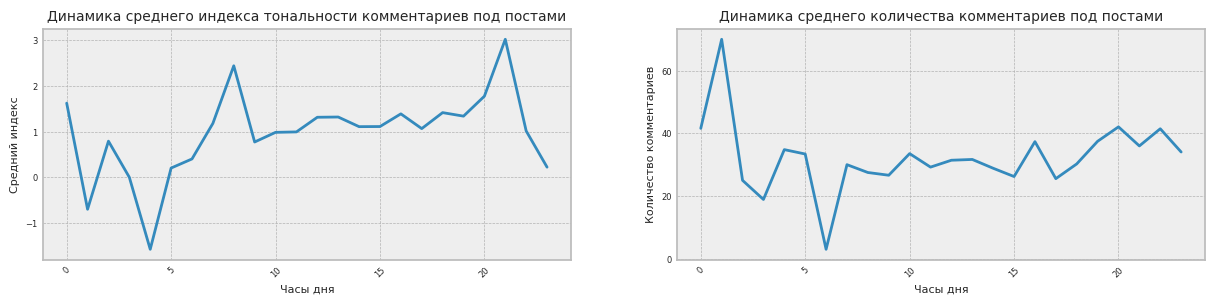

In [145]:
for i,j in zip(['year', 'year_month', 'weekday', 'hour'], ['Годы', 'Годы-месяцы', 'Дни недели', 'Часы дня']):
    print(f'{j}')
    plt.figure(figsize=(15,3))
    ax1 = plt.subplot(1,2,1)
    sns.lineplot(posts.query('year_month >= "2022-08-01"').groupby(i)['comm_tonality'].mean().reset_index(), x=i, y='comm_tonality')
    plt.title('Динамика среднего индекса тональности комментариев под постами', fontsize=10)
    plt.xlabel(f'{j}', fontsize=8)
    plt.xticks(rotation=45, fontsize=6)
    plt.ylabel('Средний индекс', fontsize=8)
    plt.yticks(fontsize=6)

    ax2 = plt.subplot(1,2,2)
    sns.lineplot(posts.query('year_month >= "2022-08-01"').groupby(i)['comments'].mean().reset_index(), x=i, y='comments')
    plt.title('Динамика среднего количества комментариев под постами', fontsize=10)
    plt.xlabel(f'{j}', fontsize=8)
    plt.xticks(rotation=45, fontsize=6)
    plt.ylabel('Количество комментариев', fontsize=8)
    plt.yticks(fontsize=6)

    #plt.legend(fontsize=6, loc='best')
    plt.show()

Т.о.:
- в течении года средний индекс тональность комментариев расте. Чем выше индекс - тем позитивнее комментарии (больше число этих комментариев)
- наиболее позитивные комментарии в своей массе - к постам, выходящих в воскресенье. С другой стороны у постов, опубликованных в  воскресенье в среднем больше комментариев, чем у постов, вышедших среди недели. У пользователей есть больше свободного времени. Или посты интереснее
- наибольшее число негативных комментариев  оставлены под постами, которые опубликованы в 4 часа утра. Такие посты в среднем содержат больше негативных комментариев, что влияет на общий индекс тональности комментариев, который принимает отрицательные значения (в т.ч. касается постов, опубликованных в 1 ночи и 3 утра). Тажке тональность комментариев резко падает для постов опубликованных в 8 утра и 9 вечера.


In [146]:
#posts.groupby('post_topic')['id'].count().reset_index().sort_values(by='id', ascending=False)

posts.query('year_month >= "2022-08-01"').pivot_table(index='post_topic',
                                                     columns='year',
                                                     values='comm_tonality',
                                                     aggfunc='mean').reset_index().sort_values(by=2023, ascending=False).style.background_gradient(cmap='PuBu')

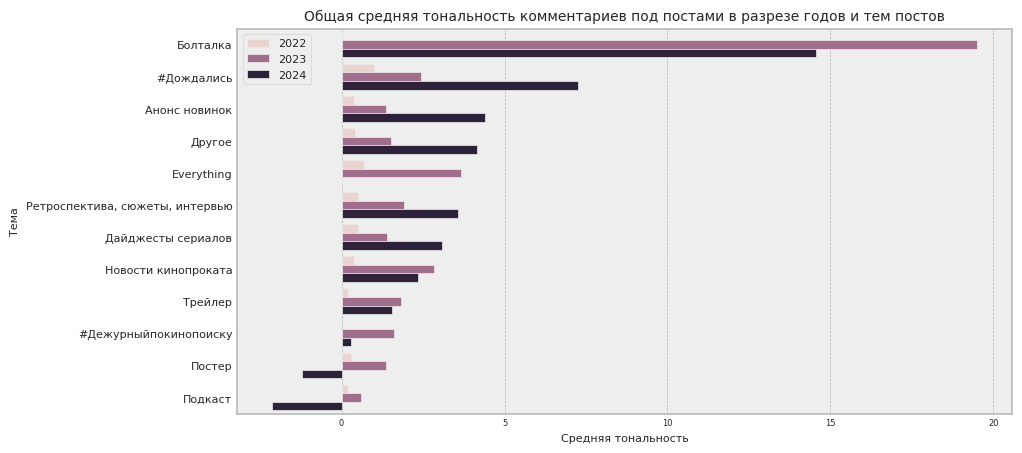

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(posts.query('year_month >= "2022-08-01"').pivot_table(index=['post_topic', 'year'],
                                                                  values='comm_tonality',
                                                                  aggfunc='mean').reset_index().sort_values(by='comm_tonality', ascending=False),
            x='comm_tonality', y='post_topic', hue='year')
plt.title('Общая средняя тональность комментариев под постами в разрезе годов и тем постов', fontsize=10)
plt.xlabel('Средняя тональность', fontsize=8)
plt.ylabel('Тема', fontsize=8)
plt.xticks(fontsize=6)
plt.yticks(fontsize=8)
plt.legend(fontsize=8)
plt.show()

 В 2023 году наиболее высокая тональность у комментариев под постами в следующих тематических рубриках: **"Болталка", "Everything", "Новости кинопроката", "Дождались"**

 А в 2024 году **"Болталка", "Дождались", "Другое", "Анонс новинок", "Сюжеты, Интервью"**.

 Как видно из данного расперделения в 2024 году за первые месяцы года тональность комментариев у постов из тематической рубрики "Подкаст" - отрицательная, что свидетельствует о бОльшем кол-ве негативных комменатриев

## 5.4 Реакции в виде эмоджи

Рассмотрим динамику изменения индекса реакций пользователй в некоторых разрезах

Например, как влияет сложность текста на реакции пользователей

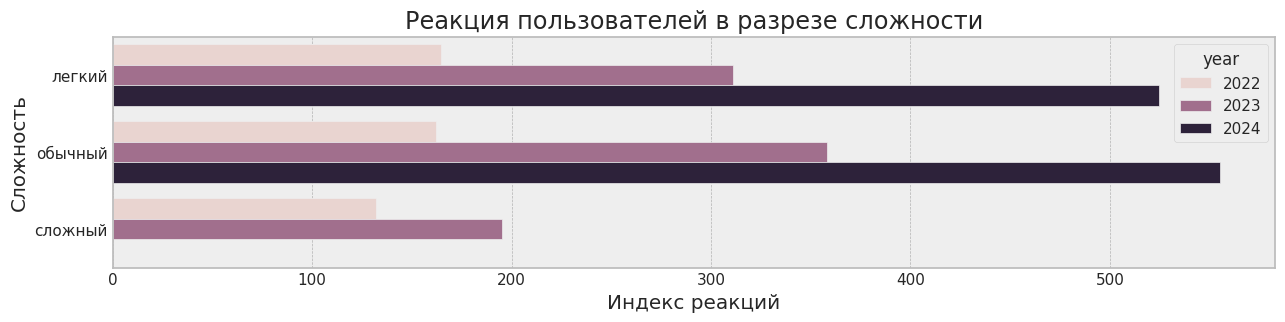

In [148]:
plt.figure(figsize=(15, 3))
sns.barplot(posts.query('year_month >= "2021-10-01"').groupby(['year', 'complexity'])['emoji_sum'].mean().reset_index(), x='emoji_sum', y='complexity', hue='year')
plt.title('Реакция пользователей в разрезе сложности')
plt.xlabel('Индекс реакций')
plt.ylabel('Сложность')
plt.show()

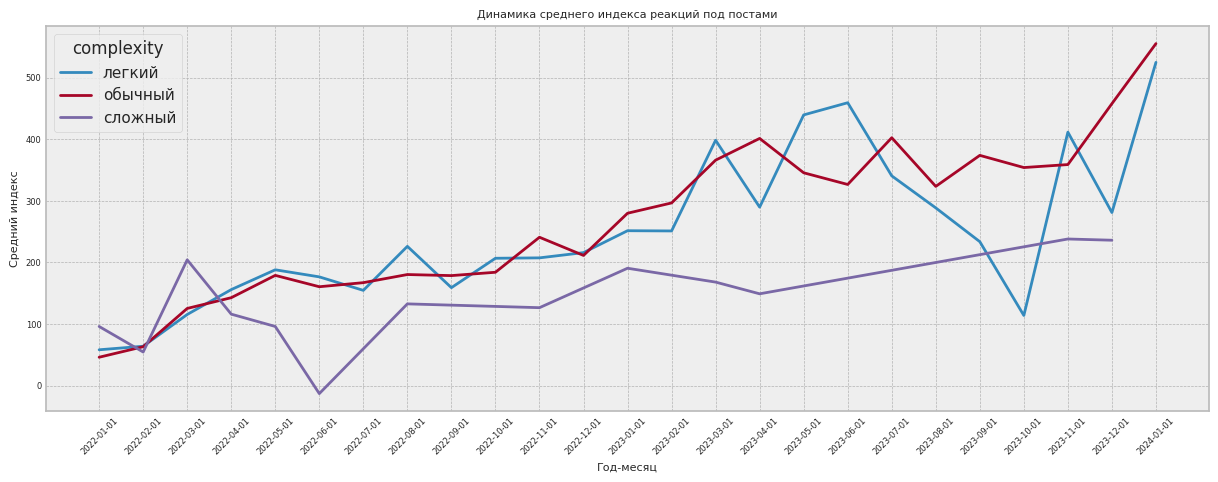

In [149]:
plt.figure(figsize=(15,5))

#ax1 = plt.subplot(1,2,1)
sns.lineplot(posts.query('year_month >= "2021-10-01"').groupby(['year_month', 'complexity'])['emoji_sum'].mean().reset_index(), x='year_month', y='emoji_sum', hue='complexity')
plt.title('Динамика среднего индекса реакций под постами', fontsize=8)
plt.xlabel('Год-месяц', fontsize=8)
plt.xticks(rotation=45, fontsize=6)
plt.ylabel('Средний индекс', fontsize=8)
plt.yticks(fontsize=6)

#ax2 = plt.subplot(1,2,2)
#sns.lineplot(posts.query('year_month >= "2022-08-01"').groupby('year_month')['comments'].sum().reset_index(), x='year_month', y='comments')
#plt.title('Динамика общего количества комментариев под постами', fontsize=8)
#plt.xlabel('Год-месяц', fontsize=8)
#plt.xticks(rotation=45, fontsize=6)
#plt.ylabel('Количество комментариев', fontsize=8)
#plt.yticks(fontsize=6)

#plt.legend(fontsize=6, loc='best')
plt.show()

Как видно из данных рапределений, эмоциональная реакция под постами имеет тренд на повышение не зависиимо от сложности текста. В целом чем проще текс, тем выше его "реакционная" оценка положительными эмоциями.

С июня по октябрь индекс эмоций под "легкими по сложности" постами начал падать, но к концу года вернулся на свои прежние значения

Посмотрим на средний индекс реакций

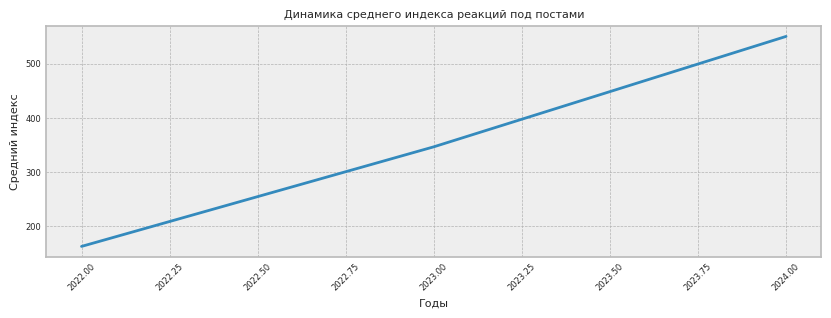

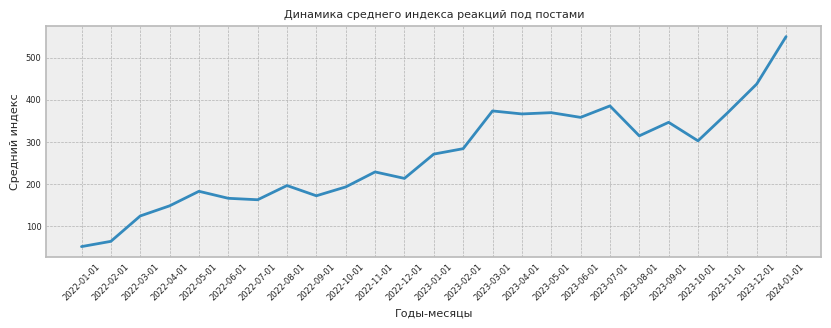

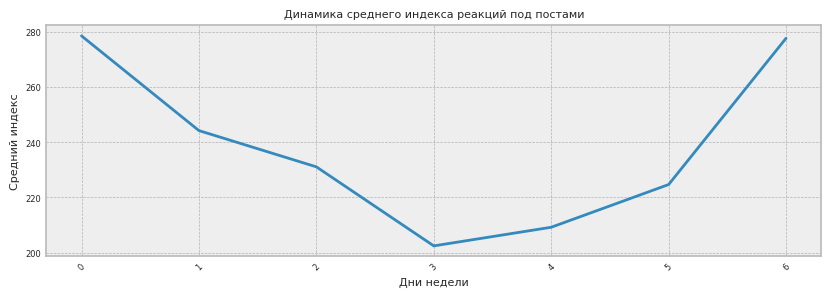

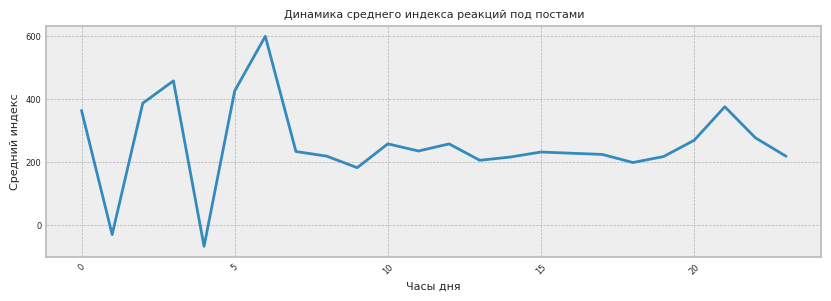

In [150]:
for i,j in zip(['year', 'year_month', 'weekday', 'hour'], ['Годы', 'Годы-месяцы', 'Дни недели', 'Часы дня']):
    plt.figure(figsize=(10,3))
    sns.lineplot(posts.query('year_month >= "2021-10-01"').groupby(i)['emoji_sum'].mean().reset_index(), x=i, y='emoji_sum')
    plt.title('Динамика среднего индекса реакций под постами', fontsize=8)
    plt.xlabel(f'{j}', fontsize=8)
    plt.xticks(rotation=45, fontsize=6)
    plt.ylabel('Средний индекс', fontsize=8)
    plt.yticks(fontsize=6)

Как было показано выше на примере тональности, в середине недели индекс эмоций под постами заметно ниже, чем у постов, которые выходят в конце и начале недели.

Также эмоциональная реакция на посты, которые выходят ночью (в час ночи и 4 часа утра) значительно ниже утренних постов (принимает отрицательные значения).

Посты, опубликованные рано утром, вызывают больше всего положительных эмоций (кол-во положительных реакций больше негативных реакций на 400+). В течении остального дня  в среднем положительных эмоций больше на 200-300


Посмторим на эмоциональный окрас в разверезе тем постов

In [151]:
posts.query('year >=2022').pivot_table(index='post_topic',
                                       columns='year',
                                       values='emoji_sum',
                                       aggfunc='mean').reset_index().sort_values(by=2023, ascending=False).style.background_gradient(cmap='PuBu')

Есть существенные различия в эфмоционльном окрасе постов в зависимости от темы. Так в 2023 году наиболеее положительно воспинимаемыми темами были: **Новости кинопроката, Анонсы киноновинок, Дежурный по кинопоиску, Everythingm, Постер**

А за первый месяц 2024 года есть изменения. Самыми положительно оцененными темами постов стали: **Трейлер, Новости кинопроката, Анонсы новинок и Постер**

<a id="7"></a>
## 6 Саммари

### Использование более простых слов может увеличить число комментариев, реакций   и коэффициент вовлеченности
Необходимо перед публикацией проверять текст на сложность, учитывая данные аналитики: наилучшая средняя длина слова для цитируемости - от 3 до 6  символов. Один знак препинания приходится на не более, чем на 30 слов

Построим гистограммы распределение частоты величины средней длины слова  и количества слов, приходящихся на один знак препинания

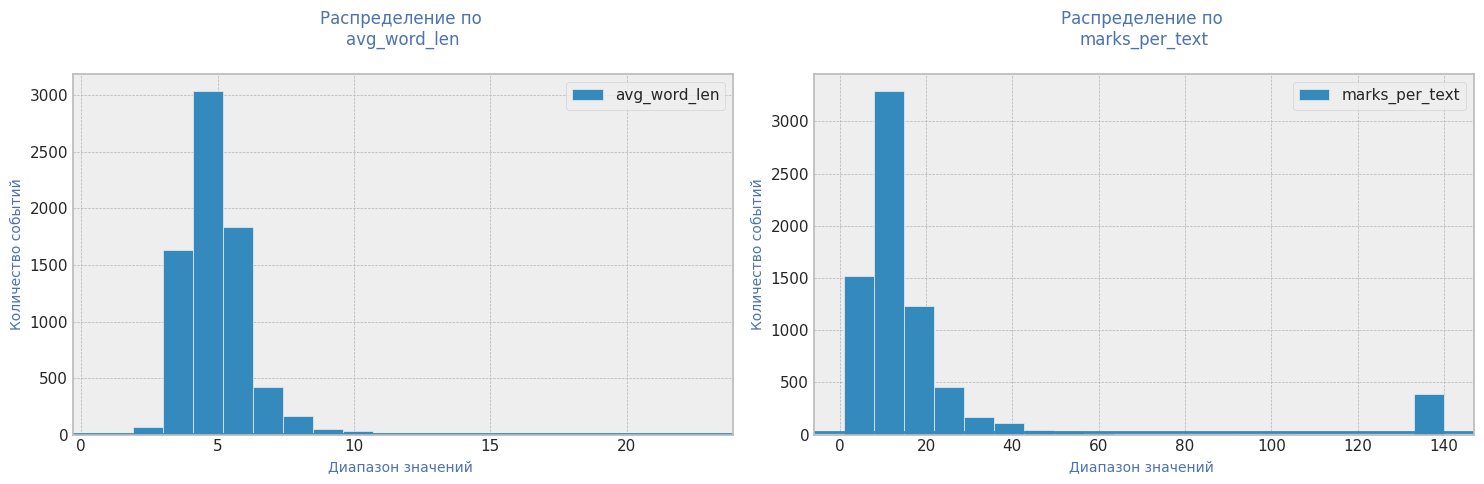

In [152]:
drow_hist_twice('avg_word_len', 'marks_per_text')

Наиболее часто используемая длина слов - от 3 до 11 букв.

Округлим число букв в словах до целого в большую сторону

In [153]:
for i in tqdm(range(posts.shape[0])):
    posts.loc[(posts.index == i), 'avg_word_len'] \
    = math.ceil(posts.loc[(posts.index == i), 'avg_word_len'])

100%|██████████| 7267/7267 [00:04<00:00, 1469.62it/s]


Подправим под задачу созданную ранее функцию

In [154]:
# строим график, отражающий количество событий в зависимости от времени
# для сглаживания шумов применим скользящее среднее
def event_in_time_plot_10(data_name, eventname, time_interval):
    t1 = data_name.groupby(time_interval).agg({eventname:'mean'}).sort_values(time_interval)

    ax1 = t1.rolling(1).mean().plot(grid=True
        , figsize=(25,10)
        ,  color='g'
        , linewidth= 5
         )

    plt.title('Показатель {} \nв зависимости от длины слова {}\n'.format(eventname, time_interval), fontsize=28, color = "b")
    plt.legend(fontsize=18, bbox_to_anchor=(0.5, 1))
    plt.xticks(rotation=0, fontsize=20, color = "b")
    plt.yticks(rotation=0, fontsize=20, color = "b")
    plt.xlabel(f'{time_interval}', fontsize=20, color = "b")
    plt.ylabel(f"Коэф.вовлеченности {eventname}", fontsize=20, color = "b")
    #plt.show()
    return

Построим график зависимости коэффициента вовлеченности от средней длины слова в публикации

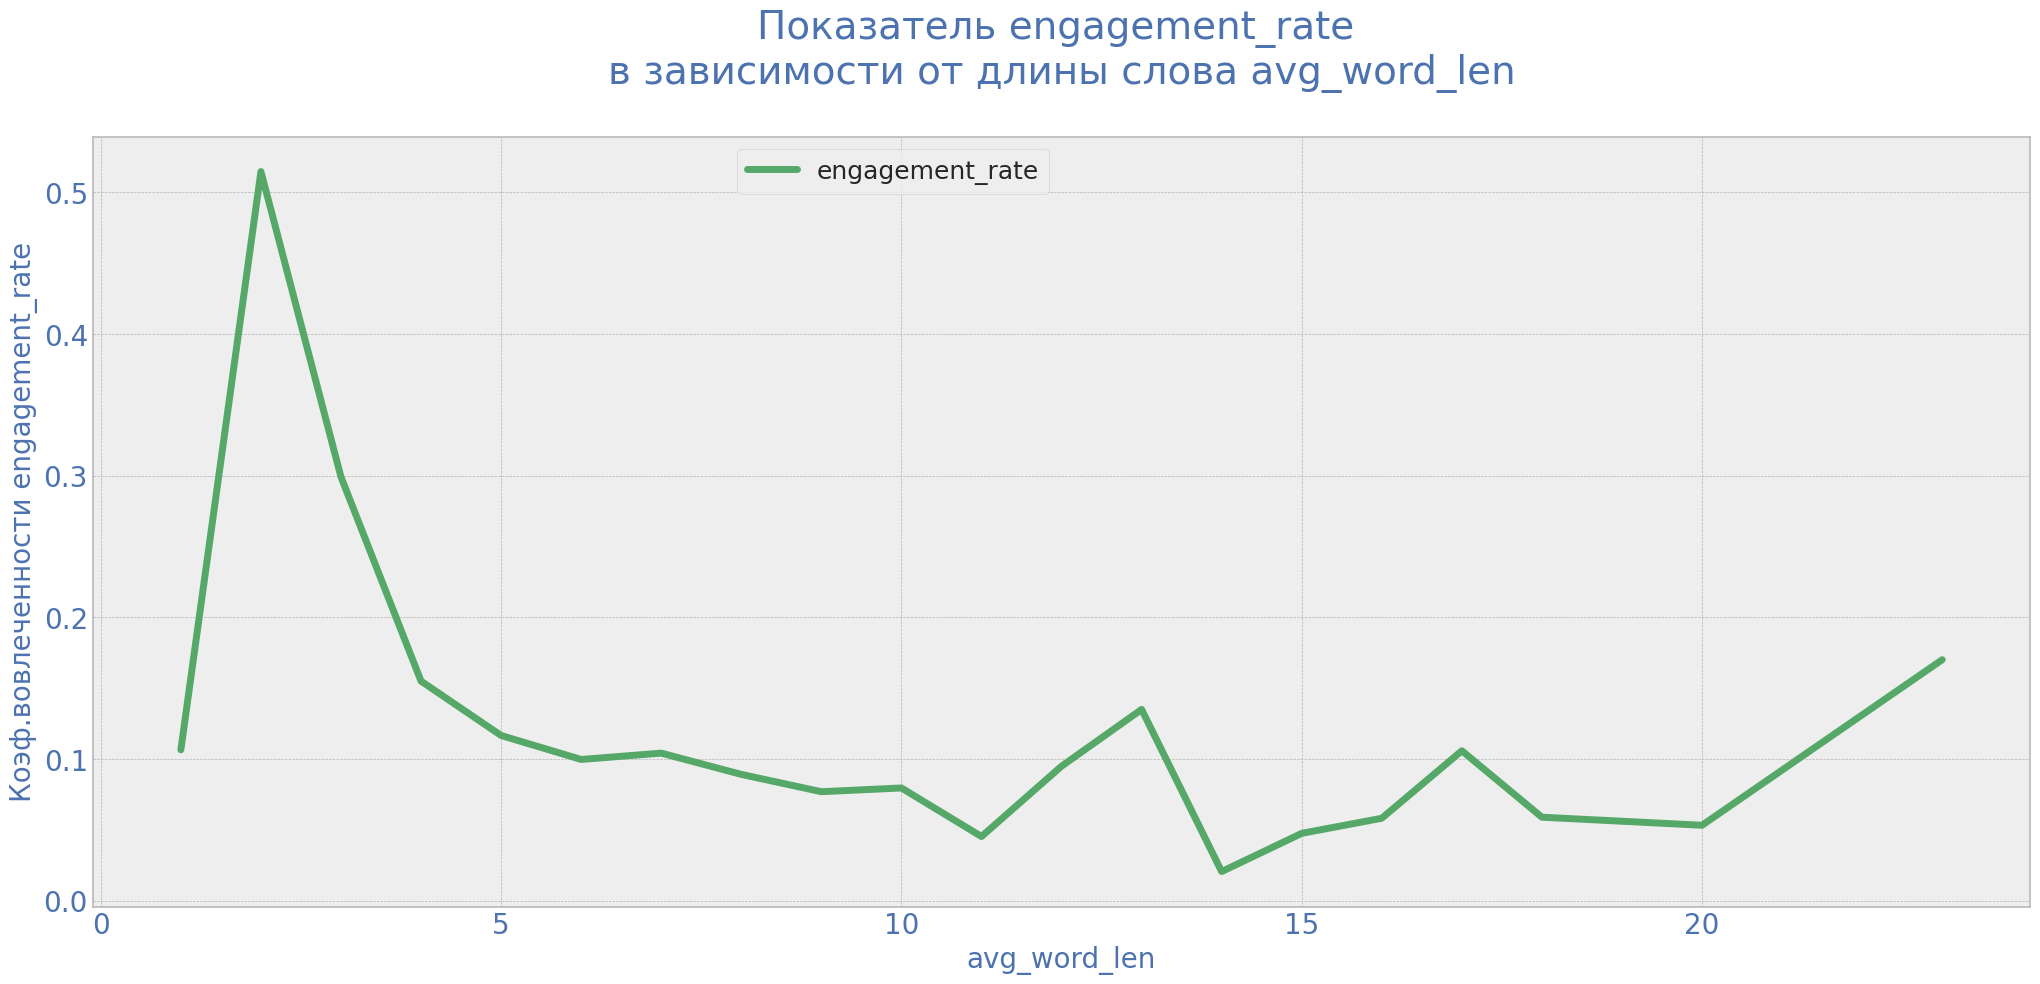

In [155]:
event_in_time_plot_10(posts, 'engagement_rate', 'avg_word_len')

In [156]:
posts.loc[(posts['avg_word_len'] <= 6) & (posts['avg_word_len'] >= 3)
                      , 'engagement_rate'].median()

0.0952

In [157]:
posts.loc[(posts['avg_word_len'] <= 20) & (posts['avg_word_len'] > 6)
                      , 'engagement_rate'].median()

0.0652

Коэффициент вовлеченности при длине слова от 3 до 6 букв составляет 9.5%.  
Коэффициент вовлеченности при длине слова от 5  до 20 букв и более составляет 6.5%. *Юольшая длина слова может быть связана со ссылками на сайты

Среднее количество букв менее 3 не рассматриваем, поскольку слова в этом случае могут быть выражены призывами, междометиями.

Мы не сможем полностью избавиться от длинных слов.  
И тем не менее, разница в длине приводит к росту популярности н 30%. Для сравнения - в канале Иннополиса такая разница составляет более 100% - популярность увеличивается вдвое.  Но это не означает, что если мы все-же перейдем только к коротким словам, популярность вырастет на 30%. Поскольку частота использования коротких слов уже сейчас больше, чем длинных.  
можно предположить, что сократив использование днинных слов на 10% мы увеличим популярность постов на 2%


Построим график зависимости коэффициента цитирования от средней длины слова в публикации

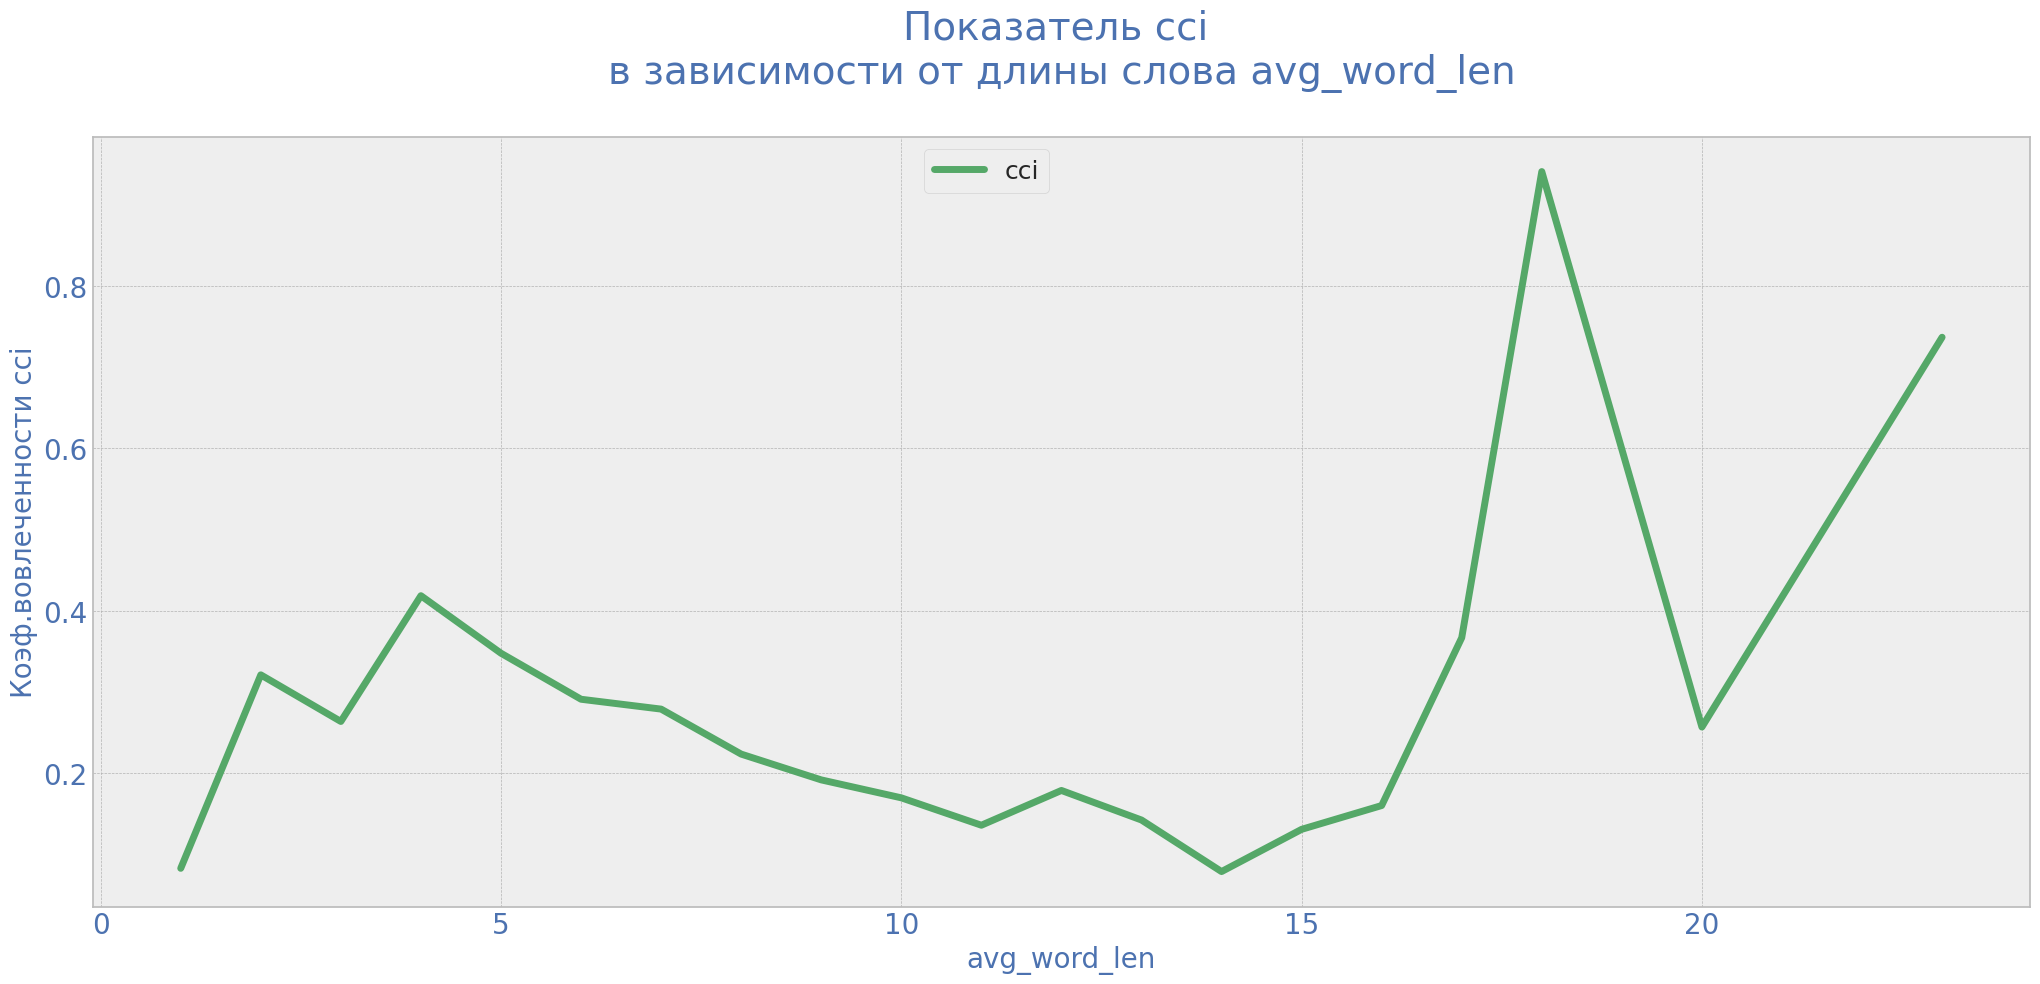

In [158]:
event_in_time_plot_10(posts, 'cci', 'avg_word_len')

In [159]:
posts.loc[(posts['avg_word_len'] <= 5) & (posts['avg_word_len'] >= 3)
                      , 'cci'].median()

0.278

In [160]:
posts.loc[(posts['avg_word_len'] <= 20) & (posts['avg_word_len'] > 5)
                      , 'cci'].median()

0.202

Выведем тексты со средней длиной слова более 10 символов и менее 10 символов

In [161]:
posts.query('avg_word_len > 10').text.to_list()[:10]

['Чем порадовать себя и близких, если вы обожаете кино? 🎬\n\nНа Яндекс Маркете стартовала [большая распродажа](https://nquw.adj.st/special/black-friday2023?adj_t=p57z0cs&adj_campaign=kinopoisk11.11&adj_adgroup=Telegram_main&adj_creative=&adj_fallback=https%3A%2F%2Fmarket.yandex.ru%2Fspecial%2Fblack-friday2023%3Futm_source%3DTelegram_main%26utm_medium%3Dsmm%26utm_campaign%3Dkinopoisk11.11%26utm_content%3D%26clid%3D1665&adj_redirect=https%3A%2F%2Fmarket.yandex.ru%2Fspecial%2Fblack-friday2023%3Futm_source%3DTelegram_main%26utm_medium%3Dsmm%26utm_campaign%3Dkinopoisk11.11%26utm_content%3D%26clid%3D1665&adj_redirect_macos=https%3A%2F%2Fmarket.yandex.ru%2Fspecial%2Fblack-friday2023%3Futm_source%3DTelegram_main%26utm_medium%3Dsmm%26utm_campaign%3Dkinopoisk11.11%26utm_content%3D%26clid%3D1665) 11.11,\xa0и мы НЕНАВЯЗЧИВО собрали лишь малую часть классных подарков, доступных на сервисе по приятным ценам.',
 'Результаты розыгрыша:\n\nПобедители:\n[1. ye](tg://user?id=751426711)\n[2. Daria](tg://u

In [162]:
posts.query('avg_word_len <= 10').text.to_list()[:10]

['Какими подростками были актеры из «Трудных подростков»? А что они помнят о своей первой любви?\n\nПоговорили с кастом сериала — Милой Ершовой, Святославом Рогожаном, Анастасией Красовской (@nastitasti) и Дашей Верещагиной. \n\n[Вспомнили](https://www.kinopoisk.ru/media/article/4008982/) самый яркий съемочный день, любимых героев и не только!\n\n🔥 Подписывайтесь на [**«Кинопоиск»**](https://t.me/kinopoisk)',
 'Фильм дня — [**«Дневник Бриджит Джонс»**](https://www.kinopoisk.ru/film/621/) (18+) 🎬\n\nБриджит Джонс — 32 года, она не замужем, переживает из-за лишнего веса и хочет избавиться от вредных привычек. Чтобы привести свои жизнь в порядок, Бриджит решает вести дневник. Теперь героине предстоит выбрать одного из двух мужчин, с которыми ее сводит жизнь: скромного Марка Дарси или ее босса, харизматичного Дэниэла Кливера. \n\nПолная юмора мелодрама Шэрон Магуайр стала современной версией классического романа Джейн Остин «Гордость и предубеждение». А Бриджит — настоящий иконой ромкомов!

Коэффициент цитируемости резко растет при длине слова от 14 символов. Вывод текстов на экран показывает, что так4ие посты соержат в себе ссылки на внешние ресурсы. И наоборот, при длине слова менее 10 символов такие ссылки более исключение, чем правило.

При длине слова до 5 букв коэффициент составляет 28%.  
А при длине слова от 5  букв и более - 20%.

Среднее количество букв менее 3 не рассматриваем, поскольку слова в этом случае могут быть выражены призывами, междометиями.

Мы не сможем полностью избавиться от длинных слов.  
И тем не менее, разница в длине приводит к росту цитируемости также на 30%. Поскольку частота использования коротких слов уже сейчас больше, чем длинных.  
можно предположить, что сократив использование днинных слов на 10% мы увеличим цитируемость постов на 2%


### Использование более простого текста, без причастных оборотов, расшифровок может увеличить число  коэффициент вовлеченности
Необходимо перед публикацией проверять текст на сложность, учитывая данные аналитики: наилучшее для популярности поста число слов, приходящихся на один знак препинания, составляет 20 и больше. *При учете ссылок на внешние ресурсы

Наиболее часто используемое количество слов на один знак препинаня - до 20 слов.

Округлим параметр до целого в большую сторону

In [163]:
for i in tqdm(range(posts.shape[0])):
    posts.loc[(posts.index == i), 'avg_word_len'] \
    = math.ceil(posts.loc[(posts.index == i), 'avg_word_len'])

100%|██████████| 7267/7267 [00:03<00:00, 1996.96it/s]


Подправим под задачу созданную ранее функцию

Построим график зависимости коэффициента цитируемости от количество слов, которые в каждой публикации приходится на один знак препинания

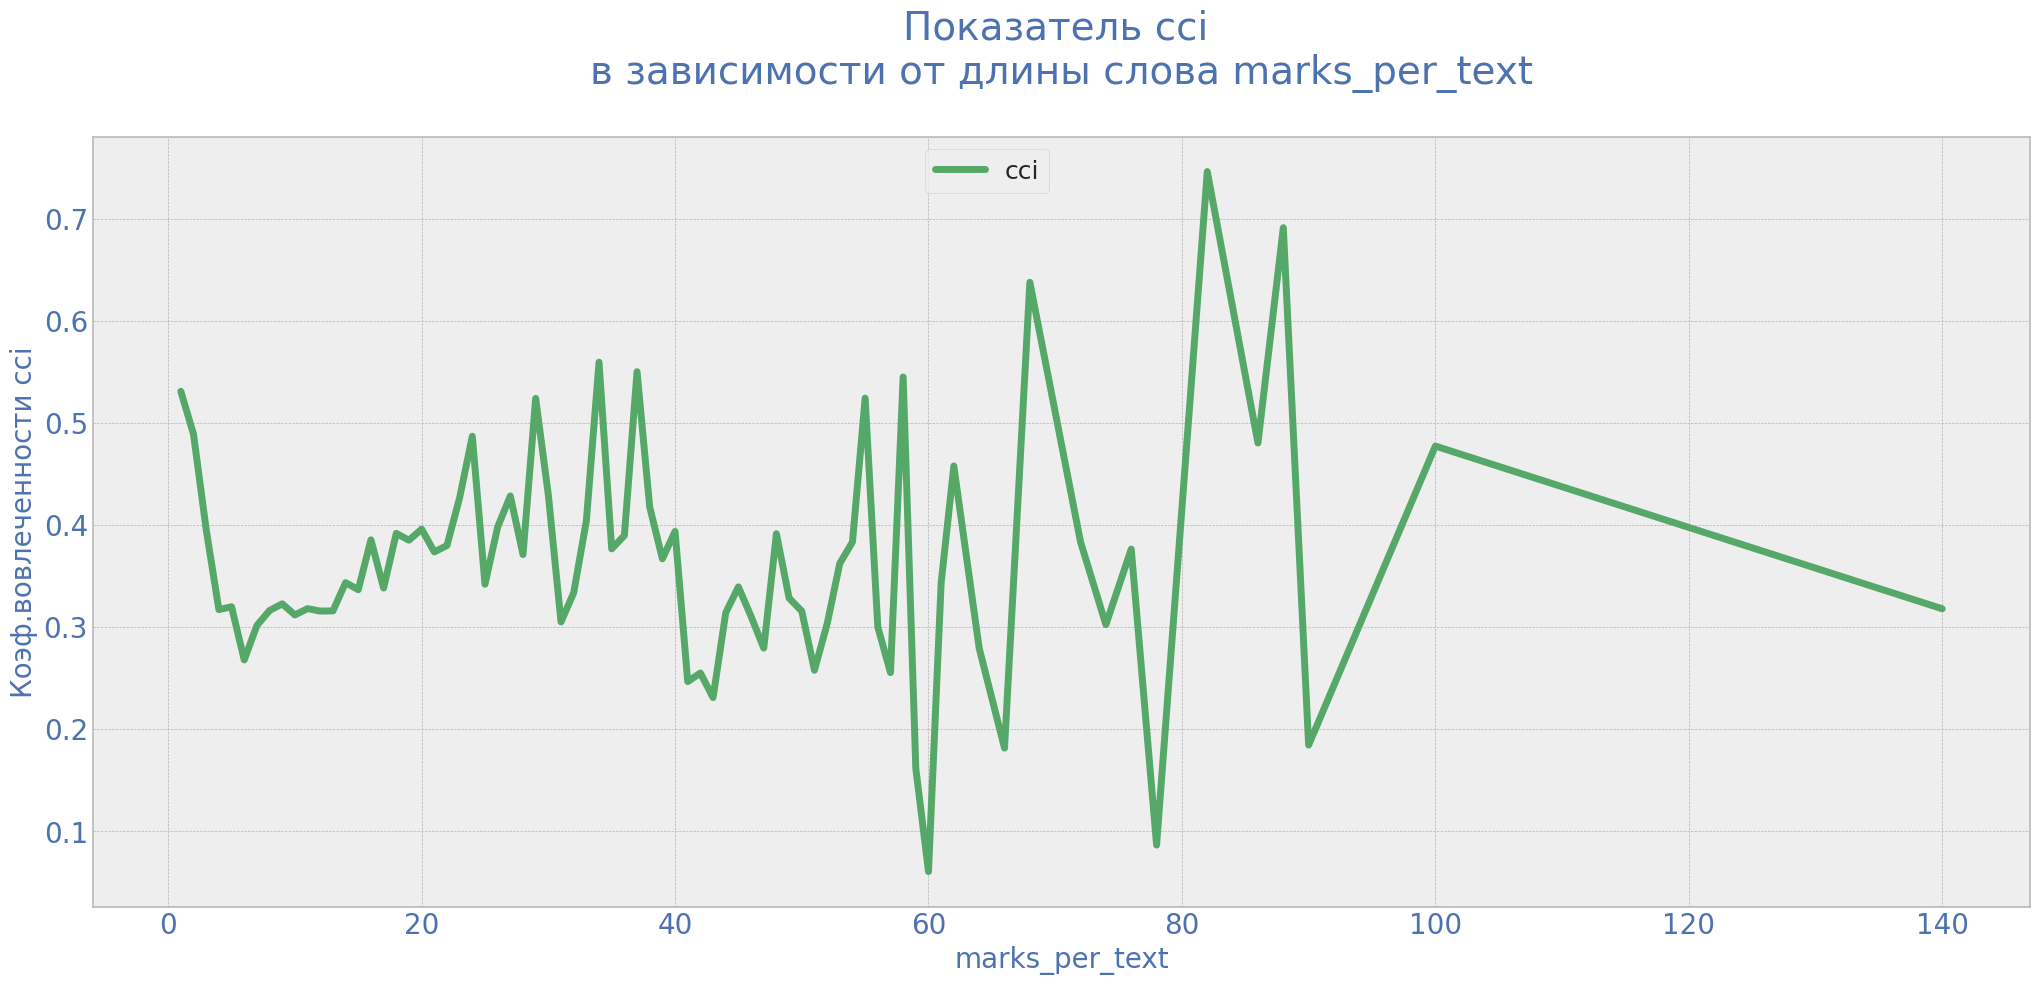

In [164]:
event_in_time_plot_10(posts, 'cci', 'marks_per_text')

In [165]:
posts.loc[(posts['marks_per_text'] < 20)
                      , 'cci'].median()

0.234

In [166]:
posts.loc[(posts['marks_per_text'] >=20) #& posts['marks_per_text'] <=80
                      , 'cci'].median()



0.2865

Коэффициент цитируемости, если один знак препинаня приходится на 20 символов и менее составляет 23%.  
Коэффициент цитируемости, если один знак препинаня приходится на менее, чем 20 символов составляет 29%.   

Для сравнения: в канале Иннополис - Коэффициент цитируемости, если один знак препинаня приходится на 7 символов и более составляет 41,8%.  
Коэффициент цитируемости, если один знак препинаня приходится на менее, чем 7 символов составляет 19,0%.
разница в количестве знаков препинания приводит к более, чем двукратному росту популярности.  

Можем сделать вывод, что чем больше ссылок на внешние ресурсы, тем ьольше цитируемость поста

### Публикации  в промежуток с 01.00 до 08.00 увеличат коэффициент цитируемости.
В публикациях учитывать время суток и  дни недели: посты, опубликованные в указанный период, набирают большую популярность.

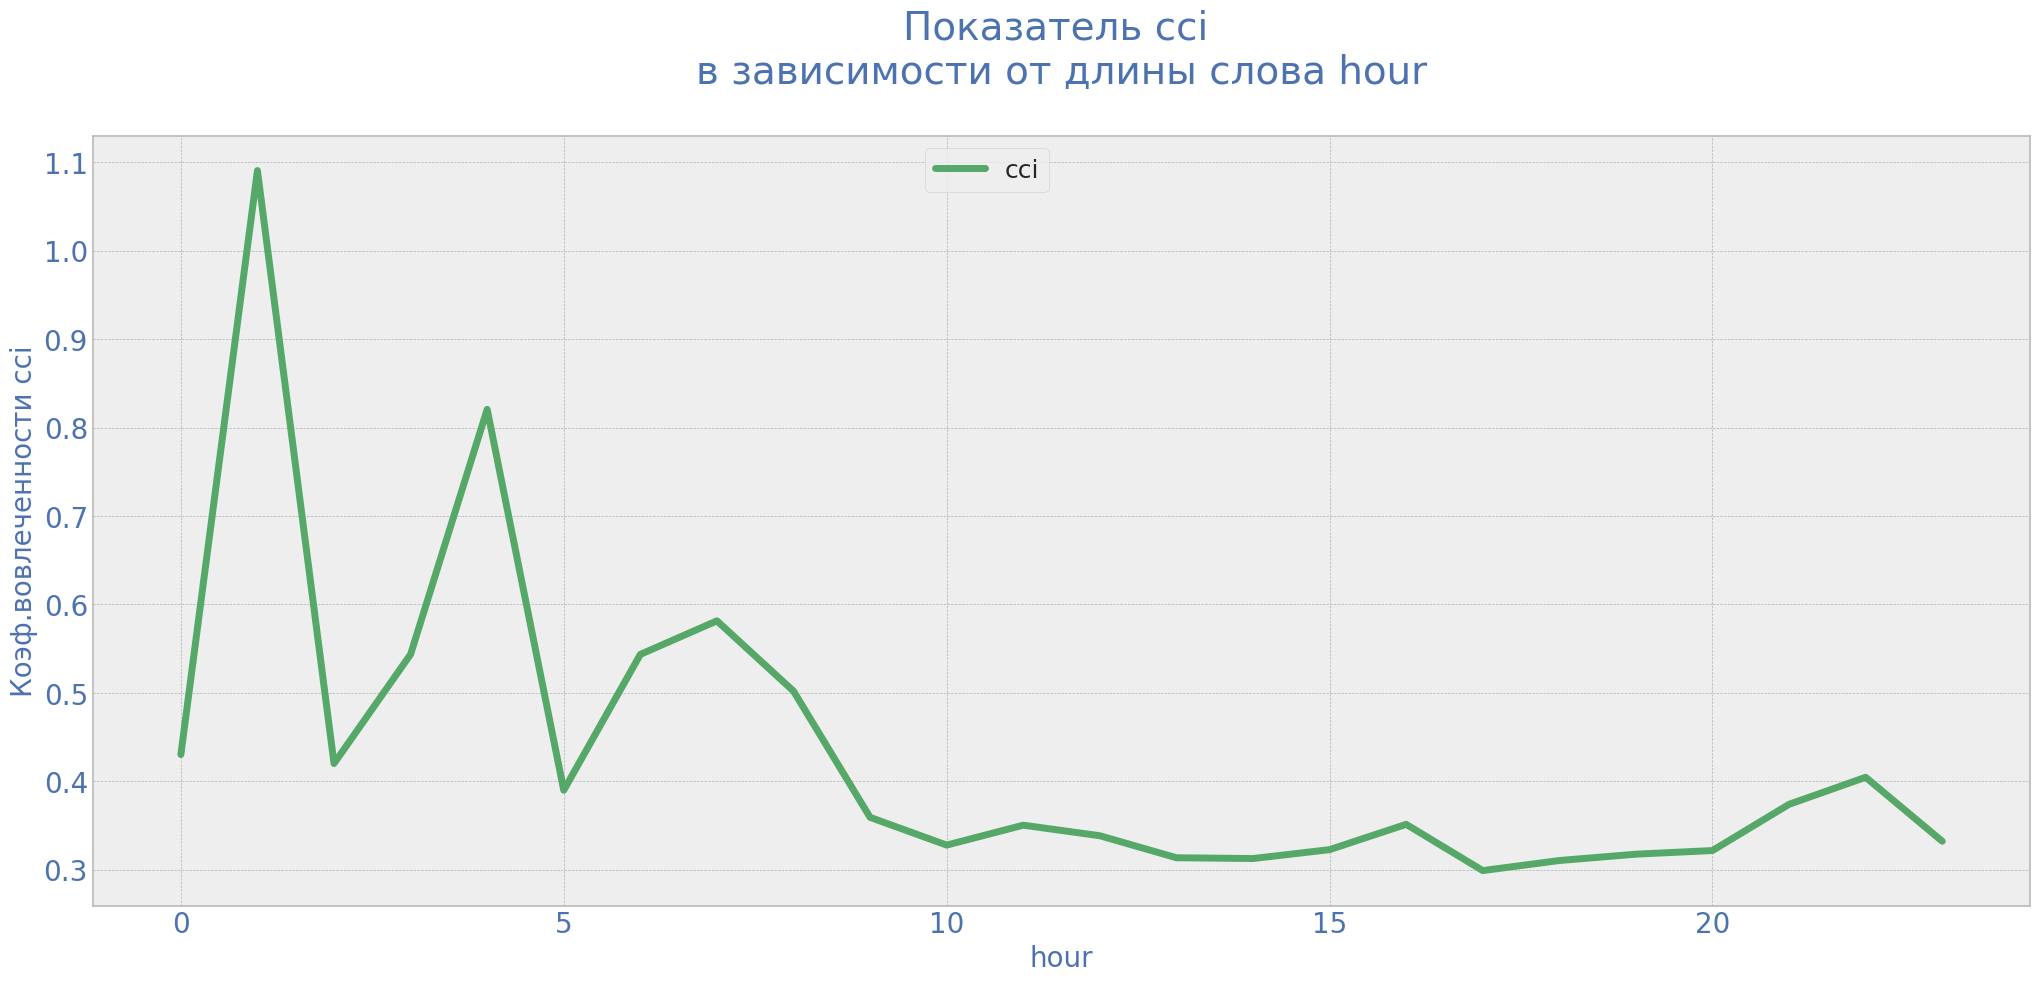

In [167]:
event_in_time_plot_10(posts, 'cci', 'hour')

In [168]:
posts.loc[(posts['hour'] >=1) & (posts['hour'] <= 8)

                       , 'cci'].median()

0.453

In [169]:
posts.loc[(posts['hour'] >=9) | (posts['hour'] < 1)

                       , 'cci'].median()

0.243

Коэффициент цитируемости при публикации поста в промежуток времени с 01.00 до 08.00  составляет 45%.  
Коэффициент вовлеченности при публикации поста в иное время  составляет 24%.  


Разница во времени публикации приводит к почти двукратному росту популярности.
В данном случае можно рекомендовать размещение в указанное время постов, имеющих в KPI заинтересованность в цитировании, репосте.

### Публикации с вторника по четверг  увеличат коэффициент вовлеченности.
В публикациях учитывать время суток и  дни недели: посты, опубликованные в указанный период, набирают большую популярность.

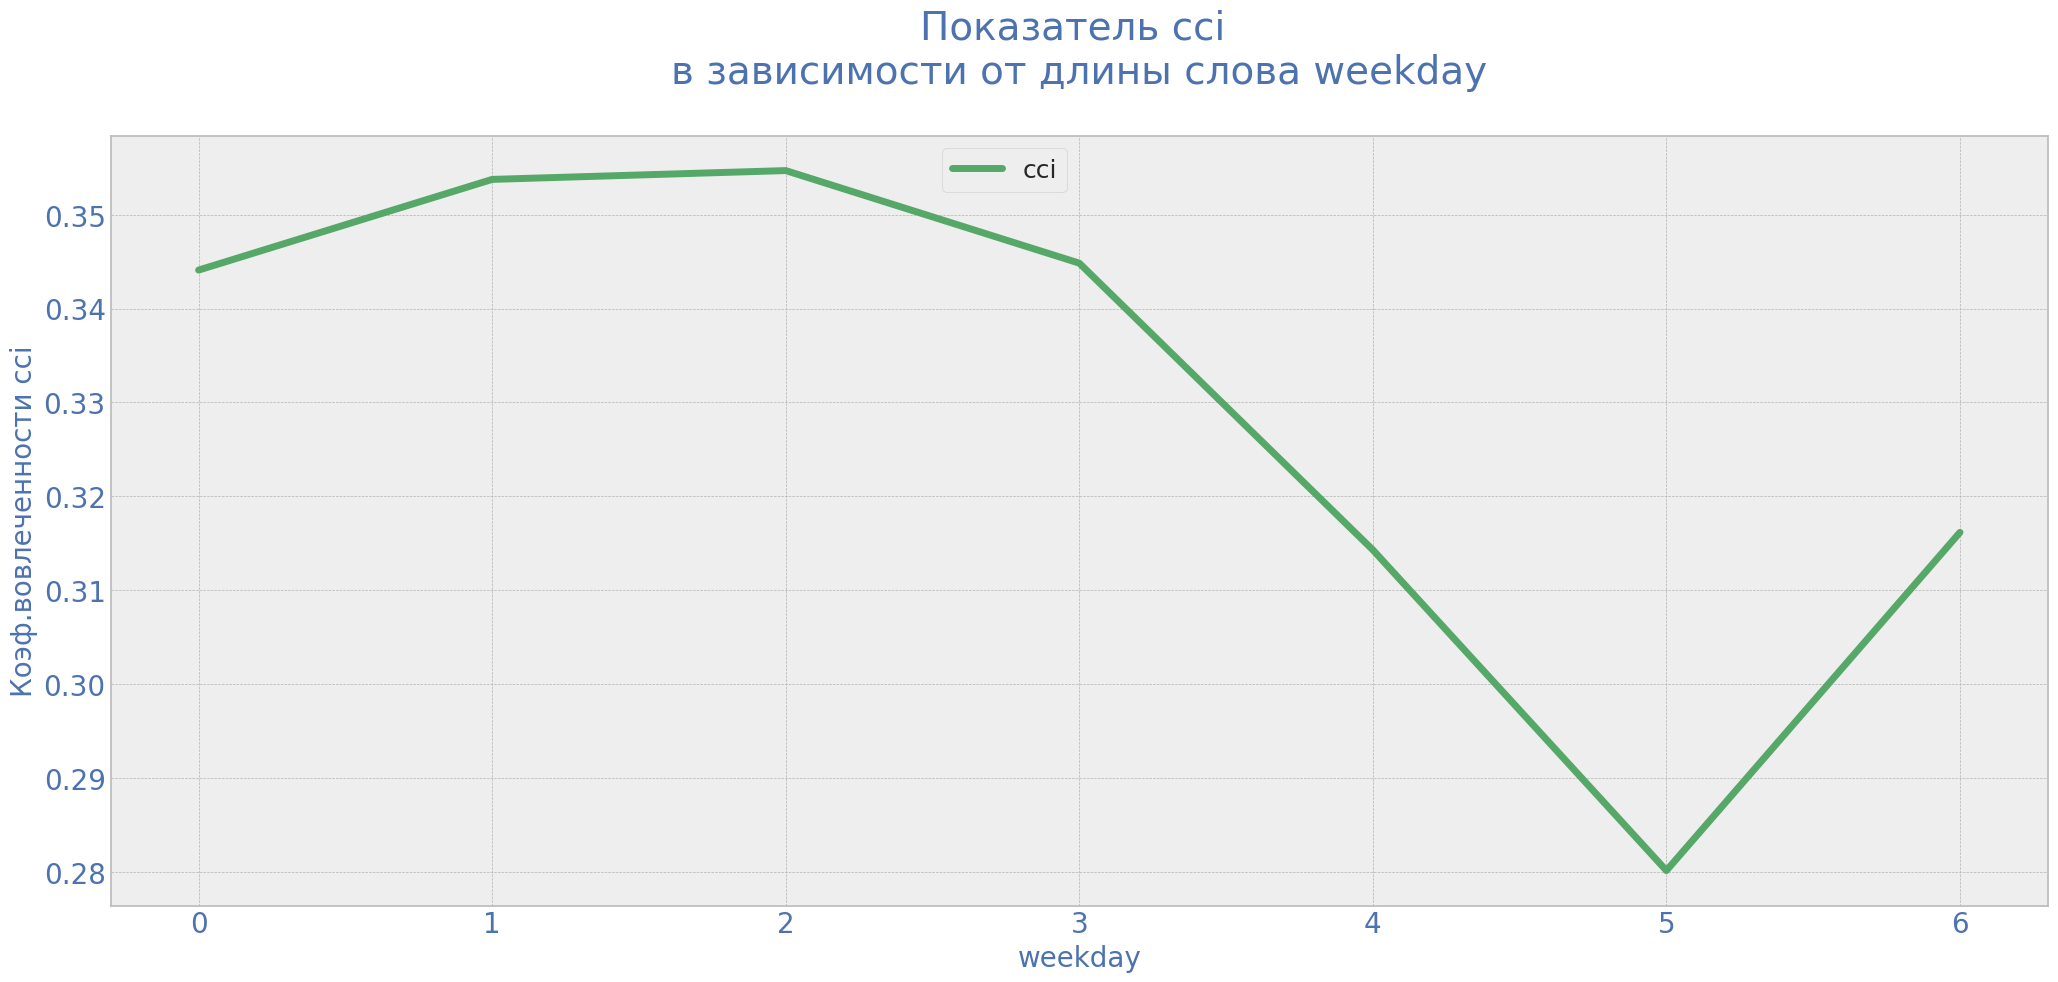

In [170]:
event_in_time_plot_10(posts, 'cci', 'weekday')

In [171]:

posts.loc[(posts['weekday'] >= 1) & (posts['weekday'] <= 3)
                       , 'cci'].mean()

0.3509922949917446

In [172]:
posts.loc[(posts['weekday'] < 1) | (posts['weekday'] > 3)
                       , 'cci'].mean()

0.3156760253234242

Коэффициент цитирования при публикации поста со вторника по четверг составляет 35%.  
Коэффициент вовлеченности при публикации поста в иной день недели  составляет 32%.  


Разница во времени публикации приводит к росту популярности только лишь на 3%.



## Выводы и заключения
### Исследовательский анализ предоставленных данных показал следующее:

Исследовательский анализ был разделен на несколько частей:  
1) **исследование аномальных значений**.   
1.1) Реакции. Анализ ТОП-5 аномальных по популярности постов в разрезе различных категорий позволил выделить:
- Темы постов - новости и обзоры
- Два поста - короткие, количество символов менее 100, количество слов менее 20
- Количество знаков препинания в публикации (кроме точки) - маленькое - 5-8, то есть это простой для чтения текст  
- все посты - это фотографии. Два из них практически без текста.
- Пост 1785 призывает поставить лайки, чтобы фотография актера была поставлена на аватарку канала
- **Пост 232 и 51 призывают ставить лайки при голосовании**
- пост 4520 собрал реакции в ответ на появление долго не выходившего в эфир одного из авторов канала

1.2) Комментарии
- посты призывают либо написать комментарии, либо приложить в ответ какой-либо снимок/видео
- темы постов - также новости и обзоры
- все посты - суперкороткие, количество символов менее 170, количество слов менее 30
- количество знаков препинания в публикации (кроме точки) - маленькое - 5-8, то есть это простой для чтения текст
1.3) Репосты
- все посты - короткие - первый или второй квартили по всем метрикам
- все посты так или иначе - обзоры и новости

2) **исследование временных характеристик**:
- не выявляется зависимость (сезонность) от коэффициента вовлеченности от времени года.   
- индекс цитирования cci имеет тенденцию к росту с летних месяцев до новогодних праздников и от марта к маю в оба рассматриваемых года
- динамика изменения коэффициента цитируемости следует за динамикой изменения количества просмотров.  
- читатели наиболее активно реагируют на посты, вышедшие в воскресенье и понедельник
- наибольшее количество репостов приходится на посты, опубликованные с понедельника по четверг
- Читатели наиболее активны в реакциях и в репостах на публикации, вышедшие  с часу ночи и до 8 утра.
  - Разница во времени публикации приводит к росту популярности только лишь на 3%.


3) **исследование сложности текста:**   
3.1) наиболее часто встречаемое значение и наибольшее принимаемое значение коэффициента вовлеченности:
- при количестве слов в публикации - до примерно 80 слов.
- при количестве символов в публикации - до 500 символов.
- при средней длине слова - от 3 до 7 символов.
- если количество знаков препинания приходится на не более, чем 20 слов.

3.2) Наиболее часто встречаемая величина коэффициента цитируемости:
- при количестве слов в публикации - до примерно 100 слов.
   - Коэффициент цитируемости резко растет при длине слова от 14 символов. Вывод текстов на экран показывает, что такие посты содержат в себе ссылки на внешние ресурсы. И наоборот, при длине слова менее 10 символов такие ссылки более исключение, чем правило.
   - Разница в длине слова до 5 букв включительно и более 5 букв приводит к росту цитируемости также на 30%. Можно предположить, что сократив использование длинных слов на 10% мы увеличим цитируемость постов на 2%

- при количестве символов в публикации - до 500 символов.
- при средней длине слова - от 3 до 6 символов.
- если количество знаков препинания приходится на не более, чем на примерно 30 слов.
   - Можем сделать вывод, что чем больше ссылок на внешние ресурсы, тем больше цитируемость поста


*Для сравнения анализ по постам канала Иннополис
Наибольшую популярность набирают посты, в тексте которых:
•	содержится до 50 слов. Чуть меньшую популярность имеют посты, содержащие от 60 до 120 слов. Чем больше слов в публикации - тем меньше популярность.
•	содержится до 450 символов. Чуть меньшую популярность имеют посты, содержащие от 500 до 900 символов. Чем больше символов в публикации - тем меньше популярность.
•	средняя длина слова (не считая предлогов, междометий и т.д.) - от 3 до 6 символов. Чуть меньшую популярность имеют посты, в которых средняя длина слова - от 7 до 9 символов. Чем больше средняя длина слова в публикации - тем меньше популярность.
•	количество знаков препинания приходится на не более, чем 7 слов. Чем на большее количество слов приходится один знак препинания, тем больше популярность.
Резюмируя, чем сложнее текст, тем меньше популярность
Таким образом, популярность канала Кинопоиск не имеет настолько сильной зависимости от метрик текста, как в канале Иннополиса.*

4) **исследование тем публикаций:**

5) **исследование типов публикаций:**
- Посты с приложенным фото имеют наибольший коэффициент вовлеченности.
- Посты с приложенным видео имеют наибольший коэффициент цитируемости.
- Таким образом, посты с медиа эффективнее привлекают пользователей и репостятся.


6) **анализ эмодзи:**
- Для зависимости от вида поста: посты с видео имеют в своих оценках бОльшую долю положительных оценок над оценками отрицательными и нейтральными, нежели публикации с другими приложениями. На последнем месте оказались не посты без приложений, а посты со ссылками.
- Для зависимости от темы публикации:  посты "Дежурный по кинопоиску" имеют в своих оценках бОльшую долю положительных оценок над оценками отрицательными и нейтральными, нежели публикации с другими приложениями
- Посты, выпущенные в воскресенье, имеют в своих оценках бОльшую долю положительных оценок над оценками отрицательными и нейтральными
- Посты, выпущенных в ночное время, имеют в своих оценках бОльшую долю положительных оценок над оценками отрицательными и нейтральными





## Рекомендуемые метрики (KPI) для контроля коэффициента цитируемости
- Количество слов в публикации - до 100 слов.
- Средняя длина слова - до 5-6 букв включительно
- Количество символов в публикации - до 500 символов.
- Количество знаков препинания приходится на не более, чем на 30 слов.
- Обязательное наличие ссылок на внешние ресурсы
- Обязательное приложение видео
- Не уменьшение доли обзоров и новостей относительно текущего значения


